**Objective**: To expose the best combination for strategy games available in the appstore in order to get a good user rating (4.0/5.0 and above)
To analyse the dataset, we will look at the relationship as below:

**Strategy**
* Genre grouping
* Game Size analysis
* Release date/ Update date factor
* Game Price and In-App Purchase Factor (Grouped by Genre)
* Age Rating Factor 

**Data Cleaning**
* Games without User Rating are dropped.
* Games with less than 200 user rating AND days since last update date <6month are dropped to prevent biased ratings from the developer
* Genre tags "Entertainment" and "Games" are removed from the Genre string as it does not provide meaningful insight
* The remaining of the string are checked and grouped as follows:
     1. Puzzle= Puzzle/Board
     2. Adventure= Adventure/Role/Role Playing
     3. Action = Action
     4. Family = Family/Education
     


In [1]:
import pandas as pd
gamestats = pd.read_csv('/appstore_games.csv')
gamestatsf=gamestats.copy()
# Drop unused rows and columns
gamestatsf = gamestatsf.drop(columns="URL")
gamestatsf = gamestatsf.drop(columns="Icon URL")

gamestatsf.columns= ['ID', 'Name','Subtitle','User_Rating','User_Rating_Count','Price','In_App_Purchase','Desc','Dev','Age_Rating','Languages','Size','Primary_Genre','Genre','Release_Date','Current_Version_Date']
#Drop games that has no rating
gamestatsf = gamestatsf[pd.notnull(gamestatsf['User_Rating'])]
# Converting Date strings to datetime objects
import datetime

gamestatsf['Release_Date'] = pd.to_datetime(gamestatsf['Release_Date'])
gamestatsf['Current_Version_Date'] = pd.to_datetime(gamestatsf['Current_Version_Date'])
#New column for time gap between release & update
gamestatsf['Update_Gap']=gamestatsf.Current_Version_Date-gamestatsf.Release_Date
# To prevent biased ratings,Drop games that has rating less than 200 user rating count AND 
#(Release Date to Update date) less than 6 months

Low_User_Count=(gamestatsf[gamestatsf.User_Rating_Count < 200].index) &\
gamestatsf[gamestatsf.Update_Gap < datetime.timedelta(days=175)].index

gamestatsf.drop(Low_User_Count , inplace=True)

In [2]:
gamestatsfg = gamestatsf.copy()
gamestatsfg['Genre'] = gamestatsfg['Genre'].str.replace(',', '').str.replace('Games', '').str.replace('Entertainment', '').str.replace('Strategy', '') 
gamestatsfg['Genre'] = gamestatsfg['Genre'].str.split(' ').map(lambda x: ' '.join(sorted(x)))
gamestatsfg['Genre']=gamestatsfg['Genre'].str.strip()
Non_Main_Genre=gamestatsfg[~gamestatsfg.Genre.str.contains('Puzzle') & \
                           ~gamestatsfg.Genre.str.contains('Action') & \
                           ~gamestatsfg.Genre.str.contains('Family')& \
                           ~gamestatsfg.Genre.str.contains('Education')& \
                           ~gamestatsfg.Genre.str.contains('Family')& \
                           ~gamestatsfg.Genre.str.contains('Adventure')&\
                           ~gamestatsfg.Genre.str.contains('Board')&\
                           ~gamestatsfg.Genre.str.contains('Role')].index
gamestatsfg.drop(Non_Main_Genre , inplace=True)
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Puzzle'),'Genre'] = 'Puzzle'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Board'),'Genre'] = 'Puzzle'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Action'),'Genre'] = 'Action'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Adventure'),'Genre'] = 'Adventure'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Role'),'Genre'] = 'Adventure'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Family'),'Genre'] = 'Family'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Education'),'Genre'] = 'Family'

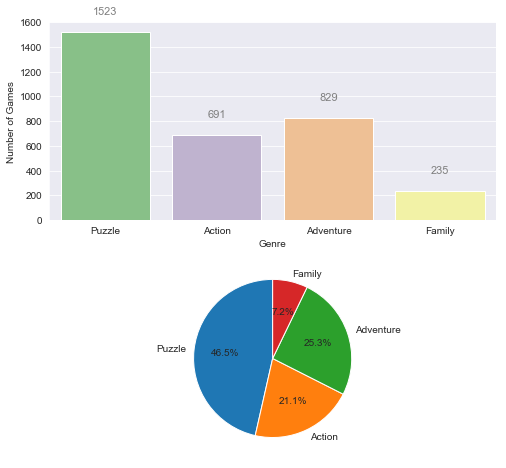

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
f, axes = plt.subplots (2,1, figsize=(8,8))

#Histogram
x=['Puzzle','Action','Adventure','Family']
y = [gamestatsfg.Genre[(gamestatsfg['Genre']=='Puzzle')].count(),gamestatsfg.Genre[(gamestatsfg['Genre']=='Action')].count(),\
     gamestatsfg.Genre[(gamestatsfg['Genre']=='Adventure')].count(),gamestatsfg.Genre[(gamestatsfg['Genre']=='Family')].count()]

vis1= sns.barplot(x,y,palette='Accent',ax=axes[0])
vis1.set(xlabel='Genre',ylabel='Number of Games')
for p in vis1.patches:
             vis1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')


#Pie Chart
NG = [gamestatsfg.Genre[(gamestatsfg['Genre']=='Puzzle')].count(),gamestatsfg.Genre[(gamestatsfg['Genre']=='Action')].count(),\
     gamestatsfg.Genre[(gamestatsfg['Genre']=='Adventure')].count(),gamestatsfg.Genre[(gamestatsfg['Genre']=='Family')].count()]
G = ['Puzzle','Action','Adventure','Family']

plt.pie(NG, labels=G, startangle=90, autopct='%.1f%%')
plt.show()


plt.ioff()

Simple Analysis on Genre distribution, we can see that number of games follows Puzzle > Adventure > Action > Family

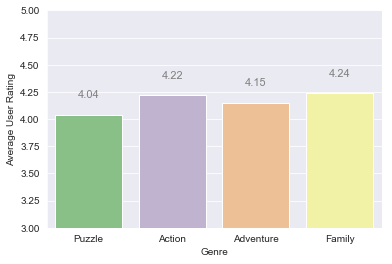

In [4]:
x=['Puzzle','Action','Adventure','Family']
y = [gamestatsfg.User_Rating[(gamestatsfg['Genre']=='Puzzle')].mean(),\
     gamestatsfg.User_Rating[(gamestatsfg['Genre']=='Action')].mean(),\
     gamestatsfg.User_Rating[(gamestatsfg['Genre']=='Adventure')].mean(),\
     gamestatsfg.User_Rating[(gamestatsfg['Genre']=='Family')].mean()]

vis1= sns.barplot(x,y,palette='Accent')
vis1.set(xlabel='Genre',ylabel='Average User Rating')
vis1.set(ylim=(3,5))


for p in vis1.patches:
             vis1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.ioff()

Average Rating based on Genre shows Action and Family games have slightly higher User Rating compared to Puzzle and Adventure games

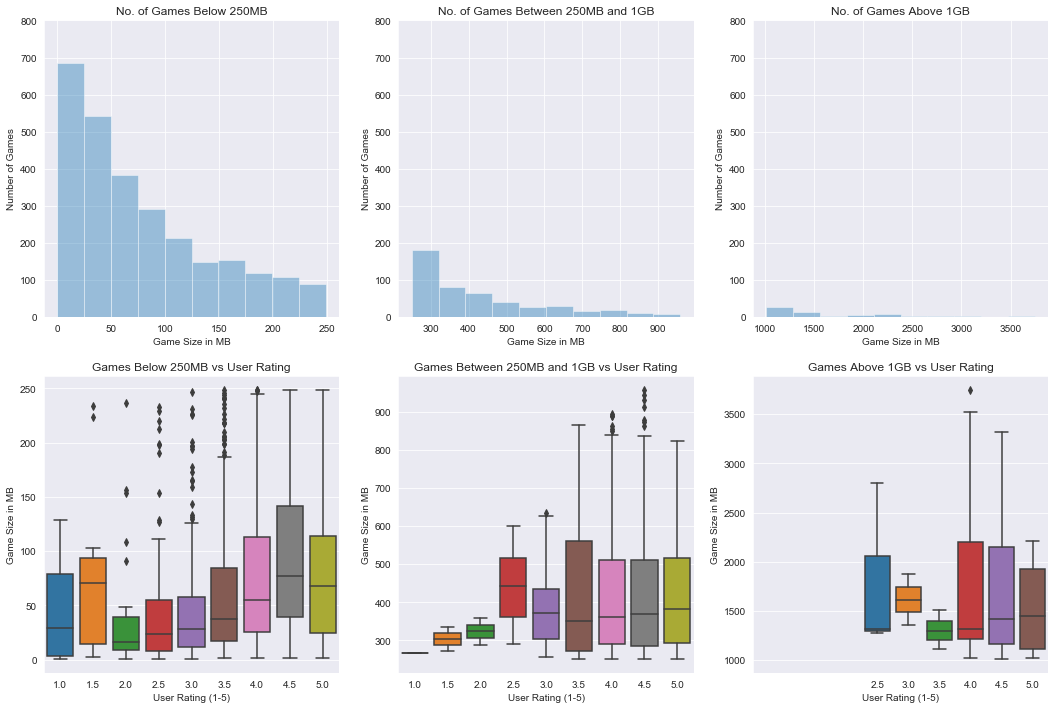

In [5]:
gamestatsfg['Size2'] = round(gamestatsfg['Size']/1000000,1)
Size_Less_250MB = gamestatsfg[gamestatsfg.Size2 <250]
Size_More_250MB = gamestatsfg[(gamestatsfg.Size2 >=250) & (gamestatsfg.Size2 <1000)]
Size_More_1GB = gamestatsfg[gamestatsfg.Size2 >=1000]


sns.set_style('darkgrid')
f, axes = plt.subplots (2,3, figsize=(18,12))



vis1 = sns.boxplot( data = Size_Less_250MB, x = 'User_Rating', y = 'Size2',  ax=axes[1,0])
vis2 = sns.boxplot( data = Size_More_250MB, x = 'User_Rating', y = 'Size2', ax=axes[1,1])
vis3 = sns.boxplot( data = Size_More_1GB, x = 'User_Rating', y = 'Size2', ax=axes[1,2],)
vis4 = sns.distplot(Size_Less_250MB.Size2, bins= 10, kde=False,ax=axes[0,0])
vis5 = sns.distplot(Size_More_250MB.Size2, bins= 10, kde=False,ax=axes[0,1])
vis6 = sns.distplot(Size_More_1GB.Size2, bins= 10, kde=False,ax=axes[0,2])

vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis2.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis3.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis4.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis5.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis6.set(xlabel='Game Size in MB',ylabel='Number of Games')

axes[0, 0].set_title('No. of Games Below 250MB')
axes[0, 1].set_title('No. of Games Between 250MB and 1GB')
axes[0, 2].set_title('No. of Games Above 1GB')
axes[1, 0].set_title('Games Below 250MB vs User Rating')
axes[1, 1].set_title('Games Between 250MB and 1GB vs User Rating')
axes[1, 2].set_title('Games Above 1GB vs User Rating')
vis3.set(xlim=(-4, 5.5))

vis4.set(ylim=(0, 800))
vis5.set(ylim=(0, 800))
vis6.set(ylim=(0, 800))

plt.ioff()

**Size Factor**
* From the visualization, we can see that most of the game are below 250MB In which to achieve score 4 and above it has to be 100MB and above.
* Second column of the chart shows that good games (score >4) have to be 600MB and above, with the exception 
* A very small portion of games (less than 100 titles) are above 1GB, in which the minimum score for the game is 2.5 This might be due to the user sentiment who gives credit to the huge game content and possibly better game graphics.

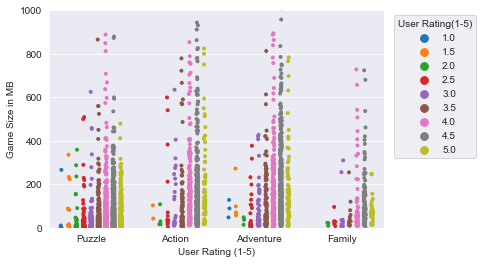

In [6]:
vis1= sns.stripplot(y='Size2' , x='Genre', data=gamestatsfg,\
                hue='User_Rating',dodge=True, size=4)

plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.29, 1))

vis1.set(ylim=(0, 1000))
vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
plt.ioff()data:image/png;base64,iVBORw0KGgoAAdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeMAAAEICAYAAABs9Jx5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzsnXlgFOX9/18ze+TYZHMnEHKQhEA4BNEEkFNApIAULIhIRcQDD75+tdpfpVbRWq1aq631rn6xHvWs9cIqCB4IWkDkEAjhSkISct/ZI7s7M78/FjZZcpKQzfW8/tqZZ+aZz2w2857neT6HpGmahkAgEAgEgm5D7m4DBAKBQCDo7wgxFggEAoGgmxFiLBAIBAJBNyPEWCAQCASCbkaIsUAgEAgE3YwQY4FAIBAIupkuE+O9e/eyfPlyAHJzc7nqqqtYtmwZ999/P6qqAvDMM8+wePFili5dyr59+1o9ViAQCASCvkqXiPFLL73EvffeS319PQCPPPIId9xxB2+++SaaprF582YOHDjAjh07eO+993jyySf5/e9/3+KxAoFAIBD0ZbpEjBMSEnj66ac92wcOHGDcuHEATJ06le+++45du3YxefJkJEkiNjYWRVGoqKho9liBQCAQCPoy+q7odPbs2eTn53u2NU1DkiQATCYTtbW11NXVERoa6jnm9P7mjm0LTdMQecQEgp5FWVkZFRUVJCQk4O/v393mCJpBlqXuNkFwii4R4zOR5YYBuMViwWw2ExQUhMVi8dofHBzc7LFt4XKpVFVZz63RAoGgU0iSPxERsVgsLiyWuu42R9AMUVHB3W2C4BQ+8aYeMWIE27dvB2DLli2kp6dzwQUXsHXrVlRV5eTJk6iqSnh4eLPHCgQCgUDQl/HJyPjuu+/mvvvu48knnyQ5OZnZs2ej0+lIT0/nyiuvRFVV1q5d2+KxAoFAIBD0ZaS+ULXJ6VTENLVAIBCcJWKauufgk5GxQCAQCHovTqeTvLw8bDZ7d5vSawkI8Cc+Ph6DwdBsuxBjgUAgELRKXl4eer0fAwdGe6JdBO1H0zRqa6vJy8sjOTm52WNEOkyBQNBlZGcfY9++3VitlrYPFvRYbDY7QUEhQog7iCRJBAeHtDqzIEbGAoGgS9iz5we2bfsGgL17d3HllddgNBq72SpBRxFC3Dna+v7EyFggEHQJubnZns81NdVUVVV2ozUCQc9GiLFAcAqn08mBA/vIyjooCpScA2Jj4zyfAwNNhISEtnK0oDexa9cP3HvvGq99zz77N9av//ic9L9+/ccsWDCXW265kVtuuZHly5fy+OOPtHrO0aNH2L17FwD33rsGp9N51tetrq7i0Ucf8mzb7TZuvHElOTnZzR7/5ptvcNVViz125ubmcPToEV5++cWzvraYphYITvHJJ+9TWFgAwMmTBUyfPqubLerdpKdPIDjYTG1tDcOGjcDPz6+7TRL0Ii699GesXv2/AKiqyk03XU9m5kGGDx/R7PFffbWZiIhIxo69kIceerRD13zhhedYtGgJAJmZB3nssYcpKSlp8fisrEzuv/9B0tK8bXrjjVfJz88jLi6+3dcWYiwQ4B4VnxZigBMnjnejNX0DSZJISxvZ3WYIfExlZSX33ns3qqrhcrm4++57GDIklXfffZuNGz9DkiQuuWQ2V155FQ8+eD/V1VXU1FTzxBN/azH9sdVqoa6uFpMpCIuljj/+8Q/U1tZSVVXFggWXM2XKND799BMMBgPDhqXxu9/dzTvv/JvHHvsjRqOBwsKTlJWVcd99vyctbTgff/wh//rXO5jNZvR6A5dccinTp88gM/MAqan3AOBwOHjssSd44IH7WrzXQ4cyefXVVygvL2fSpMmsWHEdADNnzuJf/3qXO+64q93fmxBjgQAwGAxERUVTWup+C5ZlHVarlcDAwG62TCDoPUiSxMGD+wkKCub3v3+YnJzjWCwWsrOPs2nTRl58cR2SJHHbbTczYcJFAKSnZ3DVVVc36Wvjxs/Zv38fZWVlBAYGcu2115OQkMChQ5mnxHMmpaWl3HLLDSxadAXz5s0nIiKSkSNHefUzYMBA1qy5lw8//DcfffRvBgy4lddf/wevv/4WBoOR1atXAbB//08kJAz2nDdmzPlt3u+sWbNZvHgJJlMQd999F1u3bmHy5KkMGZLKSy+d3VS1EGOB4BSXXbaIN954GafTSU1NNZs3f8b8+Yu62yyBoMfh5+fXZE3WZrPi5+fHRRdNIi/vBL/5zZ3o9XpWrryeY8eOUlRUyP/8z80A1NbWkJ+fB0Bi4uBmr3F6mvrkyQLuuON/SEhIBCAiIpJ33nmTr7/+EpMpCJfL1aqtQ4emARATE8O+fXvJz88jKSkZf/8AAM47bwwAVVVVhIeHt9rXCy88y969ewB45pkXWLp0GUFB7ixmEydO5vDhLCZPnkpkZBQ1NVWt9nUmwoFLIDiFTqfzesBUVZ3dP5NA0F9ISkoiK+sQZWWlANTX17N7948MG5bGjz/+QEREJH/723OsXHk9zz//LImJg0lOTua55/7O88+/xLx580lJGQK0HfITGzuIX/96Dffc8xvsdhv//OdrjBo1mt///mFmzrwEcGd0lmW5WcfLM7uPi4snNzcHu92OqqocPLgfgLCwcOrqWi/Ze/PNq3n++Zd4/vmXsNmsLFu2BKvViqZp7Nq1k7S04QDU1NQQFta6sJ+JGBkLBKfw8/Nj2LARZGUdBGD06LanqQSC/ojJFMTtt9/JnXfejr+/Py6XkyuuWEp8fAJms5nf/W4N77zzJrKs4/rrbyQ1dSjp6eNYteo6nE4HI0aMIioqut3XGzduPBkZ43nppReYMmUqf/rTI2zY8BkhISHodHocDgdpacN5+um/kpSU1GpfoaFhLF++gptvvh6zOYT6+nr0ej2jRp3Hs88+1W6bgoKCueWW1axevQqDwUhGRgYTJ04G4MCB/aSnj2t3XyAKRQgEHurqajl8OBNFUUhOTiUiIrK7TRIIupT2Foo4cOAgsbGJXWyNb3C5XLz++j9YufIGAG6++XpuuulWxo69kMcee5iFCxcxbFhap66xdu3vuPnmW4mNHeS1/+TJXEaObN4bXIyMBQLcnpPvv/+WZ5pKkiQhxgJBH0Sv12O327jmmmUYDHpGjjyP88+/AIAbb7yFF154lnvuadmDui2OHDlMXFxcEyFuCzEyFgiA0tIS3n33dc/2oEHxLFy4pBstEgi6nv44Mu5OWhsZCwcugQAICQklOLghxjEuTjx4BAKB7xDT1AIBYDQaWbToKg4fPkRQUDCpqcO626RegbK3DPVEHXJiMLrREd1tjkDQaxFi3MPRahyo+XVI0QHIkQHdbU6fxmQKYuzY9O42o9egHKzAtSkfAPVwFZj06FJCutkqgaB3IsS4B6PVOHC8ngV2BXQShsUpyHFB3W2WQIDmUnFtOem9r7K+m6wRCHo/Ys24B6Pm1rqFGEDRUI9VNzlG0zSOHTviCckRCHyBVlkPlkaZj2QJXaoYFQs6j6pp/OdAMcv+8QMzn97Gsn/8wH8OFKOeA1/j/ft/4pZbbmyy/9tvv2Hlyqu54YYVfPjhvzt9nY4gRsY9GCk6ACROJ5hBimmaJ/mbbzZz4MBeAI4cOcS8eZf70EJBf0UyGyFADza3IMvnhSOFiKpMgs6hahp3fbCf7TmV2JzubFoVVicPbchiU1Ypf758JHIbGbta4vXX/8Hnn/8Hf39/r/0ul5OnnnqCdeveICAggFWrVjJlylSfhzaKkXEPRo4JxLAoBd3YSPRzE9ClhXm1a5rGoUP7Pds5OcfF6FjgEyQ/HYYrh6C7IArdtFj0M+LaPkkgaIPPD5Z4CfFpbE6V/+ZUsCGz5XKGbTFoUDyPPPLnJvuzs7OJi4vHbDZjMBgYM+Z89uzZ3eHrdBQhxt2MtbqSQ99sJP9A8398OTEY/Yw4dMOb5jnNzz/hJb5+fv7odLous1UgaIwc4Y9++iB050ciyR0brQgEjXljZ14TIT6Nzanyxs68Dvc9Y8ZM9Pqmk8EWiwWTqcEXJzDQRF1dXYev01HENHU34rBZ+ezPa7FUlgEw7oqVpE27tN3nn/nDSklJPaf29Td2795JVlYmkZFRTJt2CQaDobtN6vE4N+ah/lQOwQYMi1KQI/zbPkkgaIHi2tadAItqzr2ToMlkwmptSBpltVoIDm5fMpRziRgZdyPVhfkeIQYoOHh2UyMDBw4iPX0CQUFBxMcnctFFU861if2Gkyfz+e67LZSXl5KVdZAff9zR3Sb1eNRCi1uIAWqdKN8Xda9Bgl5PTHDrfgcDzOfeLyEpKYm8vBNUV1fjdDrZvftHRo0afc6v0xZiZNyNmGNi8Q82Y6+tASBmyPCz7mP8+EmMHz/pXJvWJ9FcKq7N+WjFVuShoegnDPC02e12r2Ptdpuvzet96M94lzeId3tB57g6I56HNmQ1O1UdYJC5OiP+nF1rw4bPsNmsLFy4iNtvv5M77liNqqrMn7+A6Oj2V5Q6V4jc1N1MTWkR2Tu3EhQZQ8o475GtVq+4xaOyHt3oCHTniQxHncG1vRhla6Fn27A4BTnRPR2lKC4++eTfFBTkYTIFsWDBFWddj7Q/4tpejLKnDCnMD8PcRKQgMbXfm+hpuamb86YGtxBPGBzeKW/qnoCo2tSDMUcNYMzcxc22KdsKUTMrAXAVWZFiTWJNrjPYXF6bWqNtnU7PggVXYLHUERAQgE4n/jXag358DPrxMd1thqCPIEsST1w+ig2ZJbyxM4+imnoGmP24OiOe2cOje7UQt4V44vRgNKu3eJwpJoKzQ3d+JMrhKqh1ul9szkjdKEkSQUG+d9zoraglVvdMgyyhnzYIKUzEGQs6jyxJzBkRw5wR/eslT4hxD0aXHu3JwiUnBSPFmrrbpF6NFOqH8brh7peaIANSH37L9gXOD7Khzun+XOvEuLyhuIbdbuOLLz6jsrKcESPOIz19QneZKRD0CoQY92DkAYEYbxzhFg+zUYjHOUDSyxBs7G4zej2aqoHF2bBd5/Rq37Hje06cyAZg+/ZtxMUlMmDAQJ/aKBD0JoQY93Akow6MIpGHr8jOPsa2bd9gMBiYMWM2UVFur0pVtVNZ+QmSpCcs7DIkqX87KkmyhG5cDMr2YgB0Z6wbu1ze4ux0Onxmm0DQGxFiLBCcwm638dlnH3E6wOCrrzawZMlyAHJyf0Vd3fcA1NZtJzHh0W6zs6egnzwQ3chw0EnuXNWNuOCCceTnn6C2toYhQ4YRF5fQTVYKBL0DIcYCwSl27vyexpF+p2OPNU2lru6/nv11dd/53LbuRtO0ZpdJWnLaCg0NY/nyG3A6nRiNYllAcBZoKsasD/Hb/Xfk2pOowbHUj12FY9hCkDoXy75//088++zfeP75l7z2v/nmG3zyyYeEhrrz/69Z8zsSEwd36lpnixDjHoymabg25aMeqkSKDsDw8ySkAPEn6ypsNu9EHyNGuLPwSJKMyXQBFssuAEymDJ/b1l1UFebz5YuPY62qYOQl8xl72ZJ2nytJkhBiwdmhqZjWX48h71skpzt3hGwrQ7f5NxiOrscy7+UOC3JLVZsAsrIyuf/+B0lLaz4G2BeIlDk9GDW7BnVfOThUtHwLyg8dr1giaJsxYy7AaHSP9AYNimfs2HRP2+DEpxk44C5iB95NQvwfu8tEn/Pjx29TV1aC6nLx0+cfUF18srtNEvRhjFkfegnxaSSXFUPuFgxZH3a475aqNgEcOpTJq6++wqpV1/Hqq+s6fI3O4LNhltPpZM2aNRQUFCDLMn/4wx/Q6/WsWbMGSZJITU3l/vvvR5ZlnnnmGb7++mv0ej333HMPo0f7Pk9oj+DMjHDNFzMRnCNiYgZyzTU3YLVaCQkJRZYb3lV1ukCCgsaBJCPL/SeetvF3ACDJ4v1d0HX47f57EyE+jeSy4r/77zjTftGhvmfMmMnJk82/TM6aNZvFi5dgMgVx9913sXXrFiZPntqh63QUn4nxN998g8vl4u2332bbtm389a9/xel0cscddzB+/HjWrl3L5s2biY2NZceOHbz33nsUFhZy22238f777/vKzB6FnGJGHh6GmlWFFB2ALsP3+VL7G35+/vj5NZ3GKiz8K6Vl/wAgJvpmYmJu9rFl3cMFC5dRW1aCpbKMUbN+jjlqQNsnCQQdRK5tfealrfaOoGkaS5cu8yT8mThxMocPZ/VdMU5KSkJRFFRVpa6uDr1ez549exg3bhwAU6dOZdu2bSQlJTF58mQkSSI2NhZFUaioqCA8vP/lCZYkCcPcRJjb9TlhBa1TVv5Pz+fSsjf6jRibowYw/7fCc1zgG9TgWGRbWavt5xqLpY5ly5bw9tvvExAQwK5dO5k/f8E5v05b+EyMAwMDKSgoYM6cOVRWVvLCCy+wc+dOj4emyWSitraWuro6QkNDPeed3t+aGOt0EqGhgV1+D4Lejz2zAuu2k+jMRoLnJSGb2hcv7O8fh83mTmIRGJAgfm/txOVyNVvQXSBojvqxq9Bt/g2Sq+lUtaYPxD521Tm7VuOqTbfcsprVq1dhMBjJyMhg4sTJ5+w67cVn/yX/+Mc/mDx5MnfddReFhYWsWLECp7MhMYDFYsFsNhMUFITFYvHa31ahZ0XRem3VJoHv0CxOHO9kgaLhBBwuxT3z0Ij6+nrq6+0EB5u9QnkS4v9KUfGzSMgMGHCb+L3hriqmHq9BMhuRB3mnalUUhc8++4jc3GwiIiL5+c+vIDDQ+wXGbs+mqvoz/IyJhIXN86XpglO0t2qTr3AMW4jhyCcYTnzrJciaPhBn4lScwxZ2qv/Y2Fj+7/9eA2D27Dme/XPmXMacOZd1qu/O4jMxNpvNGAzuUUhISAgul4sRI0awfft2xo8fz5YtW5gwYQIJCQk8/vjjXH/99RQVFaGqar+cohZ0jMNbN1Ny7BCDRp5PUrp3nWfNroDSEEd8ZgrH/Pxc1q//EEVxkZIylNmzL/MIsp9fIokJf+r6G+glaE4V51tH0Mrdsdj6WfHoRjeU+Dx+/Ai5ue6ZhPLyMvbt+5EJExpGG05nOceOr0BR3LW8XUolUZFX+/AOBD0SScZy2f9hyPoQ/0Zxxvaxq9xC3Mk4456Mz8T42muv5Z577mHZsmU4nU5+9atfMWrUKO677z6efPJJkpOTmT17NjqdjvT0dK688kpUVWXt2rW+MlHQy8n58Xv++/bLABzfuRX/4BAGDhvlaZfC/ZCHhqIergK9hH5cg0Ocpmls2LAeRXFXxjp27DBlZSVERfWvyjHtRSu3e4QYQDlc5SXGZ5agPHOqur7+uEeIASyW3UKMBW4kGWfaLzrsNd1b8ZkYm0wmnnrqqSb733jjjSb7brvtNm677TZfmCXoQ1QV5nttVxed9BZjSUJ/WSJa5QCkAL1XAhWbzerJuHUaf/+ArjW4FyOFGMFfB3YFADnG+7tKSkrhvPPO59ixI8TEDGD06Au82v39h6LXR+FylQJgDp7iG8MFgh6K8KwQ9BkSx04g86vPcNpt+AebiTtvbJNjJElCCm8auuTn54/JFITFUgeA2RxCcLC5y23urUgBegxLhqDuLwezEd3YKO92SWLq1JlMnTqz2fM1zY6/3xDqJQMR4b8gPLxza4ECQW9H0hon4+2lOJ2KcKgRAGCpLKeyIJeIhGQCzKFN2pWsKrSCOqQkM7okb7HNzNzPl19u8GzPmfNzkpNTu9zm/kh2zm3U1n4LgCT5M2L4JnS6oG62qv/RXgeuAwcOEhsrQiw7y8mTuYwc2XzKTTEyFvQpTGERmMIimm1TjlbjWp/j3thTBr9IRje4QZAdjnqv4ysqyoUYt4JW48D5wXG0inrk0REYZsa1+1yXq7yhH82OqlqEGAv6NX3XNU0gOAOtuNHsiQauj3NQGzkhJSUN8awTG41+XkKsKDWUlr5KWfk7qKq3F3Z/xfVdEVqZHVQNdU8ZaoGlyTFFRSfZvn2bx7P6NNHRNyJJ7iIS4eFXYDAIRzmBG1VT2Zj/OTd+cy0LNszhxm+uZWP+56hax/MBu1xOHnjgXm666Tquu245W7Z849X+7bffsHLl1dxwwwo+/PDfnb2FDiFGxoJ+g5wSgrKjBNRTKzNOFfWncuSLBwHudeKlS1dQWlpMZGSUJz0ewPHsW7DZDgBgtf5EQvxDvja/53FmRcUzXu3Lykr44IN3UFX3Q3Tu3IUkJaUAEGKezvC0L1BVC0bjuc+qJOidqJrKvTvX8EPpTuyKu4paZX0lf977KN+c/Io/ZDyC3IHwps8//w8hISE88MBDVFdXcc01y5g6dRrgFuqnnnqCdeveICAggFWrVjJlylQiIiLP6b21hRgZC/oN8oBA9JfGe+8M9s7AZTKZGDw42UuIVdXmEWIAi2Vnl9rZW9BPHIA0IBD8ZHQZ0cgDvRN/FBTkeYQYYPdu7+9Nrw8RQizwYlPBRi8hPo1dsbOzdDubC77oUL8zZsxi1apbPds6nc7zOTs7m7i4eE8ujDFjzmfPnt0du4FOIEbGgn6FbmQ4OBSUI9XIMQFNvICbQ5YDCAw8H6t1DwBBQRO72sxegRRsxPjLoS22m0zea8Aul6urTRL0ct479nYTIT6NXbHz7rG3mBU3+6z7PZ39zWKx8Nvf/oabbmoQZovF4vVbDQw0UVdXd9bX6CxCjAX9Dt3YqHaJcGOSBj9HZdUnyHIAYaEidWN7SEhI8goXGzZseDdbJOjplNiL22jveE334uIi7r77LhYtusIrFabJZMJqbfAnsVrbTsHcFQgxFgjagU4XSGTEld1tRq9CUVxcdNEUampqiIqKZvDg5O42qUej/FSOVmFHTgtDjumfhUii/WOorK9spb1jZWTLy8v53/+9lV//+m4yMsZ7tSUlJZGXd4Lq6moCAwPZvftHli27pkPX6QxCjAV9CnttDbWlRYQOSsDQTF1igW+oq6vlvff+idVqwWAw8otfiBeZ1nDtKkH52l2rV9lbjnFlGlKw0dNut9vYseM7HA4HF1wwjvDw5sP3ejtXpCzlz3sfxa7Ym7T56/xZknJVh/p99dV11NbWsm7dy6xb506Zu2DB5djtNhYuXMTtt9/JHXesRlVV5s9fQHS072vHCzEW9BkqC06w4akHcVgtmKMHMueuB/EzidjV7iAn5zhWqzvUyel0cPToYSIjff+A6y1ohY3C7pwqWrndS4w3b95ATs4xAPLyclmxYhWy3Pf8by8ZdClfn/ySH0p3eAmyv86fjKjxzBw0q0P93nnn/+POO/9fi+1TpkxjypRpHer7XCHEWNBnOLb9GxynBKCmpJD8A7tJGdc057GmqGhVDiSzAcmga9Iu6DxnjtzCWkjEInAjp4agZlW5N4INSGdMU1dVVXg+W60WHI76Ppk7XZZkHsp4lM0FX/DusbcosZcQ7R/NkpSrmDloVofCmnoLQox7OJqmoRXbkPx0SGF+3W1OjyYoIvqM7aZOWlq9gvOdI2ildggyYLxyCFKo+F7PNbGxcVx66TwyM/ej1xsICxNlUFtDNywMKciIVmlHTjJ7FTEBGDlyNNu2uRNVpKQM7ZNCfBpZkpkVN7tDXtO9GSHGPRzXf06gHqoECfSXeNeMFXgzbMos6i21lOUeJ/H8ccSkpDU5Rtlb5hZigDonyr5y9FNFrGtXEBhoIj//BJqmkZubzeLFy4iKElPVLSEPMsEgU7Nt55+fzqBB8TgcDmJj2592VNB7EGLcg9EsTrcQA2ig7C4VYtwKkiwzZu7iFtvVnBqUrYXeO4MMzR8s6DQFBXmcrkOjqgonT+YLMe4EorZ236bvTsD3Bfx07pqxp5BCjK0cLGgL5UAFNKpRJg8JQXe+b1Pe9ScGDYpHktw5M2VZR2zsIE+bpjk5kXcPBw5OJzf316iqo7vMFAh6BGJk3IOR9DKGRSko/y0Cf72YTu0kUkSjUCedhH5aLJLckGDZ4XCwa9d26uvtnH/+hYSGinXO9qCpGqgakr7h3d7hqOf7779F0zRMpiBmzZrjNbKrrPyUqqr/AFBdswlTRTqRkUt9brtA0FMQYtzDkQcEIi8UyRLOBbpxbjHQKurRjQxv4rj19ddfcOTIIcAdmrN8+Q1eOWwFTVFzanF+kg0OFd3kgejHu7/jzMwDFBe7lwQsljq+/fYrlixZ7gnH0TTvkfCZ24L+i6aq2L/YgOXtN1GLi5FjYjAtXYb/rNlIHQzncrmcPPTQ7yksPInT6eTaa2/wFIoAePPNN/jkkw8JDQ0DYM2a35GYOPhc3E67EWIs6DdIsoR+woAW20tLG1LtWSx12O22JvmVBd64thSAw10MQtlaiG5MBJK/HoPB+9FSXl5GTs5xkpOHABAWNp/q6s3UWbZjCryA8PBFPre9N+JwOLBY6ggJCe2TccaaqlL12/+HY+cONJs7R7VaWUHNo3/E/uVmQh/5U4cEubWqTQBZWZncf/+DpKWNOGf3crYIMRYITuHn5z1SttmsQozbonGctk6CU9P+aWmj2LdvN+XlZZ5mvb7hcSPLASQnv4imuZAk8RhqD+XlZXz00bvYbDYGDBjIggVXoNf3LQdE+xcbvIT4NJrdhmPHduxfbCRg9s/Out8ZM2Yxffolnu0zZ7wOHcrk1Vdfoby8nEmTJrNixXUdu4FO0PderQSCDmI2h3htOxxi6rQt9LPikGICINSIfm4iktH9kJNlmcsvv5KEhCQCA02MGXMhCQmDm5wvhLj9/PTTHmynRKqoqJATJ3K616AuwPL2m02E+DSa3Ybl7X92qN/AwEBMJlOzVZsAZs2azd1338Ozz77I3r172Lp1S4eu0xnEf0IvQLO6UHaVgCyhuzAKyV/82VrDWl2JwT/grHNTX3jhOAoK8rBaLQwZMoyBAwe1fVI/R44MwHj1sGbb/Pz8mT//Fz62qO9iMnnHIAcGNh+T3JtRi1uv2tRWe2u0VLVJ0zSWLl3mqWE+ceJkDh/OYvLkqR2+Vkdo91O9sLAQl8tFfHx82wcLzinOD46jFblz16onLRivGNLNFvVctr3xAsf++w0G/wCm3/RrBqQ2rAFpTgXnxzlo+Rbk5GD0cwcj6Rq8qSMiolixYlWfTTXYHRw5coiSkiKSkoa8cCjxAAAgAElEQVSIZBWdZOzYDKxWC2VlpQwdOpwBA/pedIUcE4NaWdFqe0dorWqTxVLHsmVLePvt9wkICGDXrp3Mn7+gQ9fpDC2K8Y8//sj999/PoEGDuOyyy3j00UcJCAhgyZIl3Hjjjb60sV/jTofZkES+8WeBN1VFBRz7rztloNNu46fPP/ASY2VPOVpOLQDq4WrUpAp0o7yTqMiyLIT4HHH4cCZffOEOX9q3bw9LllxNRISI624NrV4BQPJr6sWv1+uZNu2SJvv7Eqaly6h59I9o9qZT1ZJ/AKalv+xQv21VbbrlltWsXr0Kg8FIRkYGEydO7tR9dIQWxfiRRx7h6aefprq6mmuvvZZNmzYRHBzM8uXLhRj7EEmSkIeGepLIy0NDu9minovRPwBJ1qGp7gean8n3BcIFDRw/fsTzWVUVyspKhBi3grK/HNcXeaCBfvogdGOb5lbv6/jPmo39y004duzwEmTJPwDjuPH4z7q0Q/22VbVpzpzLmDPnsg71fa5oUYz9/f0ZPHgwAMOHDyciIsKzX+Bb9HMTUYeFgiQhp5i725weS2BoOJOvuZX9mz7GFBpBxmLvAuG6MRGoOTVoBRbkJDPy8LBusrR/UFCQ77Utpqlbx7WlENTTn08inx/pyWDWX5BkmdBHHsf+xUYsb/+zUZzxL/GfdWmH44x7Ay2KceMfQeOQhNO5ZgW+Q5IldKliRNwektInkpQ+sdk2yajDsDgFdW85Wo3DXUYxQrxcdhVOp7c3em1tDcHB4mWyJSR/HZrN5d7w0/U7IT6NJMsEzP5Zh0KYejMtivGBAwdYunQpmqZx9OhRz+djx4750j6B4JyifF+E8r3bI1P5qRzjdcO9ytXV1dVSVFRIVFQ0ISHiBagtlEOVuL4qAIOMYW4icmyDh29QUDDV1VWebbvd3lwXglPo5yXi2pQPmoZ+uvDk72+0KMYff/yxL+0QNINWXY9zYx7YFHQTB6AbEtL2Sf0Ah81FdbENc5Q/fqazS3qgFjZygLMraFX1HjGuqanhvfdex263o9frufzypURHi0o5LaEpGq7PT4Dini1zfZGHcUVD2cozR3Ziiat15JhAjL8c2t1mCLqJFsV4586dLZ40aJB4a/MFzi/y0U7UAeD6NAf55lHNeln2J2w1Djb/PRNrtQO/QD0zbhxOcGT7H/K6ISG4TnlUS2F+SI3OPXEi2zN6c7lcHD9+RIhxq2heVbBQGzZKS4upqqr0bOt0Oi/nLU1Tqah4H4ejgLCw+fj7p/jCYIGgx9KiGN97773ExsYyffp0/Pz8xFpxJ7HVODD469Abz0JM7a6Gzy4NXKq7rGI/Jj+zEmu1ey2y3uoid185o2a0/+VQHhKCXFAHLg3d9EFIp9I5OhwO9u3b7XVsRUX5uTO8DyLpZPSXxOH6Mh/0MvoZDQ5atjOyKCmKQl1dHX6nErGUlLxMcclzAFRUfsCwoR+i1wuHOkH/pUUx3rJlC59++ilff/01AwcOZP78+YwfP76lwwUtoKka3797jPwDlRgDdEy9Zijhce3Ld6ybOBDXJzngUtGlRyGd5ZRsXyQ43P+Mbb8Wjmwe53vH0MpPrV1KEvL8wQBs3foVlZXe4ltTU91hO/sLuvMikEeFN5mSbs5z2mKp84yOrbZ9nv2KUk19/QkhxgLA/czM2VvOoW1FWKvrCQzxI23SAAaPifAqeXq2KIrCI4/8gdzcXHQ6mXvvfYC4uIYkVt9++w3r1r2ETqfjsssWsHChb7PHtSjG4eHhLF++nOXLl3PixAk+/vhjXnzxRUaOHMldd93lSxt7NRUFFvIPuKfrHDaFzG+LmHRV+zJo6ZLNyLeOBKeGFChSYAIMSA3hwp8nUni4msjEIBLPb3/cquZQGoQYUAstns8Wi6XJ8QMH9r0MR+caZV8Zaokd3bAQ5PiGuG5JkpAkyTOjptPpvATabJ5Bbe1WAIzGePz9U31ruKBHoqka3/7zCIVHq1FOVQOrr3Ox44Ns8vZXMOWXqR0W5NP5pl966RV27fqBp556kscf/wvgLrH41FNPsG7dGwQEBLBq1UqmTJnq07j4dj3hZVnGYDBQV1dHbm5uV9vUpzAG6JEkOD3L73eWoioZdCAGxF6kZESTkhF91uepByvdpVFOxXLqUhsc4iZMmEx+fi6q6m6Mi0tgypQZ58LcXo3TbuPQlo2gaQybeinGgEBPm7KnDNdmdyyxur8cw/JhyKdCxb76aqNHiGVZZu7chV4hkhHhv8DPGI/DUYDZPA2dLhCBIGdvuZcQn0ZxqhQeqSZ3XzmDz+IFvDHTpk1n0qQpgLvQRnh4uKctOzubuLh4zGZ36N2YMeezZ89uZs6c1cE7OXtaVIbS0lI+++wzPv/8cwICApg3bx7r1q0jKEiUlDsbgiP9uXDBYI7+txhTuD/nzRKJD7oDzeJ0r22eeimSIv3RXdyw1hwVFY3ZHEpVlTsvbn7+CTIz9zNy5OjuMLfH8PXLf6Hw0E8AFGb9xKX/e5+nTS1p5JmuaO5Zh1NifPz4Ua9+mqvYFBSUAWScc5sFvZdD24qaCPFpFKfKoa1FHRZjcOfMePDBtXz99Vc88sifPPstFotXudTAQBN1dXUdvk6HbGupYdq0aSQlJTFnzhwiIyNxOp18+umnAFx55ZUdutiLL77Il19+idPp5KqrrmLcuHGsWbMGSZJITU3l/vvvR5ZlnnnmGb7++mv0ej333HMPo0f37gdi8oVRJF/Y/1Lb9Sg0vD1//b2TKjgcDo8Qn2bfvt39XoxLjx/2fC5plN4SQDc0FPVAhXumIciAHNcQYzxgwEDy8tyzaDExA3xiq6D3Y62u71R7e1i79kFWry7j+uuv4a233MUhTCYTVmvDy6XVaiE42LfpdFsU41tuucXzsCorK2vpsHazfft2du/ezVtvvYXNZmPdunU88sgj3HHHHYwfP561a9eyefNmYmNj2bFjB++99x6FhYXcdtttvP/++52+fm9HUzSvCkOnsVjq+OmnPRiNfowZMxadrvevLWt2O/ZPPgRJwn/+QiS/s3PSag4pyIBuykCU74ogQI9+mrcHtsFgICAgEJut4R9SJP2AuFEXkPPj96c+j/VqkwebMVw9DK3cjpwQhBTYsJ7ys5/NZ9++3aiqypgxF/jUZkHvJTDEj/o6V6vtHeWzz9ZTUlLCihXX4e/vjyTJyKfSayYlJZGXd4Lq6moCAwPZvftHli27po0ezy2S5qOYpSeeeAJJkjhy5Ah1dXX85je/4dZbb2XLli1IksSmTZvYtm0bSUlJ2O12Vq1aBcDChQtZt26d1/z+mTidClVVfbeakXNTHurecjAbMSxKRj7lUayqKm+++Q+qq90OYkOHDmfWrLndaeo5ofrO23Du3A6AcdIUzI8+cc761jStxTSDNTXVbNr0GRUVZURFxXDJJXO9asjW1n6Hqtowm6ciSf1jIV9VFHJ2fYcGJF14EXIfeNkTNBAV1b7R34EDB4mNTexiayB7dxk7PshGcTadqtYZZMb/IqnD09Q2m42HHnqA8vIyXC4X11yzEpvNhs1mZeHCRR5valVVmT9/AYsXd2wGuDVOnsxl5MgRzbb57D+rsrKSkydP8sILL5Cfn88tt9zi9WA0mUzU1tZSV1dHaGjDiOT0/tbEWKeTCA3tmw4gzvxaKvaeCrmpcaD7oYyQJe4sPRaLxSPE4K6SYzb7e972eitlu3d5Pjt37zrrv21NaTE/fPI+eoORjIVLCGhnPuTQ0ECuu+66Ztuyc54gL+9FAMLCpnLeqJfPyqbeTPils1tsU+0ulFIbusgA5AAh1ILOMXhMBHn7Kyg8Uu0lyDqDzMDUEBJHR7RydusEBATw8MOPtdg+Zco0pkyZ1uH+O4vP/ntCQ0NJTk7GaDSSnJyMn58fRUVFnnaLxYLZbCYoKMgrzMRiaXvuXlG0PjsyVq3eyfYdquq5V01zT686nU7AnTUqP78Ys7l3p800pI/D+d/vPJ/P9m/74SP3U1NSCEBxTjazbvtdp20qKvrE87mycgvl5SXodP3bmVGrc+J48zDUOsGkx3hVKlInphEFvqe9I2NfIckSU36ZSu6+cg5tbRRnPHkAiaM7F2fc02lTjDVN46effqK+vmHhPCPj7D0gL7zwQl577TVWrlxJSUkJNpuNiy66iO3btzN+/Hi2bNnChAkTSEhI4PHHH+f666+nqKgIVVVbHRX3deToAHSTBqDsKUMK9UM/eaCnTZIkkpKGcPhwJuD2AAwM7P0zBOaHHsP+2XokWcbvZ/PO6lzF5fIIMUBVYX4rRzdzvuLixx934nA4SE8f78kYFRAwHKfzJOCOi5VlU2vd9AuUw1VuIQawuFAyK9FPEM5ags4hyRKDz4/slNd0b6RNMb7tttsoLy9n4EC3CEiS1CExnj59Ojt37mTx4sVomsbatWuJi4vjvvvu48knnyQ5OZnZs2ej0+lIT0/nyiuvRFVV1q5de/Z31cfQTxjQ4kNu+vRZmM0h2Gw2Ro8ei17f+9cyJT8/AhYu6tC5Or2epIxJZO/cBkDKhLObdvr3v9+mpMRd1enw4YOsXHkLAPFxf6C0LAVVsRIZeXW/LW/XGMls9N4Wo2KBoMO06cC1dOlS3n77bV/Z0yH6qgOXVufE+VE2Wrkd3egI9BeLAh1tcWjLRvJ/2oW/OZQhF13MgCHDPW2apqHsLkMrs6MbHuqVMeo0zz33pFce9uuvvxV//wCf2N4bce0qQc2pRY4PQj/Ou6hGTU01J0/mExUV49NMRoL209McuPo6nXLgSkpKori4mJgYUb3G17i+L0Ircr9kKLtKkVNDkAf173XK1ig4uJcd777i2fYLNHmJsbKrFOUb91SzerAC44o0pDDv0ZzBYMDhcK/Ty7Lsmabur5RmH2HP+nfR+/mTsfgagsK94+X1F0bDhU2zoVVXV/HOO6/hdDqRZR2XX76EAQNEelGBoCXaFONdu3Yxffp0r3XbrVu3dqlRghYQhbNaxVJR6rV96JuNjJm72JPCUSttVElI0VAr7egaiXFhYYFHiAFGjx7br6ejVUVh8/N/wmF1ZyJyWC3MvqN9y0bffLPJ41ioqgrZ2ceEGAsErdCmGG/cuNEXdvRbio5ksvm5R1GcDiITU/jZXQ96QpP0E2JwFlrRKuzI50Ugt7PaU38lfkwGO/71KqrLnTRAUxWcdptHjOW0MNRDle6MUSFG5FhvJ6zq6ipfm9yjUVxOjxADWM/IUNYSmqaRn5/ntS8q6uxziQv6J5qqcnznNvZv/g+WynJMYRGMmjmX5IxJSJ0I22yratObb77BJ598SGiou3rYmjW/IzFxcGdvp920KMbPPfcct956K3feeWeT0cETT5y7JAz9na2vPYvidI/GynKPcWz7FlIvuhgAKdiI8Zph3Whd7yIgOISJV9/MttefR1MUUifOwBTWEJeoSzIjLR+GVlmPHBeE5O/9809MTCI42ExtbQ1Go5GhQ4efeYl+hcHPn+HT55D51WdIssyo2QvadZ4kSZjNZq+XmyNHDjFkiPgtC1pHU1U2v/gEJzN/wuVwR/DYa6vZ9s+XyP5xOzNvurPDgtxa1SaArKxM7r//QdLSml/T7WpaFOMZM9wVa5YuXeozYwTuH6Og4ySnTyI27TycdhvBkU39HOTIAIhs3iErICCQK6+8htLSYsLCwr0Sx9fWbqO84j2MxgQGxKxGlvuH53DGomsYNmUWeqMfgaHtDzGcN+9y3nrrVTTN/Xs+fvwoqqr2+oQ0gq7l+M5tXkJ8GpejnpOZ+zj+w3ekjJvcob5bq9oEcOhQJq+++grl5eVMmjSZFSuaTwDUVbQoxmlpaQCMGzfOZ8b0RyZdfTObn38M1eUiLG4wQ84yFEfQFP8gM/5B7cu61RiLxUJm5n4CAgK8au86HCfJyb0DTXN69sUOvPOc2NobMEcPbPugM3Dn/m0oHRoYGCSEuB1oDgWcKpKp94codoT9m//TRIhP43LUs3/Tpx0WY2i5ahPArFmzWbx4CSZTEHfffRdbt25h8uSpHb7WWdvmsysJmmXgsFFc/dfXu9uMHod94+fUf7YeXVIyppv/B8lobPukTqAoCh988I4nvWhFRZmnnrHTWewlxA5HXrN9CBqorKzw1IYGiIwUVcvaQsmuwfVxDrhUdBdG9ctQRktleafa20NzVZs0TWPp0mUEBblDvSZOnMzhw1k+FWPxqtqLURSFH37YzldffUFpaXF3m3POcB07St3DD+D8YQf2997G+torbZ/USaxW7zzfJ082ZO4KCBhJYKC7lKIkGYkIX9zl9vR2IiKiPA82gJSUId1oTe9A+a4IXO4XGGVXKVqd06u9pqaGf/3rTV555QX27NnVXBe9nsY+Hh1pb43PPlvPq6+uA2hStcliqWPZsiVYrVY0TWPXrp2kpfnWZ6TNkfHhw4d54IEHqK2tZf78+aSmpjJ9+nRf2CZog//+dyt79vwAwNGjWVx99XUEBPT+dJhqaQk0GlWpxUWtHH1uMJmCiIiIpLzcXS40Pn6wp02WjSQnvYzNdgCDIQajUYTotIWfnx+XXjqPb77ZhCzriIoSeQraxF/X8FkvgcF7rPTdd99QXOxO9bpt29cMHpzs8fztK4yaOZdt/3yp2alqvdGPUZecXXrcxlx88UweeugBbr75elwuF7/61a/5+usvPVWbbrllNatXr8JgMJKRkcHEiR2fDu8IbYrxww8/zCOPPMK9997L4sWLueGGG4QYdwHOejtoGoazyPZUXt4QV+tw1FNbW9snxNgw9gL0I0bhOrgfyWTCv4OpMc8GWZYJDAyk/NQs2P79exg5crSnprEsGzGZxrbSg+BMvv32S8/Lzaeffsi1197kaTtZ+CRVVf/B3z+VhITH0OvOfo2/r2GYFY9zYx7YXOguGoDkp/NqVxSl1e2+QHLGJLJ//G8TJy690Y/Y4aNJTp/Y4b7bqto0Z85lzJlzWYf77yztWjNOTExEkiTCw8O96rsKzg1Hv/+a7996GdAYv2QlQydf0q7zhg4dTl5eLgCRkdGEh3d8CqcnIfn5E/LMiyg52chR0ciNSmp2FQ6Hg7y8E55tp9PJjz/uYPr0Sz37amq2UFzyd/T6MAYNuhejQYz2WkLTNMrKGl4WrVaLx5u6rm4HZWWvAVBXV0Zpyf8xcOCvusvUHoNkNmJcnNJi+4QJkygrK8ZisTB69AV9MsWoJMvMvOkujv/wHfs3fdoQZ3zJPJLTJ3Yqzrin06YYh4SE8Pbbb2Oz2fj0008xm8Ub7Lnmhw/+iaa633J/+Pcb7RbjtLSRhIdHUldXQ1xcInp93/HHkwwG9KlDfXa9rKyDTfY1/j4VpZbcE79B0+wAFBQ8RNLgp31mX29jw4b1Xjm+G6/Pqar3FKSqeZcJFTRPREQUK1bchKIo6HS6tk/opUiyTMq4yZ3ymu6NtPma8cc//pH8/HzCwsLYv38/f/zjH31hV7/C2Ghq2XCW08zR0TEkJ6di7GJv476OzeZdaCQ0NJyMjIs824pq9QgxgNNZ5jPbejpKZiWubYWoZQ3pRouLT3odYzA0vNgEB08iJMQ94+Dnl0xU1LU+sbOv0JeFuD/T5lDq1Vdf5fbbb8dgcMe9/fnPf+bXv/51lxvW23BlH6f2D2vRqqoIvOFm/Oe2f+1h6srb2P7uK2iqyrgrru06IwUtMmLEeWRlHaSmpprIyCgWLrwSP7+GxB4up3fea3//lqcT+xPKnjJcm92e58qPpRivTUMKNpKYmMyBA/s8x02ePMPzWZJkEhP+hKo+jCz3z3jallAOVKAWWtENMSMPFrOQ/Yk2xfj1119n9+7d/O1vfyMwMJB9+/a1dUq/xPLXx1GOHAag7k8PY5w8Bdkc0q5zIwcPYd5vHu5K8wSAZmlUknJkOPoZDYk9goKCWbbsWurq6ggONjdJUOF0eoeOybIoqwigFjTkrsahopXZkYKNTJ06k/DwSH78cQcWSx1bt35JeHgE0dEN6+xCiL1RMitxfe72W1D3lWH45VDkmN7vkCloH21OU6emprJ8+XKuv/56ysvL+3UVm5ZwZR/DeWB/ww5FgVPFCgQ9B2V7MVqhFRwqyu4y1BO1DW2KwsaNn/LPf67jgw/ewW63e50bFHQR/v7urHQ6OZiI8K738O4NyMmNRm8mPdIp8SgqOsnOnd9jsbjFur6+ngMH9naHib0GrbjRUol2RpUxQZ+nXR4/06ZNw2QyceONN3pl1RG4sTz9V6hvcErxX3YNch/xbO5LaGeWoGy0fezYYY4fPwq4hWTTpv8wd+5CzwhZpwtkSMpr1Ncfx2AYgF7f9R7evQK9jDwsFMlkQJcehRTofqR89dVG7HZvMWmcBETQFDk1FGVPGSgaBOiQE/rn96VpGsrBSpw7S1BrHcjBRgwZ0ehGhHV6MFhRUcG11/6Sv/3tOQYPTvLs//bbb1i37iV0Oh2XXbaAhQt/0dnbOGvaHBmfzk2dnp7OQw89hEuM+JpyxgtKwKIruskQQWvox8cgRQeATkI+LwIpoaEQhCR5/yvk5mbz/fffeu2TZSMBAWlCiE+hHKnC9XEOalYVyp5SNFvDs+F0LePGhIW1v9BEf0QeZMKwfBj6eYkYlw9DMvc/p0xN06j/4Dj1G06gFlvB6kIttlK/4QT1Hxz38tA/W1wuJ4899rCXL8jp/U899QRPPfUczz//Mh999G9PfLwvaVGMi4rcWY8uu+wysrOzyc7OJiAggKefFuEcZ2JafTvywIFg9CPw5tXoos9t/KnmUNAq69HUjv8Q+wuqqrLllad5447lfP6X31PfqB6vFGTAuHwYfneMwXBpvNdbdkpKKklJ3ikbCwsLfGZ3b0Q90Wi9WAWtqGEk3LjQxml27drhC7N6NXKEP7q0MKTg/ifEAMrBSpScWnCeMQPrVFFyalEyK5s/sR387W9/5fLLFzXJk56dnU1cXDxmsxmDwcCYMeezZ8/uDl+no7Q4Tf3KK6/w29/+lrVr13rtlySJ1157rcsN603oU4cS/u5HXdK3WmbD+e4xsLmQBpkwLE5B0rcv8L229jvs9mOYzRfj5xff9gl9gBN7dpCz6zsASo4dIvOrzzh/nvdMhbKvHDWvDnlwMLqR7tGaLMvMnDmbf/wjxzP7M3Bg/0vUf1ackTtZMjc4ZPn5+Tc5PDBQJAwStI5zZ0lTIfY0qjh3lqAfcfYzLOvXf0xoaBgTJkzk1Ve9c91bLBavcqmBgSbq6urO7KLLaVGMf/vb3wJub2pwJymXZZmgoKCWThF0AcruMjg1/acVWFBzatENadtLu7LyU/LyfwdASenLDE19D4Mhuktt7Qk0XVPy3nbtLUPZ5A7FUQ9VIpn0nhCS3Nxsr2UY4azYBvIZ30+jl0S93jsWVqfTMWvWHF9YJejFqLWtJ4BRazqWIGb9+o+QJImdO7dz5EgWDz64lscf/wsREZGYTCas1gbnOavVQnCw79frWxxiHThwgIULF+J0Ovniiy/42c9+xqJFi/jyyy99aV+/57RDjGfb1L4sW3V133s+K0o1NlvmObWrpxI/JoPkcVPQG/0YMHQEI6Z7C4CytdBrW61ocLwzGr3Xks7cFnijy4j2FDeQk81IsQ0j3+HDz/MKD1MUhbq62iZ9CASNkduYnpc7uI7+wgv/x/PPv8zzz79Eauow1q590JNONCkpiby8E1RXV+N0Otm9+0dGjRrdoet0hhaf7H/5y1949NFHMRgM/OUvf+Hvf/87gwcP5oYbbmDGjBktnSY4x+jGxaBZXGhlNnTDw5AHtm+qz2RKp7JqPQCyHIR/QFpXmtljkGWZydfcCtfc2qRNc6lg906ur0tpCM1RFIWQkDAcjnri4xM5//wLutze3ow8IBDjjSPcMzdmo9dMQn29vUnkxZ49u7jkEjE6FrSMISOa+g0nmp+qNsgYMs7d7N6GDZ95Kjbdfvud3HHHalRVZf78BURH+34WsUUx1jSNtLQ0iouLsdlsjBo1CqBJMgRB1yIZZOQ4E67j1Sh7ypBiTV6JAAoLC8jNzSYqKpqUlIZczuHhC9HpQ6i3H8NsnimKGgDSqTAcNasKAHlsJFKIe/R77NhRPv/8Y8+x2dnHGDPmQq8kFYpiJb/g99jtRwgLnUd09PW+vYGeiCShAZJLA0ODGB8/fqTJobW1NT40rG+Sm5tNQUEe8fEJXmU++wq6EWHosppx4jLI6AYHoxve+ZKRzz//EoBXaNOUKdOYMmVap/vuDC2K8em32m+//ZaLLnLn6HU4HFgsFt9Y1sfI2lZE1rZCTGF+TFw6hIB2ektqDgXXhjxQNTSLC9fmfIzL3KJbWlrMBx+843H3HzQongULrvCMUELM08Esyl02Rj8vEW1UuDs+Nq7B/+Ho0UNexzmdDr7/fgsLFjQ4f5WUvkx19QYAioqfxmS6oF+XVVQL6nD+6xi43L8//cw4dOe7p/4iI5u+/A0d6tti7X2NvLxc1q//NwC7d+/k8suvbNZrvTcjSRJ+lyejZJ6KM65xIJtPxRkP73yccU+mxWHuRRddxNKlS3nmmWdYvnw5J06c4Oabb2bu3Lm+tK9PUF1iY+/nedhrXZSfsPD9O8e82p31dqoK81Gai+HW8M5WoTR8Li4u9Iq7KyjIE+E4bSBJEvJgs5cQAyQlNc01fWZCflXxXvNUlP69Bur6b7FHiAFcX+V7wu+GDRve5MGZmJjEmZxZwUnQMsXFRWdsF7ZwZO9GkiT0I8IJWJGG6bbRBKxIQz8ivE8LMbQyMl61ahUzZ84kPDycsLAwTpw4wVVXXcWsWbN8aV+fwFrl/cCpbhSPWVNSyIa/PoitpoqwQYnMvmOtVxUnyU+H7uJBKFtOglGHfnpDuM2gQfFIkoymNUzniOpNHWPo0OFYrVZ2796J3W4jONjMpEne01aRkcupqf0Wp7OIoKCJBAdf1EJvfYJPN8kAACAASURBVIuakkKKDh8gIiGZiIRkz37JX4dX5Lte9jivW62WJgkaAhr9rjVNI7/gASorP8JgGEhS0vP4+w3uupvoAyQkDOaHH75HURT0en2fnKbuz7TqmpuS0jBaSEhIICEhocsN6otEJZmRdRLqqVFtyICGIgOHt32Jrca9hllZkEveT7tIGTfF63z9BVHoxkY2eTM0Gv1ISUklJ+c4mqaSmjqcyMi+H77UFTidTg4dOoDV6l6Gqa6uYteuHV4OR35+CaQN+wRFqUWn69tTZqepLS3m0z/9DqfdhiTrmPU/v2XA0JEA6C8ehKPcDuV2MOowzBvs+U4ah4oABAebvWYarNa9VFa6Y/OdzkJKSv5OQnz/Ls+qaRquTfmo2TXIcUHoZ8cj6RomL6OjY7jiiqspKjrJwIGDCBcpd/sUwhvLB+gNMhevHEZ0cjDx54Vz0ZUNLzmBId4OCWdun6a5B/9HH73H0aNZuFxOFEUhK+sApaUl59b4fkJpaTHl5d5lErOyDuJynZHYQjKg1/f9KbPTFB05iPNUjmlNVSg4uMfTplmcUF4PKqe81BtGwuHhEcTHJ3q2Y2MHeXlXy7J3UhBZapokpL+hZlai7iuHWqf7897yJsdEREQycuRoIcR9ECHGPiIyMZiLV6Zx0ZIUL+ettGmzGTFjLtEpw0j/xXIGDhvVrv6cTieVlRVe+zRNo6JCFL3vCGZzCHq990RRcLAZvb5/l/mLTExGbjSijUpq8NjXTlqhUYpWJbvBW1qWZSZNutiznZWVya5d2z3bAQFpDIj5HwyGGIJM44iJWd1Fd9CLOCOcR2spE5WgT9JmBoni4mIef/xxKisrmT17NsOGDWPMmDG+sK1fIOt0pP9i+VmfZzAYGDw4mZyc4559gYEm4uLEUkJHCAoKZuzYDHbuPJ0sRWLq1JndapOvUBUVS5WDALMRvcH7/TxsUCKz/vdeCvbvJjIplYTR6Z42KT7IvUZ8So/Vw9VoUwch6SRcLicbN6736isn5zgZGQ3r7NHRNxAdfUOX3VdvQx4RhpRZiVZgQYoOQDemf45+NU0jKyuT3bt/oLa2luDgYMaOTW/WKfBsaalq05tvvsEnn3xIaKh7ZnLNmt+RmDi4U9c6W9oU4/vuu4+VK1fy3HPPkZ6ezpo1a3j33Xd9YZugDX72s5+Tk3Mcu92On58fAwcOwmQS+X87Sn19Y0c7rUkJQACrdT+KUkNQ0DgkqX3Z0HoyDruLr14+RHWxjcBQIzNuSCMwxDvzWExKGjEpTZPGyBH+EGqEylMpCuucYHVCsJEdO76josJ7mjU6ekCX3UdfQDLoMC5NRXMqSAZd2yf0QTRNY/36D8nLy/VU/rLZrGzevJGjR7OYN+//s/fd4XFU99rvlF1t12rVe5e7XME2YJtqYzA1pocSCBAg5pKbUC5wTQIkhJCQm1A+LglwqSGAjQOhY2xs495lW7Z671pJ23enfX/M7szOzsqSbVnWyvs+j55nZs6UM6PZ+Z3zK+975XEb5MFUmwDRc/PEE09i4sTJJ9T/E8GQbmq/34/58+eDIAgUFRVFvZE4Tg0oikJxcSmmTJmGkpKyuCE+QRQUFEk/9IQEHbKylOIa3d1voab2x6hvuBcNjb84ITm3sYL6nT0Y6BQHHZ7+AOp2ymEOxufFl3/+Nf758F3Y8t7foh5PlchykkSqDjCKbv36emX5ntWahLPOWqjYFgi0wuXaGS9visBghrijow1ffvkJNmxYi0BgfD6zI0cqFYY4BJZl0NjYiCNHjp/WdzDVJgA4fLgSb775Bu6663a8+ebrx32NE8GQQ3utVouNGzeC53ns3bs3XjpzCiAIwmmTMHQqkZubj+XLb0JPTydycvJhschUmYLAoLvnTWnd6dwIlrVDo4ltV2LDXmWOQYJJ/iRsfvd/0VV7BABQvfk7pOQXo/RsJRUutSATsGgAJwNyTiqIoHhEIKAk9DeZzIp32OncjIbGByAIAej1k1Fc9LoqqSsOGX6/D59+ukp6rgzD4IILLj7FvRp57NmzM6oWNiAa5D17dh7X7PVoqk0AcNFFS7B8+bUwGk14+OFfYtOmDTjnnIVRznTyMOTM+KmnnsLq1avR19eH119/Hb/+9a9HoVunHwabZQU+qUfg+X3w/2U/uKbhk0xwnButrc+gvuF+OF1bR6qb4wICLwyqDZ2Wlo7Jk8thsSiVsdranwfLym5Xmk4BRVkiD485+D1KopnCmSnSsrNHmZnf06Sc7QIAX+cAt74N3PYucN+0SO9x5OyjpaUJlZUHpHW7fTUEQTQsXu8heDwHEMfg8Ho9igFOf//x6/qOZTidR//GDdU+GP79739hx46tuOeeOyXVpt5ecSAqCAKuv/5GWK1J0Gg0OOusc1BVdeS4rnMiGHJmnJGRgaeeeioinhbHSKG3qQ7r/vY8fE4HZly6HFMvulxqY3Z2QageEFdYHuwnDaB+Pm1Y523veB52+yoAgMu1HRMn/BsaTcoQR8UOAl4Wvc0umFN0MNmGN6MSBvxgvmiC0OYGKAL0JfmgSq1DHwjAMbBOsZ6T/WuQZOxnWueXJ+PIDyKzU2ZZImit7CKdeuEybHjjBWm9fscPyCs/A9lTZkjb2B2dEiscXz0Awe4HkayLWmIX7tyh6PDnToCihvd/GM8QPCzY9a0Q3AzoM9JBFsgyfomJScjLK0RTUz0AYOrUGYOdJqZhNpvh9XqO2n48eOWV16Tle+65Ew8//Kik2uR2u3Djjdfi/fdXQa/XY9euHbjssiuO6zongiGN8UMPPYTdu3fDbDZL7tKPP/74uC/Y29uLq6++Gq+//jpomsYjjzwCgiBQWlqKJ554AiRJ4sUXX8T69etB0zQeffRRlJePvpzVaGHnx+/C0yfOuHb/6x8oOuMcGKyieDbfHCFw7ecgOAIghiEjFgjItJiC4APL9owbY+z3sPj2lUNw9/lB0gQW3lKGtMKhZ6mBD2uAgaALjBXAftc6LGPMsgNgWJmKkCB0MJvnHnf/xxIGuuQkte5GJ1iGlzKqC2afBb01GV/9z28AQQAb8GPHqrcUxhhu5cya0IuflMgPqsFgxMSJctmesq5YgM93BHp9yQjdVWyC/a5FEjFh2jzQ3jVZep48z4HnRcUxiyUROTm5g54nljFz5hysXfu1qr4fAGhag5kz50Q56vgQrtp0zz334b777oJGo8UZZ5yBs846Z8SuM1wMaYzr6+vx7bffjsjFGIbBypUrodOJP8RnnnkGDzzwAObOnYuVK1di7dq1yMrKwvbt2/Hhhx+ivb0dK1aswKpVq0bk+mMRRJgKFkEQinVqkhVcnVLphtvTA3pR1pDnTU6+Hm73LggCA5NpHnS60pHr9ClGd70D7j7RU8OzApr224c0xgIvyIY4hAAXfecIEAQFgqAhCKLh0evKQBCxPysGAG+YWDvr58H6OUV5U2pBMShaA44R96Mic0a4CHc/JU5/NRqNIvbHsiw4jpVquTUaJVMcTdtO+F5iHYIz7P0MyX0GjXFdXQ1aWpoAAA7HAPbv343580c3pjkamDBhEqqrj6CpqVFhkGlag/z8fEyYcOJiI9FUm5YuXYalS5ed8LlPBEPGjMvLy1FXVzfUbsPCs88+i+uvv17Sijx48CDOPPNMAMDChQuxefNm7Nq1C+eccw4IgkBWVhY4joPdbj/aaWMaZ/zoFiRmZENrMOGM5bdBb5FnavREG8izIspBdMMreUi0nIsJZZ+gpPhtFBa8CIIYP6US5hSdlCgEAJa0od3UBEkAJqUBJZLUlQEMw+DAgb04dKhCYoyiKBNycp4CTaeCJA0QhADc7r2qY2MRExdkSs+ycHYKdBHPiKRoLLjt5zAlp8KamYuzbrxLahPcDIgE+b0i0vTSemTMPRDwo7pajsOlpNyA5OTroddPRUbGf5w2PN9HAzUnVRrMkBOsYtlYEBqN8v+i0YzPRFqCILBs2ZW44ILFSEtLh15vQFpaOi64YPEJlTXFAoacGZtMJixfvhwGg0zyvmnTpmO+0OrVq2Gz2bBgwQK8+uqrAJRZwkajEU6nEy6XC1arbJBC2222wUfOFEXAajUM2j6WYbVOQOEfXx58h6VFcGlp+A71QpNtguX8fBCa4RKnFQf/xhesVgOW3DUFtbu6kZxtxLTzchTGeTD4ry1D/+sHpfXEi/KREPbeOBwOvPPOaxI/dXd3O6644srgNX+Evr534XIdgNd3GI1ND2D+vK0giNgmsbMuMqBkehoCPhZJGdFL46yLFqF8kVrrteftPRB6fAAA0qKB7bYpoILschaLWUqQCYGiBMXvNCnpyZG6jfGBMwzgJqZA8LKgUvUKwzNjxjT09HSgsvIQMjIysWjRApWBHi8gCAITJ04+pTW/pwJDGuNt27Zh+/btKqrAY8WqVatAEAS2bNmCyspKPPzww4oZr9vthsVigclkUmgmu93uIYP2HCegv3/woH/MY3YK6NkpEAAMuH2nujejAq6lGYFtW0CXToCmXM34ZsnWY2a2yDY24FCTc0RFkgbUZfngfugArFp4TBS8Ye/Nxx+vkgwxANTU1CjeK79fzqZm2QH09TlAkuNjhkLoiGP6DQkMBy4s3sw7GPS+fxjaa8S476JFi1Ff/7+KYxiGH9+/05GCFsCA+p12Oj1wOBzweLw4fLh6RFSbUlOPLyEqjpHHkMP6goIC9PaqCcuPFe+++y7eeecdvP3225g0aRKeffZZLFy4ENu2iXy1GzZswJw5czBr1ixs2rQJPM+jra0NPM8fdVZ8OoPjODQ01OLIkcqjZiDGGriOdvTfeSvc//NHDPz8LgQ2H7snJhoETgD3bStg9wN1TjBfNinaXS5l2URWVrZiPT39ZwBEN2xa2l0xZ4iZgxVga6pG5FyEhgJRoPyQC00uiU/Z4RhQHTOe3tGTBb7RCfaHdlXy5sBAPw4d2g9ArLfdsSNerjjeMOR0d/fu3Tj//PORlCSrCR2PmzoaHn74Yfz3f/83nn/+eRQVFWHJkiWgKApz5szBddddB57nsXLlyhG5ViyDb3WD3dgG0CTo87NB2nTgOA6rV/8DXV2dAMQY0rXX3gSrNfYHLkzFPgiu4MdIEBDYtgXakchuZDjAG5b9O6Akppg5cw6+/34tACAjIxuLF1+qaLclXQGLeQEEgYFGk37i/RlFOH//NPyffQIAMNx9Hww/vvWEz6m5shCB/zsM9Aefo56SQiiHDlWo9u/u7lZti0MG3+QE85FYy81t64Tm+lKQWWLoQKvVgiQpKaNar9cPep44YhNDGuOvv/56xC/69ttvS8vvvPOOqn3FihVYsWLFiF83FiEIApg1dUGJOoD9ognam8rQ09MtGWIAYJgAqquPKIj4YxWaCZOAhAQgWNuuKR+ZmkpCR4OcYgN/UAyPULNkYgpBEMBxPIqLS5GTk4+pU6OLocRi1q/g90uGGAB8H384IsaYoEgQNCkLJ3o5CB4WhIFWJXABQF+f7GELBFrhcG6ETlcKk3H2CfdlPIBvk0MkEMT1kDHW6w1YvPhS7Nq1DQaD8bQRMTmdMKQx3rt3L1avXi2VKXR1deG1114b4qg4RgycIBliIKghC0CrVSdvtLe3jVq3TiaovHxYX3oV/k0bQZdNQMICdfLQcZ97ejKEgQCgp8SM1SAqKvZi0yaR2KO+vhaZmdkSKUDMQ6sFmZYOPjh4o0ayRtWoAYJJXNCQ4h+AqVOnY/fu7WBZ2RMRSkhimE5U19wIjhNd2cnJ1yE7679Grk8xCjLfDG5LpyhLSRMg85RhgOLiUhQXj58SxcEgCDz6+r5AV9fbCDAd0GoykJZ2M5KSlp5wwuQtt9wAo9EEAMjKysJ///dvpLY1a1ZjzZpVoCgKP/nJT0edDnNIY/z000/jtttuw1dffYWysjIV5+zphnpnHVieQWnihNG5oJ8DOc0GvsIOEAAdLHXq7OxQ7drc3ACe50GSsZ3hCwD0hEmgR6CmMBwCw4NZHeZlEADNFWKtYXjmL8/z6O+3RzXGLOcAzzmh1War2sYqCIKA5fkX4P2/vwMJOhjv/NmInZu+MAfMv+qAAA/6vGzJTW239yoMMQBJG9rjqZAMMQD09v4TWm0OUlOOXUp0PIHMNEJzYymENjeIHBPI1NPPFS0IPOrqfwGncyt4XkxiY1k7mpqfRF//NygqfP64DXKIRTJUZxyO3t4efPjh+3jjjXcQCPhx99134Mwz542qFsOQd2WxWLBs2TKYTCasWLECnZ2dQx0ybvFe7Vu4Y+OPcfcPP8GLh/580q/HNzsR+Nsh0RCn6KC5czKoqaIwgV6vLuUyGk3jwhCfNPg5pZdhQKZ4LS2doCglCREshMPp3ILKysU4fORSNDU/dnL7OsKg8wtgfuJpmB95HOQIzvjZr5uAHj/gYMCukz0zVVVqdZ2Q8IZOPxEEoazx9rj3jVifYhlkugHUzNTT0hADQF/fFwpDHALPe+F0bkFf3xfHfe7q6ir4fD7cf/+9uO++u3DgwH6p7eDBgygvnw6tVguTyYycnFzU1FQf97WOB0N+uQmCQHV1NbxeL+rq6k7rJIxV9bKO85qGVeB49ih7nzjYzR0yw1GPD0JYhmV+fiHy8wsV+0+fPuuk9ifmQRPiXxBEWF2t1+tViHUcOLAPtbXKzOOu7tchCKJLtr//M/h89Se5w6cePMfi0NrPsGvNe3D2qAfiQktYnNMRgOATfxOVlQdV+86ePQ8AkKDNQWHhyyBJ+flbLOeObMfjiEl0db2tMsQh8LwXXV1vR20bDnQ6HW688Wb85S8v4eGHH8MTTzwueW/cbpfkvgYAg8EAl8s12KlOCoZ0Uz/yyCOorq7GzTffjF/96le44YYbRqNfYxKZhiz0BcTkn1R9Gijy5IrLC35esc7bfQjxHbEsq4oRR3NdxyGD29sj+qaDEFxyyCU8uSiEHTu2oLi4TFqnaVkukSA040K1aSjsXP0ODn//FQCgfucPuHLl86C1YbNaipCfKSkmyQEASRLgIthGyTBiFpNxNiaUrYHDuREJCfnxJK4h4Pf78fnna9DR0Yb8/CIsWbIMFDV+WPVCCDBH/4YN1X405OXlIycnFwRBIC8vH4mJiejt7UF6egaMRhM8Hrn0zuPxHLcoxfFiyJlxaWkpZs+ejczMTLz00ku47bbbRqFbYxMrZz6FC7MWY2HGefj9Gc+f9OsRNqUrjwijAW5ra1EJjI+bhKOTAIHhwW1VzuyEBif4bnEUHm50Q+jrU8rUZWc9hETLhTDoy5GX+2zMaxkPBz0NNdKyp98Oz4DymdBXFQFGGjDQoC+XPTWR2dQmkxlJScpMdI0mFcm2q+OGOAJ8pwd8h7Imu6JiL9raWsDzPOrra1BdffgU9e7kQqvJOKH2o+HTT/+Fv/5VDC92d3fD7XZL38wpU6Zg37498Pv9cLmcaGioR1HR6LIXDjq1q6mpwZNPPom33noLt956KxITE9HZ2YmnnnoKCxYsGM0+jhoIXz/o3kqwtjIIevWHNk2fjkdn/Pq4zj3Q6UH11i4kGGlMWpipkKobDFSuCWxQxQUAiHQ5Tmw0qqkL8/IKVdviCILl1aIGgljPSS4rQHJyClJS0tATpuEb+Yxp2ob8/D+ORm/HBHiORYJZnv3bcgthsikHfFSeGdTPpkYeqtLnLimZICVwxTE42B/apUEjNTMF9Pk5AJReBUAMq4xHpKXdjKbmJ6O6qklSj7S040/yu/zyK/HUU0/grrtuB0EAjz32BD744H3k5ORi4cJFuOaa6/Gzn90Bnudx9933ISFBzV1/MjGoMf7jH/+IBx98EACQmpqKt99+G42NjXj88cfHpTEmXe2wfnQZKHcHeF0S+q9eAy5pZEZGbIDD+jeOwB+Um/M5GZxx1dCGk5yWDKrXB77FBbLQAqpMLsVJTk7FzJlzsGfPTmnbgQN7kZ5+8Yj0ebyB0NNAolZF9CGEGegpU8rx/feyQtncuaMvo3aq4LL7AIKAKUw8Y9fH76L1wB4AAKXRYuLCJSAp5SeDb3WD+bQe8HOgF2WDmiEa60i2ra6ueAhlKPDdXnA75cEgt68H1HnZIAgC6emZin3H6/NMSlqKvv6vVUlcJKmH2TwfSUlLj/vcGo0GTz75O8W28jCq3SuvvBpXXnn1cZ//RDGom9rr9WLaNFHIPuQ7z8/PV5UrjBdo674E5RZfcNLXh4Tqf43YuX0uRjLEADDQObxRLUESoOZlADQJbl8v2PWtivbiYmV5VUiaMo5BwPKqTdR02QMyZUo5Jk+ehoyMTCxceIFKrs3nq0Vd/b2oq/8ZvN4jkaeKWRxc14rP/1yBz5/fj8Mb26Xt3Q210jLHBLD53VdQ8dUaaZsQ4MB82ShqGrMC2O9aIPjFQDEXETA2mdTxN0EQ4HRugdO1baRvKebANzjBvHNEkdNAJCZIGf5arXKWdqJaAWMVBEGiqPDPyMtdCYN+MmjaBoN+MvJyV55QWVMsYNA7C9VkAcDLL8uqQuP1JeCshUddPxEYrAlIDePxzZ8x/Fgj81kDhHYP4OfA7epWcNamp2fg7LMXwWZLRnFx2bhg3xptkDZ5ALNp03ocOlSBjo52VTweABqbHoTLtRku11Y0NP5iNLt5UlG5oT3qcv6MM1X7thwUpSOFAAfmvWqZChMAiOAfRM9NOGbMUMeFW1qfRH3DPaivvxutbc+ewB3EPriafiBsrEhkG6G5ukhaT01Nw/Tps0BRFHQ6HSZNUocGxgsIgoTNdikmTnwf5dPWY+LE92GzXTquDTFwFGOclpaG/fv3K7bt378fqampgxwR22DyzoXz3GfhL1wC19lPwF921YidmyQJLLy1DOf8uBQX3D0JpfOUvMbO7k60HtyLQBQifaHDrVjnDiq1nWfMmIMbbrgNF198mWr0zPN++Hx14PnxpfQkCAIqN7Tjh/eq0bC3Z+gDgqAinjtsCYBZjGPyPI+Kij1S065d21RxT5aRy/pYdvjXHQsQWBb+jd+D2bNb1WawyMQG+rDlKRcuw7l3/Qpag1zykR70xvAtbgi9Ye8VSYC+KBdEMBdi8eJLYTDIVI7R9Hf7+j6Nunw6gkwL4w2ggs/Sqvw9t7a2gOM4+Hw+rFs38jTFQyHy9xDHsWGo5zfoNPfBBx/Evffei3nz5iE/Px/Nzc3YsmULXnnllRHv5FiBb8pN8E256aScm6JJZIXRL4bQUXUI3778e/AsA3NqBi558CkkhH38YNYCvfIsLbwcx+EYwP79e6DT6TBjxmxFggzL2lFTexsCgSZoNdkoLn4DGk3aSbm30Ubdzm5UfNMCAGit7IcxKQGp+cMoQ4jUPHYEJDeg2+1S/FgYhsHWrZswf76cH5GWfhfa258HICA97a4Tvo/RhOPh/wSzXVT6MdxxNwy33SG1nX1jKfZ/3QyCIFC+JEdxXF75bNgeeQa1W9fDYLWhZN65AADCqhWH8sHZHJGiA5ElJ7wFAn5JjtLr9eCbbz7HNdcof1s6XQl8vsPS8ukMqjwZIAGhywuy1AoyWR1y6u+XM9kdDsdodg96vQ5O5wDM5kQFOU4cw4MYkhmAXj94KHFQY5ybm4sPP/wQ3333HVpaWjB16lT8x3/8BwwGNfNTHMePuh2bwLMi37SzuwOdNYeRVz5HaifTDODDjDER/JG6XE784x//J8Xwq6oqcf31t0oMXP39XyAQEFmkAkwr+vo+RVqa/AGOZbh6/ar14RhjITJmHEHyEYn6+lqFMU5NuRmJiYsBgYdWm6naf6yC7+uTDDEA+L/5UmGME9P1WHCzurQrBJMtBdMvWa7YRlgTQGSbJCIaocsL5sNaaO+cDIIkEDkJ6OrqQHNzI3Jz86Vt1sTF6GHt0NA25Of94URucUyB8XM4tK4Nfi+LCWelIzF9eN/MELteNNjtveA4Oe8kZyT5xYeB3NxcNDc3o71dzUwXx/Cg1+uQmzv4/+2oAWCdTodLLrlkxDsVhwxrhsxxTJAULKlHr6OjSsT6zfb2VkUyXV+fHW63C+ZgKQpNK0tQaM34CS/kz0hG3a5uMD4ORqsWmRPUCkHRQE+0IbChDQjlFuXKBjzSxQ8Afr+aks/rOQCNJi2mjDFhNoPMyATfIcaDqZLBDe9wwR/uUzDCAQBcDBDgAB0NjUb9adm7d6dkjN3uPejo/CsAgGW70N//BVJTT1xJaixg1ycNaNovhpM6qvpx6X9OB6U5sXhnb2+3wnMTTRXrZEKj0aCoqGjoHeM4bozPbKwYwqTzloIXePS3NqFgzlmwZirdhNScVPD1DsDHgSgwg8gWXdgpKUqXM0EQCveR1boEfn89nK4tMBnPQJL1spN+L6MFa4YBF98/Dc4eL6yZBmh1w3uNCQMNam4GuM3BspAGJ/gmJ8g8M/LzC7B160bF/uFJSDzPoKb2Nvh8YhZ1su06ZGfHhtIQQdNI/MvL8P7zPRBmMww33nLC5xRcjPo6WUaJgevgQbWecSiGDAAe7yFF24kwK401OLrkQZzPxcLvZWGIEjM/FmRl5UCvN8Dr9YAkSRQVjX/1ptMNcWN8isHzPCAISDBZYElTz7YIgwbQkoCPg9DvF4UODLSKqk0QBHz99ee4+urrpG3p6T9DcvL1CoWc8QK9WQO9+ThIJALKkhvBKRqVpCQbLBYrHA6RZIWmaSxderl8WKBRMsQA0Gv/AOnpd8eMvjGVlQ3TLx485uOc3Z3oa29GWmEZdGEEIESBGQgrgwIAwSmHDxwO9TtXWjpRWu7p+UdYC41k24+OuW9jFQWzUrH3c9Gdm1GaeHzvaQSMRhOuu+5mtLQ0Bwlqxo+nKw4RcWM8QhA8HnDdXaCyc0AcQ/nXjlVvomqjSDRRs3U9fvTUi9DqZMUW7qAdcARnIf0BcIf7QM9KhdvtVp2ro0NZh2y3/xstrb8GwCIx8SLk5f7htE++IKclgzvUB3hYesLGFgAAIABJREFUEMk6kMWigaEoGtdccyNqao5ApzOgJMKVq9GkA6Ag+7gFsJwjZozx8aC7vhpf//VpcEwA+sQkXPrQb2FITAIAUGkGsGEJXAAANwuBF0CQRFT2ou3bf0BeXgEEgQXDyO8qSRrHVQJX2fx0pOSZEPCySCu0jNhvzmg0qWrf4xg/GN+FWyMIu9+OZ/Y9iUd3/AqH+g4o2tjGBthvuBr9P74WA/fcAeEYqOp6m2TlH8brweZ3lNnqfKsyLkcYxVG2261WFCFJmWIzEGhFS+sTAMS48sDAN/D5a1THxCr8HhbNB+zoj+Dw7WttQs3W7+EMo7UMB9/mBow0iCIL6OtLJLeq1M7z8Ho9ijp7AKAoM7IyH0ToJ2OxLEaCNh/jGbXbNoBjxOx970Af2g5FJLlFxkF5QGgTB4lGozqhjqLEd5cgaNiSrpS2pyRfO4K9HhuwZRuRUZIIkjq9B79xDB/xmfEw8ceKZ7C16wcAwMH+Cnx4/ifQUuLo37dmFQS7mLDBHq5EYPMmJFxw0bDOmz/9TPQ2ykxHnTUyATzf6oJQ75TWiQwDqGB5VHp6JrKyctDW1iK1L1p0obTscu2APIsDABI0NbpJHycLAR+Ltf97CC67HwQJnHV9CbInJaGz9jC++evT4DkOWr0Rlz78W5hT5Npirt0N7qtmAIDQ7QP3bQvIZQUARCP80UfvYWBAdFNv3LgOy5Zdhby8Aun4lJTrYbUuBss5kKDNH/deBs+Asqbd0y+v850ewK9mNINe/KR4vWrPjdUql/bl5DyBpKTLQBAaGAzTRqjHsQ2+0Ql2cwcIHQX6ghwQltETto/j1CM+Mx4mOj1yfMzJOOFm5Y9NpFg7maJcZxkeuz5pwHd/r0TdTqUe9NTFlyMxXc6oTg+nuIwQNhBcDASPONOlKAqXX74cS5YsQ15eISZOnIL8/AJpX55XzuxstuXjps7Y3uyGyy7en8ADzRWikWip2A0+SMMY8LrRUaXU1OWblN4Evl3+H/b29kiGGAAEgce2bZtU16ZpG3QJBePeEANAcq6Sha5pv8yDLkSb8ZGQ6mMzM7NVzQ0NdYp1o3FW3BAHITA8mH/VQ2hzg69zgPm6+VR3KY5RRnxmPEwsL7wef6r4PXjwWJy9FEkJcqxQf92N4Lu7wFYdQcIFF0Ezfabi2Mrv21C7QzTCPU0uJGUZkBRGkLD0l7/BkY3fgKRpTFiwWNpO5JoAPQV4gzNcFwN2Yxs0S/IAAIcOVWDTpnViEhjE2uMrrrgGAODxKrNZKUqt8hSrCPiU/OjWTLGOMyVfFvYgSAq2CGMieJQZwGSe7EqN5FIGRp9Y4WigO/eA7toHJucccEmjE1+ddN4lqPjqX+CD9a325npwLAuKpkEmRFEdCyOqKCxU95Fh5Oc/MPAt2jv+BwCFrKwHYTGfPqIcUcHw4l8IHnW2ehzjG6edMWY5HgM+FjaD5phmN0tzl2FG8iy4WRdKLMrkHkKjOWqmqs8Z9sMSAK+TQVJYu9ZghM6SiN7GOnTVHkbWpHJxVx8rG+IQgkT8HR1t2LBhraIpnKGHIk2KNp93/MSLD65tk5YJkkDpfNEVnT9zLs659T60HNyL/BlnKmZ2gp+DsFtJYUmeJdd0d3aqS2tYVvlBHHCsA8c5YU28CCSpV+1/sqBp+QGJn9wIQuDAa4zov/YLcNaTX/Op1RugNRjhc4Yyowl4HX0w2VLBs1Go/fpkb8z27T+omm02kdTC7dmPxqZfSdsbG3+JKZO/B0mevkInhIEGNTMF3J4egAoKxISB4zh8+eWnaGqqR0ZGFi699MqotfFxxC5OKzd1S78XV762Axe/shUrVlWA4aLEvI6CTEOWyhAPByXz0qHVizOJlDwT0ostivaard9jy7uvomrTt1j7//4Ae0sDAIA/1Bd5KolfOVrpSLibOjX1ZoSPtYym8SPgHk5+QJCQBlVswI/KdV+gYecP2PzOK+gJi8WrqDAB8D/IBtjnU/OCsywrzZjbO/6KxsZfoKVlJerqfzaqPL3apvUgBLEfJOOGpnXLqFzX1dsdZogBQMCh7z4Xl5qd6gPCHnFNjVrVat68s8XzRqg0CYIfghBQ7X+6gT4/B9o7J0N79xSFXCogMuw1NNSC53m0tbWgomLvKeplHCcLp5Uxfm9XKzqDtZDbGvuxud4+xBEjg6RMAy75z3JcvGIqzr19Iihafuw8z6Nmy3ppXeA59LUFk4y8EXKVuUaJUD5aTK65Waaq02qzUVz0N+h0ZSCIBDgc68AwsSVuMBhmXZYPrZ4CrSUx5/ICKWO1/cgB9DaJcUnG50XVJtlzQGhIkCXKQVA4z3ddXXTPQYhe1OFYJ23zePaBZUfn3QEAJlNWTxJIDZj0mUfZe+RAUmpXtDFJnN2SliizMkaQBikej3pw094uljNFZqEbDNNBURbV/qcjCItW1N6O3B7hxRvvCkanI04rN7U5Is5lHiZz00hAq6OjMkXt+/wjdNXKGdRagwmZZVMAQCGXCADULLnQ32y2gKY1CldqpKB7gOmEz1cFQDQgnV3/i5zsx078Zk4xMkoSceWjsyAIguIjJRoKAoBoEDprKsFznGRU6EsKEHj1oEicAihKcwb7uIXObzCUw+8Xy9C02jzQtFr042QhUHgRBi59E3TnbgTyzweXMnlUrmuw2pBWNAFddeIsl9YmYMKiiwEAZIEZSNUB3RGKYH6RDjOa58DlEt/nSHe0VqseWMYieI7Hvq9a0NfqRs5UG8rmK1XCPP12HFz7GSiaxtSLLofWMPw8jrKySaiurkRLSzOSkmyYNm3GSHc/jlOM02p4deuZeVgyMRWFNgPuObsAs3JG74M6GNqPKGuWk7LzYLAGk8MiPnRchFygVqssfWAYBs3NjQAAp2srmpuVhlcQImbaMY7I2YItpwAZE6ZI687uDrQekt15hIYEeNlICDUOcD1iTfj8+eoEotmz50rL2VmPITPjl0hLvRPFRX8HQURJYDqJCBRcAM/cB8FmjG64we+R3dFswI+AO4p7OgQDLdVtRyP9oIKDIoJUvreCcGzhorGKqi2dqN7SiZ4mF/Z+3oSuemUC4LcvPYPKdZ/jwDefYMP/vXBM5+7p6UZLSzN4nkdvbw8++eQjKXETAFi2Dz5fDQRBnYgYR2zgtJoZG7QUnr50bDHYZE2Yhp76amndYA1L7dIQQHgOUaMLXJsbVDATOxBQli8BctJRX9+/oawzxrioMx7o8mLnmnowfh7li3NUspQp+cXoCBvgaHQRiVYR5WL8/l5Q5+dEJd5va5PLS0hSi9TUm8FxLvgDTSBJEyhq/CuYcaxyAOfs6ZJYuBDpTvXIDFyRpCkAUFdXjYULLwDPKT04FGVS7RuLUCRqAvA65HWeY9HfLnMC2Jsbjunc3377ucL4dnS04ciRQ5g0aSpcrh2ob7gHgsCCIPQoLfkndLq847uJOE4ZTquZ8VjEjGXXoOjMBaA0WiRl52PmZddLbfQSNcNTeOJMtGzwkLgBRaoZkFhOnRAWa9i5ph69zW44urzY8s9acBGyiOklk6A1GEFptJh47sXIKJVdugLLq1ijiGRxBldRsUd1La9X6ZkIBNpRVXU1ampuRFX1cjBMt+qY8QZ/BNPblnf/V1omtOrPRyjPIZrbn2HEwaHJNA9abchYENBqc1T7xiKK5qRCZxIHKNZMA7ImygNFkqKRP1P2tBTOOeuYzu10qj0SgYCY89DR+ZLk9RIEL2rrbj/mvsdx6nFazYyHA8LXD4HSAhr1rGdd27eoc9ZgQcZ5KEucEOXo48M5t9yLc265V7WdKrKANWuA8BG3USadpyhaUbsJiEkyFksiQKhjdhbzBSPW51MFxifP9jmWB88JoIJvscveg+9e+QOE4AyibvsmzLnqx1LMOPBhjRwvBgADDXq6OHg5ckSpIgSIsnHh6Op+HQwr0mwyTBsGBr5GSspNI3ZvYw2efjuYCGpXd1+vtCx0RdC+UmKJDhDd9Ww2izNgijKEuVMFdHa+gtSUm0AQJy6ocCphSdVj6QPl8A4EYLQlKBI1AWDBT+5H0Rm7QWm0UvnicGEymRSli1arDZMmiSEZglC6/TnuKKGEOMYs4jPjMBh2/Bkpr01FymvToK37UtH2RfO/8dTelXi39i08sPUetHlaVcfzfX0QAiNbokGWhrlhNSSo4DrP8/D51BzYGRlZABB1tqHRpKi2xRqmXZQjasMSwNTzs6EJS8ob6GiVDDEABDwuBDwiy5bg54A2pXuUMMpjUZ1OPfjq7u6UEpEEgUd//2eKdo1m7GsaCywL90t/Qf99d8L7wT+i7sMGONRs70LDnh7wYTH1nqY6hJLhQggRqQgsLwuYAAABaG4oO2rtfk6O6OnxeA8phCIEgRnVUrGTCU0CBUuaXmWIATEzP7d8zjEbYgCSDjQgesTC64xzc55SGOSUlOtVx8cx9hGfGQdBBFwwbv+TuMz5Ydz6LAJFF0vtB/tkRisf50OtowZZBjELVBAEuJ7+NfxffwEiMRGWP/4FmonqjFdHlxcaPQW9efics/SiLHCJWsARADktGUTQ+JAkCY1GC4aRjX92di4SE0VjnZJ8A+z2NfBL4hA0NJrkYV93rCJ7UhKueGQGWg7aAYIAx/LShy+loBganR5McJCSmJmDBFPQXa8lQSQlQAgjphB6fVJG9oUXXozVq99XXY/neVAUBUEIgOfDjTkBo3F0SoxOBL7VH8L7/rsAAHb/PlBFxdDOOVOxz8a3q9HdIM6muhqcOPMq0eCabOrB28Lb75dXKEKKwRNJCSDT5QGN2WyF09mvODZUy+1271Js1yUUxfys+GSjvHwWamqOwOfzIS+vANaw3BKtNh1TJm+Ew7kBWk0WDIYpRzlTHGMV8ZlxEAKlgUDLHxPS0w3CL2dDzks7C0SQ1cCqtWKyVX7huaoj8H/9hXiegQF433xddf5tq+rw5QsH8Nmf9qP5wPBrVAmSAD0rFfS52RLvbwg5OcokjeQwjmyW7Q+WkFCgSCvy8p4LygDGPvZ/3YLtqxuwfVU9Nr0jJ78lGEy46on/wZQLlmHGZddh2UO/lWZqBEGAWhqR1MID3GHR9ZeYmIRoCGUAk6QOCQnhrFcCPJ6KqMeMJfA93Udd5xheMsQA0Fktk3wYbWrNXC6YNCg4AspkuIj4McuqPUR2u+jiNhpmIfzT4/NXo6HxV6r9TycIAQ7M6lr4X9gP/98PIfBlIwSX7HnYt28XvF4vBEFAY2O9QiAGAEgyAdbEi+KGOIYRN8YhUAlwn/GAtEr6+2HY/aK0fk7GIvxl/iv4xdSH8PLZryFZJxs+wmgEwtxzXLtM1wgAngE/GveKHyKeE3B4kyw6wXMcdnz0Jj56/Of47LnHYW9pVHWNO2iH/9WDCLxzBLxdTCoKBAJojsjIDDfGXV2vwus9AIADx/fDbv/gGB7G2EZrpRw766x1gA3IcWCd2YLZV92E8iVXgtIoPRDsWuUHDACEVtGNHRkfBoCMDKUbOtm2XFomCB10uuLIQ8YcdJddCSJIQ0kVl0C7YJGindKQsOXI9a4pBXLin7OrHZHoqBJj64RZq/h6CB1ecB2y8EYgSrgmKUgYYjBMgTmCi9rp3DDcWxqX4Pb0gK93AgEeGAhAONgH5tMGqT3SjR8tWz2O2EbcGIeBsymTsoiAUgZuatI0XJZ3JTL0yo80lZMLqqRUPk9tDdh6WaFGk0CDDps5GMKk0Q599xkq138JT38vehtr8c0LTytKGPhWF9gvmwAnA6HTC/Y7MdbW1FQPNqLsJC9PnrkJUCbQuFxbYqrOmB/oh3/TBnAtavWa5Fy5FCYxXQ9aO8ya3x51jJ0sEJmfoiVwdXcrNZETExcjIaEEFGVBSspNMUFWQeXmIekfH8H61vuwvvp/II3qMqKFt5ShfHEOZl6ahzOvDhPXINWfh6b9OwCIKkMRrxjY1fI7Hy10rNPJnh29XhnGGU0SlTEJXh0zF/plgzt79lzF89u6dZPiOxFH7CNujMMQyFsEf4GomsRZ8uCZefewj6WyIhKmwqgENToKZ99UirQiM3Kn2TD78gKpzdmj/OD73S6wfnH2y7W6wLyvpGkUgrNAu11Nbfnuu69LXMppqXdAQRYMMmJ97ILvs6P/9pvh/K9foe/WG8HsV/LwnvmjIky7KAeTz83Cop+os9p3f/oB/v37/8K2D96QJBUBAKYosfpgaVRra5OqKVzJqbvnbVQeXgy/vwYc50B39xsIBNRJfGMRpMEIurAIhDZ6roJWT2PigkyUzktXJB4xXjWlZXKOaKz5+iiKVmGiJkajurTOZJK3paf9NGiQCVBUIkpL/jnc2xmXoGamgMhSMnJR02VPl9lsgV4vh9Hs9h54verBZRyxi1FL4GIYBo8++ihaW1sRCARwzz33oKSkBI888ggIgkBpaSmeeOIJkCSJF198EevXrwdN03j00UdRXn7s2YfHBZKG49LXQQScEDSm6MP7QWC85+fgWprAd3ZAf/1NoPOUNcLpRRakF6n5d0vmn4uaLeukLODcabOhDf7o2H+rXdYhexpZ0gSIhB8HD+5DefmsIHdy+GibhyAwo84cdTxgdu0E39UprgT88K/9Bppymf6P1pCYtFCdySwIAr5+4bfoDOoY21sakJiehYmLlgAAqLMzwX2ufKbc/h5QE5MwbdpM1NRURe0Py9rR3v48Ip8nx7mi7j9ekFZUhuT8YvQ21oIgSZSedT6mXxp01Q8xjC8pmYBdu7YqthkM8qycIGiUlrw30l2OWRA6GtobSiEIAoR2D0ARioQ4QMwR6esT802Sk1Og14+eclgcJx+jZow/+eQTWK1WPPfcc+jr68NVV12FiRMn4oEHHsDcuXOxcuVKrF27FllZWdi+fTs+/PBDtLe3Y8WKFVi1atVodRMAIGjVo/qhQGXnIPFPfwWhN4AwqMtk2AAX1Z0qcJyiHKez9jACXo9okNkobqhgzfHUqTOwd+8uVXOI/7e5ZaViu1ZbEDMSdVR+gehZCM5MqUK1XODhTe2o3d4Nc3ICzlxeBJ1Rg666I5IhDsHnDJvBuaNpxIqjm/BZWwjKbUo3okaTCb1+5GrNTzaYykNgDx+CZvYZqoHiYKA0Wixe8SgOrv0ceksiys6+AETQdU1Yjy7fZzSqeZdra6sxYYLMgMeydhAEHReJCANBEKoZcggzZsyBTqcHTWswefJUScQkjvGBUTPGF198MZYsWSKtUxSFgwcP4swzxTKLhQsX4ocffkBhYSHOOeccEASBrKwscBwHu90Om802Wl09Lrj+9Cx8a1YBej0sv/0DtGeIbDscw2PjO9XoqnMgMV2PRT+ZAF0YcYcvgus34HGjs6YSudNmgzojDdxGZRINMU18DtESjgCZgSuSASkQUMdexyro0jJYfvcc/Ou/A102Aborrla097d7sP8rMRnL3efHgbWtmHN5ASha/UxKzjpPWhYc6qQiIkecrQ0M9KvaQt4HilLHM1k2dhSwArt2wPHL+wGOA6E3wPraW6ByxcxyQRCw6Z1qdFQPwJKmx8JbyqAPy2nY+ObLaKkQB329TXU46yYxdEMao7x/OnmwuWvXNlVzuIHu7PobOjtfAkHQyMl5CknWpSNyr+MVVVWVWLv2S/A8j7KySdBF0rzGEfMYNWMc+iG6XC7cf//9eOCBB/Dss89KpSdGoxFOpxMulwtWq1VxnNPpPKoxpigCVuup4wlmWlvRsyY4e/d64f/by0i7SDQCVds60FUnzs4GOr1o2deHOZcUSMfyJepZX3ZRgXg/iwvhTTfC8UUDEOCgn5UGy1Ixg7elJbrkX1lZEaxWAyZNfA579l4R1sLDbBZAUcNXijmluGSx+BcFPrtyhksK4v/fap2GxLQMDHSJOsVphcXIKZLLmQYIAhEaQ0ickgKt1YBDh9TlZn6/T3qvNBobGEbex2KZeUrfuWNBz76dkpdB8HpAVx1A4rSJAIAtH9egvUosZxro9KJmcxcWXC9qdvM8h5YDu6XztFTsku/ZakCXnoIQFicGK8AMCpQ1AW632oXPMOLz5Hk/9le8LPZHYNHa+iTy85aBJI8+2z6dUVGxW0rYqqqqxJIli2GxxD0K4wmjSvrR3t6O++67DzfeeCMuu+wyPPfcc1Kb2+2GxWKByWSC2+1WbDebj+425jgB/f3qZJPRAs8QYuZp8Mfir66GvbkTpNkMP6PMYGZ5TtHXmr37FO2WtEyQxmRpH/9XjYBbPIe3sg/8OeJ2iyVN1Q+apsHzFPr7Peju2RjRKqC3twNa7dhnjRoKCUk08sptaNpvh96iQfH8NOl5XfLQ71C5/gsIPI+J514sbRc4AYHDam5uNzh4+j3weKKXioSOLyx4Fa1tfwDDtMNsXoCM9HtO6Tt3LODC+LlB02DyS6W+txxRegScAz6pra+1CQRBSGU1STkFinum5mdI2f0AAJZHf40dVEl0QZLW1lb093sgCBwIIgGCIA6NeN6L2ro3kZry4xO+1/EKLkLgZPPmrZg3T600dqxITT32kFwcJwejZox7enpw++23Y+XKlZg/fz4AYPLkydi2bRvmzp2LDRs2YN68ecjLy8Nzzz2HO+64Ax0dHeB5fsy7qEmrFVR+AbhQORPLgu9sB2k2I2dKEkrmpqG1sg8peSaUzJWJNwRBwM7VbyvOlVokxyEFhlPyUjtlN6vJpC5RYVkWLpcLiYlWsIzSjZqQUDQuDDEgxtXmXVOM2ZcXgNaQIEg50U6j06P84qvVB7kZwBOltIsS3flNTfWqpvCYnE5XguKiV0+886cACQsWgfj9n8AcOgDt/LNBh5XhZZYmoi9Ya02QwNTzsqS26s3fKfIZMspkQgmB48HuUgtlkBnizDnciIdgDJZVEQSF5ORr0NMjv/uCEC2eHwcgfid6e5XPeu/enSNijOMYOxg1Y/zKK6/A4XDg5Zdfxssviy6qxx57DE8//TSef/55FBUVYcmSJaAoCnPmzMF1110HnuexcuXKIc48NqC7ajncz/8BAEAVlYAKcskSBIFZy/Ixa5k6aYZnWbAR/NKZE+RZDPu9kjwEAsDu7QE9IyWq8QCA3t4eJCZaodOVKLZznAMc5wRFjZ+RcDgv9ZAwaUSWqIAyKY7rcIMusUrsUOGwRdBBuj374Xbvhsl4RswxHWnPXgDt2QtU26eclwWNjkTjPjs0OgoeB4OQ08WYpLz/vf/+AOnFE5FWPAF8nQMYiIjBGygQJjGWHI1rOj9fDslkpN+HgYH1YJhmABT0uth6nicDgp8D80k9hDYPyGIL6EvyQZAEeJ5X1RRzHAeWZUHTcUbj8YJR+08+/vjjePzxx1Xb33nnHdW2FStWYMWKFaPRrRGD/qrloAuLwHV3QXvWOSCiiKtHgtJokJxXhN4mmSxBCCv+FzrVdYTcPtEYt7VFr3EN/Wh1+gkQM4XF87FsD7q630Bmxv1RjxsvaNq3A/u+WAWdKRHzb7xT4lcmSAKwJQAdymfK93iBEisKCopVxB8DA7Jb2+3eg9q6nwLgQIBGcclbMOjV/OOxBoIk4O4PoL9ddD/3NDpx6X9OhyFRi0nnLUXV5rVwBmPwAs/jyMZvkFY8IWoyHHlVoWpbOBwO0SUuCCyqqq8NGmIA4NDS+mtMmvj5yN1YDILb2wOhSYy180f6wRcngpqUBIqiMHXqDBw4INfbkyQZN8TjDPHc+BGEZsYs6C66OCrL0WBIL54oLZMUhYwy+QNPZKgzJglKdMlSVPRZocEgJmjpdaXQ6SYp2saTtFrAxyoUhgCRMGXDGy+gr6UR7Yf349sXfweek13ThCUK6UXwFOnp0euWQ3A4NwEIJkGBxUD/1yd+E2MEoQRDABB4oL1KNJp+txOuCPeos6dz0PMI3x6dBCWUsd5r/wiBgJJkheMGoh1yekHlTZDXFy26APn58mBn5swzRqlTcYwW4sb4FKN+12Zpmec4+D1y8hqRr3Ypk0HB8qKiElUbAPT2ioxeLNsPn0+ZcW0xnxftkJiCIAjY+kEt1vx2Dz774z4MhGnqsgE/eFaOPTq62rHvM7lGnZqiVq0SgqId0egww+lGmYCSKc3lVtd4xyo0OuUMK1QV191QAyGcwQxAUrYYbiGjENgIUehGwyHzVas/OzQd+4piJwpqZiqIXJNI+FGWCHKCLF6ybt3XaGyUQ1O1tdXRThFHDCNujI8Bdr8dXnbkKOh6GmrgdSizWas2fiMtC7Xq2ULIjRUi94hEaIbX1/cJgHBXIgmjcUbUY2IJPU0uNFWIBtTrZFAZFlc3JiUjb4ZSHrCvXa6vpoosgDY6qxpJRvc08DwPQRDgcK5XbPd6K+Dz1UU9JtbAc8p4pCmoDpaUlacQ29DoDJh64WUAADJJB2RFlHZx0WPFIfT3i25/W9KVoGllNQBBxEaZ2MkEkUBBe20JEh6YDs1lhVJi4sBAPw4dUiqE9ffbVSx8LDsAn68mpjjo45ARN8bDxG92P4bla5fhym8uxs7u7SNyTjIKSUX7EZlBim91q9oFnzhTGYx9J6Rn7PXVRrTw8PujJ33FEjQRLGaRSVyhmVsItpwCaZltGAACSmMRYjtKTVWXigGhrGAGPK8e/HCcmihkrML3ycdw/vbX8K/7VtXGsxEGNGibE4wm6IIsZARJYtEd98OcKlYDcHYf0KYu7RK6xcFqRkaWqo3nxXfX568Byyrd34LggiDEhQ+iIdpzEfXM5e+Hx1OBw0cuRVX1ctTV3w2ej2enxxrixngYONR3EN93rAMAMAKDP1X8fkTOa8vJhzVbqbFrDRecCKh/hEKw1ClS3i+EkCvL41G7UQMBtSRerMGaaUD5khyYbAnIKE3E1Atk5SRHZzv2ffahYn9vWBIW96VaDELoE+uLJ0+eFvV6BEGAJLVITblVsd1sXgSDYfpx38dowv/tV3A99wz8X34O5xOPgdmMclR2AAAgAElEQVS3R9FuSVXmJnBBGtbO6kNw94lZ5gLPo37XFmkf9iv1swQAPmiMOzvV71pooMgy3YikFw0EWsAwsf9+ngz4/epkOZ7nFeVOPb3/kAaMbvcuuKP8/uMY24gb42HA7lfW7LIjWBPpjaBhTC8JS+BKPnYu6VACV7QY3HjhAM4rT8aMpXk448oCJITRMjKBSH4teaYseFnAzanayaCWb3V15VGvmZn5AIoKX0NCQjFI0gy9fkpMiG4AUMh5QhCU6wBK56dJEp9J2QakBjWNdWYleQcR7sofZBJLpuiDl1G7q0OhAJNpLgx6pfgLQSSApsc2n8CpwmBZ021tsj63RuH2J6GhU9QHxDGmETfGw8DM5DlI0sofihuLbxmxcyeFz4wJArnTZkurZE6UrGyJ4CJ67DP0EczMeEjVNuD47rj7OVbg6PbiqxcOYNO71fjqxQNw9soGODm3EJY02WNgTEpG2YILAQweyyQLRYPT2toStT0EQeDR0vo0/P5a8LwTXV0vqxLkxioSzrsARFAJjEiyQTtfSRaRkmfGJb8ox4V3T8L5P50kCZr4XEqZRCZMso+cE+VjryVVSkPhcLnEbH6S1MFqXQqCkOPRguAHx8UGo9low2g0SrTB4QifMaen3w2bbTmMxtnIzXlSxTMQx9hHvFBtGDBqjHh94TvY3r0V2YYcTE6aelzncfb6wAZ4JGXKH6xzf/oLrPvb87A31cGWWwBNgjwbFqKpDNHij9LpjF4KEool9w98pmrzePaptsUaWiv7wQTj5gEvh9bKPkw8RzTAHBOAo0t2dbr7erH7X//AnKtuAmnQABYtEFEfy+3uBpVvhsMR/Xn6fF7odHq0tj6DQEAZc4+VRBm6pAzWt98HV1MNetJkkDa110Rn0kBnUuYwWNIyQVKUpAnduHcrardOR/G8RaDLkhAgmpTe5gAPwc+BSKCQmpqO7m5lGZROJ9beOxwb0Nb+rKKNJA2gqNM7iUsIcGA3tUPo9YEqs0p6xj093arBJEXRKCwsltZJUo/srP+C13sYNJ2EOGIP8ZnxMJGoteKi7IuP2xDXbOvCF3+pwDcvH8SONfJHXRB4dNUeAePzorO6EpvefllqI3TqsVKozjianjEAeDyeYLu6HnQ8sG8ZImqFE9PkeCdJqZ9Xx5ED0jJ1fraqHbT4EwipXUUi5Fp1uZUqRBSVAr1+YrRDTghehoPTdxKMPMeBzM6Jaoi9jgCqt3ZK9cUhJKZnIaVQps6EIGDvZx+FrUe5TKM4m54+fZaqjWFEo94/8KWqLSvzIZDk6atEJAgCmPeqwO8RiT/Yb1vAVYjxepstRZGspdPpcc01NyE5OSXseB4Njb9ATe1NOFJ1OQYG1Il6cYxtxI3xCICtq0X/z+9C/523gtmzO+o+VZs7pI9X/a4eaXbXsGsLhDBiio4qud6V71fHQBHMHs7IyILFoibkD2WsmkxzVW22pCuHd0NjGOEGgyAJ2LJlFSqOVRsxS7qc1cvtVnMpE9PF8MNgPL9arWj8NRplwhzH2cHzI1fmBgDfVffgwpc24/yXNuONbdETpI4H3lUfoO/6q9F/83VwvfBnRVvAx+Lr/3cQez5rwsa3q1G1RR7E9bU1o6vmsGL/BLOYd8D3Rnk3AZBW0bPz/fdqY2AI6nzrdGXqA4nTXLHJzULoVYqVhDLTtVqNgg7T5/PC71c+f7+/AU7nBvE4gUVP7z9OcofjGGnEjfEIwPnUSrD79oI9XAnHYw+pXEpd9Q647PIPjU4gQQUTZpr371Tsy7MMAl5xdht1ZmwTP3YEQUStNQ7pnEZzSbvd0QcKsQRvmHCGwAvwh4k/0Fqtik85VIojMDzQqn5eRI/4URuM0Uw6jymS8YiH07kl6r7Hi5c21iMQVOf5f5sa4GPUCWfHA+97b0nsTr4P34cQkF3121fXwe+Sn2HVDx3ScnddleI8BElhwa33iSuuKJ6ZSVaQQU9FNM9NSoqYZJSSfAMApfHt7PwreF6dNTwe4XM60HpoLzz9YbKdBlqVBkKWidnnDocDXAT5il6vdOlznAuA/A5rNerSsjjGNuLGeAQgOMLoBN0uSTs2hM3vKxN9KJoEGUzECk84CiHgFeuL+SiMRkSy+BEbGBiQZsHhCI2gSVIdf/MHmlXbYg0TzskAGYyb505NgjlFmXGeP1PpEdAGs8vhZUNslgoQVvF5rlnzQdTrhQZWbs9+VVu0Z3wiMCfIgy+9hgJNRk/SO1aQaRnSMpFkA4IuT5fdh7ZKZaycD5PqSyueACJskHLGj25GYtDTwPvVXggijJ6UihIyYFlxQEqSCUhKukTRxjDt8Pkja+PHH1z2Hnzyu4ew9uVn8a/fPoj+djFxkCAJQBP2/6bkBE6LxQKNRhmeCc+kFgQWTc0PIvSCazRZyMpSJ3DGMbYRN8YjAMNd9wLBj5b+tp+CiChFiCRV0Jnl+E/ZgotU5/MGmYrQrTbGfIOYkRr+YwyHRiP2g6LUSRwJCbmD3ULMIGuCFct+OR0Xr5iKedcWq7JM63f+oFhvrwwyF5k1IIvVpV1Ukejq9/miu11DgxuBj9Q7JmE0zjyOOxgcKy8uw/QsC0pTjfj95ZNAUyPz8zQ/8RS0554Pzbyzkfjc/0jPjNZSqtlY0Rw5du4d6FPQYe77QqYWJdxqYyxUD0iDl5B7Pxw9PXKJoFabE9GqgVaTgfGOlopd8AWTLxmvBw27twIQFZsQ9khDHjAAoGkNNBrlN2XnTjmHgeNcihwRgtCMi/yQ0w1xYzwCIChKcgMGNm2A4Fd+uMsXyx8ejY7COTfJSTH2ZjUrFhviV45kRgIgNIbEHqKX6rS0iEba3vu+qk2rVcs4nirY/Xb8Yf9v8Zvdj6POcWwzIp1JA0uaPmq5hz5ROQjR6GV9XfryQpXxYfeLBmKwWs6Q+1rtVeBH3O1flGzE32+YgfdumY35BSNXc0totdCevRCG2+8EXSbrZetMGoXxzSu3KUhUandsUpzH73Ki7bA4uIlawsQDfKcYYvF61WVKIVdrf//X6Ox8QdFG00mnRRZwYkZ29HU/B4QLn0QMxELhpxDCWblo2gq9TuYnsCVdMUK9jWM0ES9tGgH4vvocCM6guKrDYGtroJks67OWzE1H4awU+L2cKhu48ju1bJyjow2ZZVOiEysEt+XmRjesbndQKJ5QU216vQdV204mSGcr9BVvQNAmwjPjpwAtf1Ce2fcb7OrZAQA40Lcf/zx/DUjixMeGpQsuxLb3/ib3IczNyrxbpRrDhKQAySFcwoKg9nHHgtIQ7xhA309vhdAtCl0kLLsC5ocfk9rbKmWGsuYKOyaflwVLkLiDikLXuvGNF3Dds6+CzI6uTCZEiyUHERrwiLzpSrBsFximExpN+jDuKnaROWEqzr7lXrQe3Iv0kokonD0fgKgoRk61gT9gBygC1Fzlc5gxYw6+++4raT08DDAw8C28vlDiJxk1eTOOsY/4zHgEQBfIoumE3gAqQ+1uozSUyhADAB1F97ivLZhJe5T/jsMRnRc5RFltSVS7v7WaPNW2kwaehXXNNTDseQXGbc/CvP4RRXObW5bb6/X3wMeNTGby7o/fVawzfvm8Qpf6GmSh6LoeTCgiBFrFXkaNKh0m6WiCceMTMGx/HmCG/6zYQwclQwwA/n//C4FtcuKZJixOLQjAur8fRsDLyhsiIATzFARPlPIrEqByB3ePhmbGwiBeHYbpHfxGxhAEjlMkwR0ris9cgIU/WYEJESEqzZI80JfkgyyzQhjwKxJBOzqUVKEOR7/kQfMoBtl8xHocsYK4MR4BGO66B4bb70LC0mWw/PmFqLWcAMD4OPgiiDyyp6rrMWlt0EDTUf496WIsKRpfLQCYTKLRYJgOVVtfv3pGcrJA+PpAOeTyHLpLmQB1VcE10vKS7EtgoI04UTA+L5gI9ygXODp1qRDU8o10A4YQklH0BxojWrjRE97gGFjXXAvD/tdg3PE8zOsfHvahVEGhlM8gna5NHgjNvaYImgT5PfO7WbiCZUtZk9WDjbSg/rbQFyXGnqoHkTD4oCZUA5+efm/U9oSEoqjbxxIC27bAfsmF6L1oIbzvvzv0AccAod8P9qsm8JV94Na3gdsuD6JsNmXYgiAIEEFPkoZWDv6j/fbjGPuIG+MQeBYJlf9EwuEPo84IAKDJ1YC7Nt2Ka9Zejs+bP5W2ExoNqJJSCF4PvKs+AFMhGx42wGHj21X46Dc78fFvd+OT3+/Fwe/kj2Ht1u9V10krCZJJcFH81EMwcIUEyElSnazEsj2qbScLgj4FgSzZXeYvVmbPLv//7Z13YBRlHve/M9uTLekFCAkJAUIQQpGOkMNDRBThJAJeEDwVOO8UPBVeMYq8RxEE3xPlTikHCUVAxY5I81AQEJDeawgJ6clme5l5/5jdnZ2d2RAgpsDz+Su7z8zszmR2fs/zK99fmyexcsBafNh3OaZ3eaNePlOuVIk6YdnNNUG29u7E/QRat04SDYWEhPhcq+LMabV0vewdsuV0Md7Zfh57LvNlL5StErIaPmFPXnpCaldJZHHx0M6aA3hj4jQNOoIv/4poGYq0gXwZTGi4CjpP44jEjJ6ITe0oOJ6lmvteVLTE5KXYCrY6MNGNxxvnDA1JR4sWsyS2aPqKZuYP/wXWYgYYBual74O11J+EJ1NpB/yy2d2/cb9Xq9WKPXuEzwm5XMEn4smFegNOp7D3NqF5QIyxh7BPH4N+5z+g3zENYRsfktxmycn3cMF4HuX2Miw+sQCVdu7BZPthC2pefxWOH3fCsW0rql94zucKvHiwFEXnqgUZ1Sd3FcLlcMPlsKP6xnXR57RK9/QdlooZF3EuyrIysYAFAFy5wjUBsFrOiMYCe8j+rlAUqh9dC+OQD1H16BpYer0q2iRJ1wZpYR0ldr49yq5eBOMSroRT+2YCANggNbuUpzQqPFycMMV4Emocjuuidolyua7eE462ny3Fm9+dxadHi/Dy5hM4UcSt2tmQaDha9vVtZ0997JaOq+rbn59gMgwsy//tG7t8uAzHt3P3YKuO4Rj8fJqgLWW7fn8QHCsu1ZMLIZE8BwBuvxh0IF7jwbIMSko+EIzpdX+ATCYdh25KUGq/UjqFUuR1uBPo+BBhgqHZCZZhUVCQL9IucDodOHaM676l0w2Af922sXpXvX0nQsNBjDEAsCzkpfxqVlF2CqF7/ynazOEnSsCwbrg9ST3WdXmi4zkOeEoWGPEqW66iQcsoOCzifsUAUHDC0+IuTmL14THQdrv0CsQrxu9wnhONaUMzJPf53ZCrYU8dAWfrQQ3ycUxAfbdMrkBKr4HcC4lSHACAgYvjHzy4TzTkUzqipGpmSyUlR++EMyW8KAnDAudKPfcHRaH60TxUP/QfVI3YAMv9U2/twBTFJxN4X3s4vq3Ad49eP1MJpVpoXELChCGXaK88plzaGDNB3gf4zHSb/aLIS6PXZ9Z+Dk0E7WuvQ5baDnR8C+jenA1KIuejNqzGKvy06gNsXzofJYGiKmo5kMBPSKj4EFA0hfh4aQGPggIuDMQla/o/m8wwGn+6pe9FaHyIMQa4h5NcKB4R8tt/QNmFXWsmdXgB4cpw0JQME1OfQ5SaKwuho8S6xoouXA1qUobwYUbRQL+xqaBlNNQ66ZaG144e5L9XEKKjpVe5wVbMAFBt/DHo2N2AVyzFi9vlhKXKkxSkV3IqRwF4+xlLleIAgEKhhFIRi/DwPwWM0JJtKu+EQW0jofK4zQ1qOXolhvGDMhUcbYfD2arfLR+XUiignf4GKJ0edEwstK/wyXRKDW98WQbY88kFwQTy7E/bBMfyljZJlZUB8ClwSY17hSsYd+AklEJ4+MN1P6FGRN62HcJXrkHExi+gGnjrE4i9az/C5YN7UHjqKHb+ewFcfolgTKEZKOY8X1S0GvKRXMhJq9VBpRK3U1V5JgI22zkElglcL1wi2p7QtCHG2EPVo+vA0ny2M6PQgpULZ70dwzvhswe/xdaHdiE7daLvfe20VwE9b1hVjzwG1QODAABqrRIRrfh4oypEgeg2XMYpLZPDEBcofgCEhHlcphUSBsITEq2srBCPAYgIkjwGoFkJ8bsLrsG8/CPYvv0qaPvDQCqvi/WcXV4PAsMCEg0YvI03gn2EtwtWQqscJLZeCu9PRibTweWS/h/cLp3i9ViT3Q1zHumANdnd0NLg9/9yWqE58jE0v/0HcEh7VGpD/dDDiPxuOyI++xqKzryHpHdWChR+BrnobDUqi/j7LjDLnKJrf2TQHglX6X7G3LU2mX8NGGFxrWB2nc6juWOu4DPGHVazINvf9b/rXL0xALbUBhj5kIvU5KZVK646oqpqq2jMKeEZIzRtiDH24GrRExXjdsKRMBDO2K4wDlsByKRdUDJauMKiY2KBGj5RyOlXOlJeYEJFAf9ws5mcOPO/Qn5bm9jgqnSe8hApUahwboZcU2OUGARkHrEAg2GYaCw0tI/kPk0NpqYGVS88B+vqFTDN/yesq1fWab+Ezj1E7/2y3lNzzLCSMXhvzNi/A44UVutZ5F+bBu9B3O5qVFWJ21TeKUkRIRjSIQZxeuFKSL91MrR7ZkO7958wbPlLnY/Hsiysmz5BzZy34fhlj2g8LC4ELdrzK3BaRkEVyt/fSd2F90zZlfMAAOcV6QRCSicu3/PicnGGRqUS18hXVX1V727/pkj6g8N9E5qUXgOh0XHJV6yLAVsUUAlwns9T0GrFJWNJnpLKGtN+0Rih+UFEP/xgDEmofuzWyxXcly8JXtNxvN70lcPiDGaHzS+2KSF0oY2oJdHKs6/TKR0D9UoO6nX9UV0tFBTR67oHP24Twl1wDWwFv+p0HjtSp/3CWyTAENsS1cV8UhztySKmlDIuPlztVxKmoEDpuAlXQkIiysrEWahWqwUaTQguX/k7WFYYp5cSVvm9UBTu8/u77g9f2xefwfz+YgCAfdv3CFueC3lbXgGussiMq0f51VrnoQkIDeMnoTUVwmviXfGyEvc1AF9XsdoIMwxBoXwRXC5/40uDugc6N6X0egCxqR3htFoQ3pKv+2fNTrEgzdkqoH8LOJ1OyXvTbrdDowmB0xk8NEVoPpCVcT1g3fSJwM+pfpyPLzolsnjbdOdXYakDBovGT2yrpR7Yo3BksUiX7IR5XNwlJeLVpKyZyA3KE5NAt+Td98q+0u0N7WanoLEBAGRO+oevuYFMoUDmcy8D8BiRQHUoJwvWwU1qgsVAFQolHI4iuFzih6Fc3nBqUY4WfDa1f2b1zXBf8pMadbvhzr8iGP95zXmBEcg/whtmhmFw5GthAw2f8lOUOIYJwDdZlMJf5SxEkyYY04b2hlweFrjLXYfb6cCBTauwZfFb+HHZYrg93a0C2ycC8OU4BLZL9HL48AEAgEwm1bCErLOaG8QY1wOUQVjnR4fzDxVbjVh04vg2fuUmVXKjDK2lxMP34AxSWuL2ilSI9Z4btLTpDqBCQrgEOJkMdMtWUAYkyjBuBrtzz+HL+Ufw3XvHYKrgH1bn9uz0NTeIbJ0Ctc7vfyOlKOVJ4CosFJeYeXE4pMcUioa7njILv4qknXWPGasG/xHwNG2gY+Og6Cp05TvtwvuvotDsS+A68s1GkYiK1VPfLkuX1s5mapHDtPjV5AbKXprM+zxtAO9uzu/dhYLjh+Cy25B/9Fdc3O+pH1aKf8+s538TrL1neTm3IlarUkRjFHXnIjqEhoUY4zpyw1qEXYXbcd0s7pYkTxb+GBz7eZdi9Q2xdKF/b+NjWz4VjStqK5fw2JNgilFGY7VwQz+8zcebOs4jh2H/7mvA7QZzvQDW1SsE4zfOG3HjPHeelmoHznp68OYfPYRTO77xbVdy8QwOf8k1zKAoSnI1x3rc1k6ndKmY2+1GSEi6SOCDpnXQaNpL7nO7/O9CGRbvuog9l8SJYfLy076/ZeXiGvL9Jb9g7pFZWHcx11dyBwCKjG4IX70euvmLELYiF3S40DsSnSSMRdIy3ijkB/TaBuDrFx3M6LI3gk8U/JO6DCK5VgYWy90v42gsFcbFvV3B3PslhDo8E0WjUTo/RKPhDK7ZIg7jxMU+fydfk9AIEF9GHbhmyseUPX+BxW0GDRozM2Yhs8WDvnE6QDDC9vkmaJ4cB1lMLNwSKlreMHHByd8kP8/b41QSz7MyJiYWFRXiuF2wWTQAGI0/IS52cvBj/w4oL20FbSuHve2jYJV1bOsmchkLX5urhIZT7olTnv5R3HTjzE/b0G3EGO6FQmL1caUGSIuQ7A0N8OUjbVNWo6bmFxhrdoNlnYiK+jNksvpbfey7UoFXvuTE/j85fB3/zuqM7gm8h8XebiTUZziXsb39KMG++aYreOPQaz4jTFMyjEl+yjcua5UAWStx+0ybyYniC8IHfXpmC663LgCVRuz+9IrUyJQySU0aNlg9N/jMdEBaDU7a3Xr34LCYceEXXpBDYwhH296DAHhixoF4/g9qtXRIoEsXr5Su1Jqq6auZEYSQlXEd2F/6Cyye2kgGDOYdnQ2bm3eNytI7CXdwuWDZxK3IlBIJLWbPjDeY0VVIPAR9eOpQdTqD5HBtDQ/s9vPBj/s7EHJgEQxb/gLdrtdg2DwaYOr2gFB06Qr16DGgNCGQp6VDM0GYPVx6WRgvj/E0e4hpK16psm6/z6yQ0POO5Iyt2Vy7rKHbbUZZ+VrU1PwMlTJRFPO8U07d4F20LIAzxUKXbc0fFqFqeB6qHl0L0wNzBGMF5gLBanhnobA2OBguh1sUc79+hs/gjWwt1oq2m7nvRQWJGdPJ0rXzACcv6qWsfL1oXK3uUPsXbia4nAzKC0wiHXpbjREuv/ivNjIacm8IIUEiNKXlEgQNBulYujfPITxcXDnhIPrUzQ5ijOtAW32q4LWLdWHHdb62r2aWWFuZ9dQTKiSEJlx2BoybQWLX3pKfZw9StgQAcHLrkZoa6a5NwfocAwDLNuxsWXmZNwqKshOgTXV7QLjzr8Kxby9Yhx3ukmK4jgubTKj1fBYzRQPaCM6gtuwoVhgL8fQ3ZhkWsIpXv0yp9+FYey1zcfFSmM2H4HKVobhkKSzW07Vuf6v0S47wCX5oFDR6JwUk21EUnImZcLYeKPIcdI7IAOXnPbhgPAd3wMSHdTrBMsK1rDZCLShjAriwisNTj1125YLoe3qz0yWXxQAoqW5OHvwrAOz2wP7QGlBU/UlLNgaMm8Wvmy/jizmHseOj0/juvWOoLOTd9tqoGGgjeYEgr1QrAEApPnf/MjGVROjqxImjAIAW8a8gNFT4LLFZz972eRAaB2KM60BGZDfoA8TYl5/9yPe3+6z4wSxvx83yrdXS3ZXcLhamcumSBI3+5lmlLVqI3Y4A4Ki1tVvD/rtd8XyykFvfGkyoUKls+/WtWHR8Pnbf+FHwvvnfS8BcywfcbrDlZaiZnQPGI3LCMiycNhdoGQWlRoYeI5Kgi+RWaVd+laij9V6nYGJmFm71IpOJy5T8Xf62gA5NRUX/r85iJHWhfYwWa7K74a2h7bAmuztSouruAtcqtOJe0H4G27J2NcofHICKRx6E4xAvuFFxvQb2ALey28n4Sp1MEmGQ2LYej4AsyAVV0kGvi0LBGXKjcTfcbmFcPC7ur74uRE0ZxmSC8Y3pqBg/BtZNGwRjlw+X4vLhMp+3wWVncOkQ/xsvOHFY8Ju/uH83GI/nhk4Sh3BYOzfmcrkk5W/jPCWUFEUjsfU7gmYmSpVYTIjQtGn6d38T4b6IzoLXToZ7iLtLisFKJFjIU7iEH391I38UKhnK8sUrD4DPiK6Na9fEalOAvxiI+F8brHzn98LUfxZqBvxfmHu8hKqRnwpEVPYU78bco2/j22tf4e3DM3Gk/LBvLHAFB5fL1x3n8uEyXD1SAcbNwmF1w+qnUiSTcO/7soGDlNzQHb3xfrEBYfy+h9MpbIBgNu+H3X4pcJc7IikiBMPT49A6/NaV0hJC+ZrVMGU4ZJ5VJlNjhOU/HwIMA9ZkgvnD933bGUuDJK15vC9h8eIHeqDkaCCUThn0PvO2o7RaAxPQKESED6/1uA2NzW1DsfUGGFZ4LxpzZsDxv11gLl+C+f1FqJz8DFjPeTkl7jFaxv8O848KlceKz5/GyR2ccIz7hkQmuefe5toliq/pffd19f0tk+kELSjVqvpNLiT8/hBjXEeqnEK38MR2z3J/BHnw2L75AgDQskPwVa4+Kl7yfWtV8M43XixBmkwold5YntiPyLIN7Aak5bB1nghLr1fBaIVi9xeMfPyaBYtLNfzERDVI2CmIjm8Bmafu2Js57aX4Iq8EZZSIwStCPSsOZxC/qicrODZWLMbvv8JzOgP7GVOQyaTj9o3BP3ssQP/YgegV3QcLe/7L975j317hhkre9WmIlc5NiPHItXZ9dIxoTObRl2aDeHxYz6rQqw7lj83GhQQMhsCuaCwqfwc1s9vlovECxu4chbG7RuHxbUMF7VLdV4QeEvfJE3B6msK06R4NQ4xwInXteLnvPrpyKOB/AfhWyuyvEl4yvbd9Jy0ZN/bXoS8v3wirlW+tWVX1jWh7QtOGGGM/KEspQnfnQLt7Jmiz8KHfN0YoPKGTcw8sKkT6gUbFcnWU2gjpVQ7LsFAGSdRy2sTlUIFUVkorIMXFSRt4DmnxgIbG4bajwHzNF+dU0Sr0iuaFLJhK4WSENfGrBptJaARK8/kxl0R5UuklLnZG6ZWAxFyEuUlpEzdWgsCVM0WpoFDULqHZkOgVemS1GYv/0+UtpOjb+t63bxPqFis6d/H9rQ1XSQnA+RS4jm7ZJBorv8rVr1P6ILKXKu6AwUrvuLFEKBWtBe+53TfpO92AbLq8HtWeybfJZcK7x+fhcg3nBZFJ9L32PgNUIXK07RML2q9zlc3k8rVPZQI8PnKVio8bS11PT6JneXkZqiQm6AaPvkFp6WoUFs0XjKnUbfsNo58AABMBSURBVG52moQmxj1ljIuMNuQeuIYd58SzUMX1vYjM7Y2Q4/+F5vhq6L+dKBjPNwlXRgtPzIPD7QAdRKBD8+Q4AIDTLu1ydjqCKxUZ4lvWeh5AcDlMqXKnpkbehVXYUfgDWI+BszN2nKk65Rv3V98CACqCLx2TBya6MFz2KgBkDHtC9Fk2YxVYhgHrZCRztCjP8YI13gAAh6NQ9B7L2uByBUuia1hKrSV45qc/48V9kzFx9zgUWvxESuTCBC3bZxvBevIKqootYCUcBgWnuAd/0Rlx3a+37IlS0L5MdH+Yk9x1PCO1r5/lV6qSBGM0HTwLu6ExKMWrUG/vcqZEOElXj/0zFBlciVHxJSMOfXlF0Ls8pWcMZAruvBUBE5T7n5iIqEROo0CWKfGb9/xv5HJxEqhGE+Kb8JRXfCYaDzMMlTw3QtPlnjHGRpsTE9cdwZKfLmPG16ex7pDQpan/7i+g3PzqSO4nrFBqK8XW68IaVjfrRpWjMmiyim0VJ1Th3xTCH6VajtIr0qVG2qibyyxqNNIrD6v15qvqxqbYKs6qvmb2i4HbhCt4RTdeUzswLmeIVUPuediZq6Xd+4zbxSVqSRgeWQtuVaPXB3c5c+IewnAETYeApoNIQjYw/7uxC2U2boJZ6ajArsLtvjFXQUBugcMB1skZY3WotMyA1eO6ZyVqr0MjuCQ8xuIEJCQcWXfwpDbvPWuxnoLJJEy2MxrrVo7VEDyd+gxS9XzMNVwZgc4RXKa+PDGJ3zAgRGUqF3ueQsL4xMBAj9epHbz7G9ckwk6eeLPNJj6uUCJTfM0rq8Q194SmTZM0xgzD4M0338STTz6J7OxsXL0aGK+7dS6XW1Bu5l2cey/7rYRYFlSAxCALAG5u+0NlgS3fOKLU0QIXqj+2H74HADjt0g8nhmFhkEiQAfz6GddCsFaJDZ2kdTuMSBwFtYw3ZFq5FoPieY1uZa8+oLw9omUyKHvzPXyZABGVdv3jfH+fDKLpLVMopd2AAOhozhgHE1YAuNaT8XFTfa8VihZISvxXkzHG8SHCeHeLEL9VlkRyIevpMBYsGdzsMSqURM26T7gjSAyeUsuE2wn25caM1bsABBr6plPWFCIPFdyflY4K3LAWAQC0r78JWRuP4h7LwrZ+DZwnuNK7mjLxRPjULn4yLlcKPQk2k59rXmoS4/Ak0oWFi1bHDMP68kYiwh8Xn4MmPdjpEZooTdIYb9++HQ6HAxs2bMA//vEPzJ8//+Y73YSWBg1kfkL1vxVU41ql58dDUbC3ESaV0IwTIb9x5UsXqyXqLSEDTdGgdUFUpW4S96VpSiAA4I9McfNuQMXF0jW7XjF+imq6ovvp4fdh3aDPsKjnEszrsQirBq5Hko6PcVEGA28p3G5Y1+X6xsJbCEt+4pL5Fa131eaPzJOwRFEUEJBMR/eIBhXOPSCTk9uJ9pXL+f9DdPTT6Ji2E2kdtiOtw3fQau+v6+n+7vSLHYC/d3wZvWP6YUqHvwvU4SiJxB9v9r8uUg19tHhC0aY7dx37/nmSaKxlJ85LQQUx5JQngWnYMLGBSEvjxHE0GrG4R3T0eOkDNhKRaj4fQEkroVNwbnRab4A8UOTHEzIylol/z0oNb0TvGzJCMBbfjjeYsk4SWt8ewSC1Wi1xPVlcv85592Ji/oKEhHegUadDLo9FRMQTiIp6CoTmRZM0xocOHcKAAQMAABkZGThx4sRN9rg516utcDP8E8ThZrHdL3ZcM/RjOMPbCvahzdxsuMJejlsmmJH2Q8p4AEC7fp5Vol5iteCZT7RrJ126EB3NubilViZAw7X8uxlhqnB0jeqOXjF9EKEKWOU7nT7RFABgCvnVxaCJHZB8fzTiUvV4cHJHaPxWvAOfeQkIkANlXHxsXfVIEmRDWoHuEgXF0+2hGMivIFNT24u8Ct279xS8lssjmlTSlj8jk57A3B4LMTp5rOB99cMBJUPR0ZClchMPiqYw5G+d0LpzBNRaOfQxGvzhuQ4+RbOUngOgjRQ2w0gfzKk9sXaJnAcaoKI5Y9yqVWvBak4ul6NnT643ssEwGHo9P2FQq9tDr5PuzNVYvNjxZWTGP4jOERl4u9s8GJT8pC/k6WcgS2wD0DRUw0dAnsGVGCV2Ft4bCg2NB57mJ3n3PfQ4Bjz9NyTc1x1dh2ehX/YU3xilU0KW6efhkFGQZ/Ga9wkJiejevZfvNU3TAu9YeNhDSE1di45pW9Gq5RvNomabIIRi61O5oJ6YOXMmhgwZgoEDBwIABg0ahO3bt0smMhAIBAKB0NxpktMnrVYLs5mP4TIMQwwxgUAgEO5amqQx7tatG3bv5tr9HTlyBO3aieN5BAKBQCDcLTRJNzXDMJg1axbOnTsHlmUxd+5cpKSIG2gTCAQCgXA30CSNMYFAIBAI9xJN0k1NIBAIBMK9BDHGBAKBQCA0MsQY3wb79+9Hnz59kJ2djezsbGRlZSEvL++OjllQUICsrKx6+obNl48//hj9+/eX7N/q5ezZs/j1V04Vbdq0aTfp4Xz3Utu1Wr9+PZYsWVIvn7Nt2zYUFxfXy7GaGwUFBejWrZvvt56dnY0PPvjgto51+vRp3779+vW7ydaEew1SL3Sb9O7dG++99x4AwOFwYOjQoRgxYgT0+qYjeN8c+frrrzFs2DB8++23GDVqlOQ2P/zwA6KionD//ff7/gf3InW5VvVBbm4uZs2ahdjYm2um3420bdv2jifbAJCWloa0tLR6+EaEuxFijOsBk8kEmqYxYcIELFy4ECkpKVi/fj3KysrQv39/LF68GABQWVkJi8WCRYsWid7LzeUlHw8cOID33nsPMpkMCQkJmD17NhR1kMhs7uzfvx+tW7fGmDFj8Oqrr2LUqFE4evQo5syZA5ZlERsbi5ycHGzevBkKhQLp6emYOnUqtmzZgtLSUsycORMulwsUReGNN95Ahw4dMGTIEHTr1g2XL19GZGQklixZApms6egg3y5S1+rgwYOYO3cuDAYDaJpGRkYGcnNzYTQa8be//Q0OhwOPPfYYvvrqK2zYsAHffPMNKIrCsGHDMH78eMyYMQNKpRLXr19HSUkJ5s+fj9LSUpw+fRrTp0/HwoULMX36dGzcuBEAkJWVhcWLF2Pz5s347bffYLFYMGfOHOzdu1d07LsJt9uNN998Ezdu3EBlZSUeeOABTJ06FTNmzIBcLkdhYSEcDgeGDRuGXbt2oaioCEuXLkVRURE++eQT3wSypqYGI0eOxNatWyGTybBw4UJ06tQJDz/8cCOfIaExIG7q22Tfvn3Izs7G+PHj8eqrryInJwehoaGi7bp27Yq8vDwsWbIEWq0WS5YskXzPC8uyyMnJwQcffIA1a9YgNjYWmzdvbshTazQ2bdqE0aNHIzk5GUqlEkePHkVOTg7mzZuHTZs2oU+fPigrK8PIkSMxYcIEdO7c2bfvggULkJ2djbVr12LmzJl4/fXXAQDXrl3DSy+9hA0bNqCiogLHjx9vrNOrV6Su1bx587Bo0SL897//RatWXBOSESNGYMuWLWBZFjt27EBmZiby8/Px3XffYd26dVi3bh22b9+OS5e4fr0tWrTAihUrkJ2djQ0bNmDQoEFIS0vDO++8U+uEMDk5GZ988glYlg167ObKhQsXBG7qI0eOICMjAytWrMD69euxfv1637YtW7bEypUrkZycjIKCAixbtgxDhgzBzp07RcfV6XTo3r07fv75Z7jdbuzevRuDBw8WbUe4NyAr49vE303tZfny5b6//SvGzGYzXnjhBbz44otIT0+XfK+ggBN9r6ioQElJCaZO5boE2Wy2eyK+VF1djd27d6OiogJ5eXkwmUxYs2YNysvLfTXmTz3Fid9LPdguXryI++/nmjekpaXhxg2ukUZ4eDji4+MBAPHx8bXGopsLwa5VcXEx2rThGm5069YN+fn5MBgMSEtLw6FDh7B582ZMnz4dZ8+eRWFhISZMmOA7Xn4+12rR60aNi4vD4cOHa/0e/ve493PPnTsneezk5OT6vAQNSqCb2mQy4csvv8S+ffug1WoFOQsdO3YEAOj1et856/X6oHkNo0ePRl5eHhiGQd++faFUSncXI9z9EGNcjyiVSpSWliIlJQWnTp1CbGwsHA4HXnzxRTz11FPo27cvAEi+5yU8PBxxcXFYunQpdDodduzYgZCQkMY4nQblq6++wp/+9CdMnz4dANeXefDgwVCr1bhy5QqSkpLw8ccfo02bNqAoCgwjbOGXkpKCgwcPYvDgwTh9+jSiojjR/ubQUvJWqe1aXbx4ESkpKTh+/DgMBq65QVZWFlavXg2bzYaUlBQ4nU60bdsWy5cvB0VRWLVqFdq1a4fvv/9e8npRFAWWZaFSqVBeXg632w2z2eybQAJ8Y5Lk5GTJY99NfP7559DpdJg9ezauXr2KjRs3+iYmt3q/9ejRA3PnzsWnn37qm4AT7k2IMa5Hxo8fj9mzZyM+Ph4xMVy3m9zcXJw8eRIul8vnzhowYIDovRkzZgDgHmozZ87E888/D5ZlERoaigULFjTOCTUgmzZtEpynRqPBkCFDEBUVhddffx00TSM6OhoTJkyAQqHAggULBKpsr732GnJycrBy5Uq4XC7MmTOnMU6jQQh2reLi4jB9+nSEhoYiNDTUZ4x79uyJnJwcTJnCdQnq0KED+vTpg7Fjx8LhcKBz5861Jmd17doVr732GlauXIl+/frhiSeeQOvWrZGYmCja9laP3Rzp06cPXn75ZRw6dAgajQaJiYkoKSm57eM9+uij+P7775GamlqP35LQ3CAKXAQCgdCILFu2DOHh4XjiiSca+6sQGhGyMiYQCIRGYsaMGaisrKy3mnBC84WsjAkEAoFAaGRIaROBQCAQCI0MMcYEAoFAIDQyxBgTCAQCgdDIEGNMuCvYv38/pk2bJnjv3Xffxeeff14vx//8888xaNAgnwrTiBEj8Pbbb9e6T303tDh48CBWr17te3316lUMHz486PaTJ0/GmDFjkJ2djWeffRYA10Dil19+uaPvQSAQ6h+STU0g1JHhw4fjlVdeAQAwDINx48bh+PHjuO+++yS3r8+GFizLYsmSJVi2bBkA4IsvvkBubi4qKyuD7pOfn49vv/1WIEQxevRoTJw4ET179rwrNLoJhLsFYowJdz0VFRWYOnUqWJaF0+nE22+/jfbt2yMvL0+yWUJVVRWqqqrw0Ucf+YQzAjGbzaipqYFOp4PJZMLMmTNRU1ODyspKjB49GoMHD5ZsaPHWW2+JmjGkp6dj06ZNWLt2LQwGAxQKBYYNGyboxLRnzx60bdvWJ5doMBiwZs0a/PGPf5T8fmVlZTAajZg8eTKMRiOef/55ZGZmQi6XIz09HT/++CPRQSYQmhDEGBPuaiiKwrFjx6DT6bBo0SJcuHABJpMJFy5c8DU0oCgKEyZMQP/+/QFwuuNebWV/vvnmGxw5cgSlpaUIDQ3F5MmTkZSUhJMnT+KRRx7BkCFDUFxcjOzsbIwbNw4jR45EVFSUoKEFwDVjmD17NjZu3IgNGzZg6tSpWL58Ob744gsolUrJLkcHDhxA+/btfa8zMzNrPW+n04lnnnkG48ePR3V1NcaOHYvOnTsjMjIS7du3x4EDB4gxJhCaEMQYE+4K1Gq1KCZrsVigUqnwwAMP4MqVK/jrX/8KuVyOKVOmBG1oAPBNDwLxuqmvXbuGZ599FklJSQCAqKgorF69Gj/88AO0Wi1cLlet3zWwGUN+fj5SUlKg0WgAcPKTgVRWVqJLly61HnfSpEmwWCxo164dZsyYgTFjxkAulyMyMhJpaWm+NpLR0dHYt29frcciEAgNC0ngItwVpKSk4PTp0z6NYLvdjl9//RXp6enYv38/YmJisHLlSkyZMgWLFy/2NTTIzc1FXl4eRo0a5WtocDOx/4SEBLz11lt46aWXYLVasXLlSmRkZODdd9/F0KFDBU0DAhtaSB2/devWuHTpEmw2GxiGwbFjx0T7REREoKamptbv9dFHHyEvLw85OTnYu3evr/GA2WzG+fPnfV2EjEYjIiIiaj0WgUBoWMjKmHBXoNVqMWPGDEyaNAlqtRpOpxPZ2dlITEyEXq/HtGnTsHr1atA0jRdeeOGOGxr07dsXffv2xfvvv4/MzEzMmjULX3/9NcLCwiCTyeBwONCpUydRQwspIiIi8Nxzz2HcuHEICwuD3W6HXC78afbq1Qvbtm3D448/XqfvN3DgQPz888/IysoCTdN4+eWXfQb46NGj90RbTgKhOUHkMAmERsblcmHZsmW+rkpPPfUUpk6d6uvPDHDZ208//TRWrFhxRz1vXS4XJk6ciFWrVpFsagKhCUHc1ARCIyOXy2G1WjFy5EhkZWUhLS0NPXr0EGzjXdGvW7fujj5rw4YNmDRpEjHEBEITg6yMCQQCgUBoZMjKmEAgEAiERoYYYwKBQCAQGhlijAkEAoFAaGSIMSYQCAQCoZEhxphAIBAIhEaGGGMCgUAgEBqZ/w+/spAv5jBAfwAAAABJRU5ErkJggg==AANSUhEUgAAAeMAAAEICAYAAABs9Jx5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzsnXlgFOX9/18ze+TYZHMnEHKQhEA4BNEEkFNApIAULIhIRcQDD75+tdpfpVbRWq1aq631rn6xHvWs9cIqCB4IWkDkEAjhSkISct/ZI7s7M78/FjZZcpKQzfW8/tqZZ+aZz2w2857neT6HpGmahkAgEAgEgm5D7m4DBAKBQCDo7wgxFggEAoGgmxFiLBAIBAJBNyPEWCAQCASCbkaIsUAgEAgE3YwQY4FAIBAIupkuE+O9e/eyfPlyAHJzc7nqqqtYtmwZ999/P6qqAvDMM8+wePFili5dyr59+1o9ViAQCASCvkqXiPFLL73EvffeS319PQCPPPIId9xxB2+++SaaprF582YOHDjAjh07eO+993jyySf5/e9/3+KxAoFAIBD0ZbpEjBMSEnj66ac92wcOHGDcuHEATJ06le+++45du3YxefJkJEkiNjYWRVGoqKho9liBQCAQCPoy+q7odPbs2eTn53u2NU1DkiQATCYTtbW11NXVERoa6jnm9P7mjm0LTdMQecQEgp5FWVkZFRUVJCQk4O/v393mCJpBlqXuNkFwii4R4zOR5YYBuMViwWw2ExQUhMVi8dofHBzc7LFt4XKpVFVZz63RAoGgU0iSPxERsVgsLiyWuu42R9AMUVHB3W2C4BQ+8aYeMWIE27dvB2DLli2kp6dzwQUXsHXrVlRV5eTJk6iqSnh4eLPHCgQCgUDQl/HJyPjuu+/mvvvu48knnyQ5OZnZs2ej0+lIT0/nyiuvRFVV1q5d2+KxAoFAIBD0ZaS+ULXJ6VTENLVAIBCcJWKauufgk5GxQCAQCHovTqeTvLw8bDZ7d5vSawkI8Cc+Ph6DwdBsuxBjgUAgELRKXl4eer0fAwdGe6JdBO1H0zRqa6vJy8sjOTm52WNEOkyBQNBlZGcfY9++3VitlrYPFvRYbDY7QUEhQog7iCRJBAeHtDqzIEbGAoGgS9iz5we2bfsGgL17d3HllddgNBq72SpBRxFC3Dna+v7EyFggEHQJubnZns81NdVUVVV2ozUCQc9GiLFAcAqn08mBA/vIyjooCpScA2Jj4zyfAwNNhISEtnK0oDexa9cP3HvvGq99zz77N9av//ic9L9+/ccsWDCXW265kVtuuZHly5fy+OOPtHrO0aNH2L17FwD33rsGp9N51tetrq7i0Ucf8mzb7TZuvHElOTnZzR7/5ptvcNVViz125ubmcPToEV5++cWzvraYphYITvHJJ+9TWFgAwMmTBUyfPqubLerdpKdPIDjYTG1tDcOGjcDPz6+7TRL0Ii699GesXv2/AKiqyk03XU9m5kGGDx/R7PFffbWZiIhIxo69kIceerRD13zhhedYtGgJAJmZB3nssYcpKSlp8fisrEzuv/9B0tK8bXrjjVfJz88jLi6+3dcWYiwQ4B4VnxZigBMnjnejNX0DSZJISxvZ3WYIfExlZSX33ns3qqrhcrm4++57GDIklXfffZuNGz9DkiQuuWQ2V155FQ8+eD/V1VXU1FTzxBN/azH9sdVqoa6uFpMpCIuljj/+8Q/U1tZSVVXFggWXM2XKND799BMMBgPDhqXxu9/dzTvv/JvHHvsjRqOBwsKTlJWVcd99vyctbTgff/wh//rXO5jNZvR6A5dccinTp88gM/MAqan3AOBwOHjssSd44IH7WrzXQ4cyefXVVygvL2fSpMmsWHEdADNnzuJf/3qXO+64q93fmxBjgQAwGAxERUVTWup+C5ZlHVarlcDAwG62TCDoPUiSxMGD+wkKCub3v3+YnJzjWCwWsrOPs2nTRl58cR2SJHHbbTczYcJFAKSnZ3DVVVc36Wvjxs/Zv38fZWVlBAYGcu2115OQkMChQ5mnxHMmpaWl3HLLDSxadAXz5s0nIiKSkSNHefUzYMBA1qy5lw8//DcfffRvBgy4lddf/wevv/4WBoOR1atXAbB//08kJAz2nDdmzPlt3u+sWbNZvHgJJlMQd999F1u3bmHy5KkMGZLKSy+d3VS1EGOB4BSXXbaIN954GafTSU1NNZs3f8b8+Yu62yyBoMfh5+fXZE3WZrPi5+fHRRdNIi/vBL/5zZ3o9XpWrryeY8eOUlRUyP/8z80A1NbWkJ+fB0Bi4uBmr3F6mvrkyQLuuON/SEhIBCAiIpJ33nmTr7/+EpMpCJfL1aqtQ4emARATE8O+fXvJz88jKSkZf/8AAM47bwwAVVVVhIeHt9rXCy88y969ewB45pkXWLp0GUFB7ixmEydO5vDhLCZPnkpkZBQ1NVWt9nUmwoFLIDiFTqfzesBUVZ3dP5NA0F9ISkoiK+sQZWWlANTX17N7948MG5bGjz/+QEREJH/723OsXHk9zz//LImJg0lOTua55/7O88+/xLx580lJGQK0HfITGzuIX/96Dffc8xvsdhv//OdrjBo1mt///mFmzrwEcGd0lmW5WcfLM7uPi4snNzcHu92OqqocPLgfgLCwcOrqWi/Ze/PNq3n++Zd4/vmXsNmsLFu2BKvViqZp7Nq1k7S04QDU1NQQFta6sJ+JGBkLBKfw8/Nj2LARZGUdBGD06LanqQSC/ojJFMTtt9/JnXfejr+/Py6XkyuuWEp8fAJms5nf/W4N77zzJrKs4/rrbyQ1dSjp6eNYteo6nE4HI0aMIioqut3XGzduPBkZ43nppReYMmUqf/rTI2zY8BkhISHodHocDgdpacN5+um/kpSU1GpfoaFhLF++gptvvh6zOYT6+nr0ej2jRp3Hs88+1W6bgoKCueWW1axevQqDwUhGRgYTJ04G4MCB/aSnj2t3XyAKRQgEHurqajl8OBNFUUhOTiUiIrK7TRIIupT2Foo4cOAgsbGJXWyNb3C5XLz++j9YufIGAG6++XpuuulWxo69kMcee5iFCxcxbFhap66xdu3vuPnmW4mNHeS1/+TJXEaObN4bXIyMBQLcnpPvv/+WZ5pKkiQhxgJBH0Sv12O327jmmmUYDHpGjjyP88+/AIAbb7yFF154lnvuadmDui2OHDlMXFxcEyFuCzEyFgiA0tIS3n33dc/2oEHxLFy4pBstEgi6nv44Mu5OWhsZCwcugQAICQklOLghxjEuTjx4BAKB7xDT1AIBYDQaWbToKg4fPkRQUDCpqcO626RegbK3DPVEHXJiMLrREd1tjkDQaxFi3MPRahyo+XVI0QHIkQHdbU6fxmQKYuzY9O42o9egHKzAtSkfAPVwFZj06FJCutkqgaB3IsS4B6PVOHC8ngV2BXQShsUpyHFB3W2WQIDmUnFtOem9r7K+m6wRCHo/Ys24B6Pm1rqFGEDRUI9VNzlG0zSOHTviCckRCHyBVlkPlkaZj2QJXaoYFQs6j6pp/OdAMcv+8QMzn97Gsn/8wH8OFKOeA1/j/ft/4pZbbmyy/9tvv2Hlyqu54YYVfPjhvzt9nY4gRsY9GCk6ACROJ5hBimmaJ/mbbzZz4MBeAI4cOcS8eZf70EJBf0UyGyFADza3IMvnhSOFiKpMgs6hahp3fbCf7TmV2JzubFoVVicPbchiU1Ypf758JHIbGbta4vXX/8Hnn/8Hf39/r/0ul5OnnnqCdeveICAggFWrVjJlylSfhzaKkXEPRo4JxLAoBd3YSPRzE9ClhXm1a5rGoUP7Pds5OcfF6FjgEyQ/HYYrh6C7IArdtFj0M+LaPkkgaIPPD5Z4CfFpbE6V/+ZUsCGz5XKGbTFoUDyPPPLnJvuzs7OJi4vHbDZjMBgYM+Z89uzZ3eHrdBQhxt2MtbqSQ99sJP9A8398OTEY/Yw4dMOb5jnNzz/hJb5+fv7odLous1UgaIwc4Y9++iB050ciyR0brQgEjXljZ14TIT6Nzanyxs68Dvc9Y8ZM9Pqmk8EWiwWTqcEXJzDQRF1dXYev01HENHU34rBZ+ezPa7FUlgEw7oqVpE27tN3nn/nDSklJPaf29Td2795JVlYmkZFRTJt2CQaDobtN6vE4N+ah/lQOwQYMi1KQI/zbPkkgaIHi2tadAItqzr2ToMlkwmptSBpltVoIDm5fMpRziRgZdyPVhfkeIQYoOHh2UyMDBw4iPX0CQUFBxMcnctFFU861if2Gkyfz+e67LZSXl5KVdZAff9zR3Sb1eNRCi1uIAWqdKN8Xda9Bgl5PTHDrfgcDzOfeLyEpKYm8vBNUV1fjdDrZvftHRo0afc6v0xZiZNyNmGNi8Q82Y6+tASBmyPCz7mP8+EmMHz/pXJvWJ9FcKq7N+WjFVuShoegnDPC02e12r2Ptdpuvzet96M94lzeId3tB57g6I56HNmQ1O1UdYJC5OiP+nF1rw4bPsNmsLFy4iNtvv5M77liNqqrMn7+A6Oj2V5Q6V4jc1N1MTWkR2Tu3EhQZQ8o475GtVq+4xaOyHt3oCHTniQxHncG1vRhla6Fn27A4BTnRPR2lKC4++eTfFBTkYTIFsWDBFWddj7Q/4tpejLKnDCnMD8PcRKQgMbXfm+hpuamb86YGtxBPGBzeKW/qnoCo2tSDMUcNYMzcxc22KdsKUTMrAXAVWZFiTWJNrjPYXF6bWqNtnU7PggVXYLHUERAQgE4n/jXag358DPrxMd1thqCPIEsST1w+ig2ZJbyxM4+imnoGmP24OiOe2cOje7UQt4V44vRgNKu3eJwpJoKzQ3d+JMrhKqh1ul9szkjdKEkSQUG+d9zoraglVvdMgyyhnzYIKUzEGQs6jyxJzBkRw5wR/eslT4hxD0aXHu3JwiUnBSPFmrrbpF6NFOqH8brh7peaIANSH37L9gXOD7Khzun+XOvEuLyhuIbdbuOLLz6jsrKcESPOIz19QneZKRD0CoQY92DkAYEYbxzhFg+zUYjHOUDSyxBs7G4zej2aqoHF2bBd5/Rq37Hje06cyAZg+/ZtxMUlMmDAQJ/aKBD0JoQY93Akow6MIpGHr8jOPsa2bd9gMBiYMWM2UVFur0pVtVNZ+QmSpCcs7DIkqX87KkmyhG5cDMr2YgB0Z6wbu1ze4ux0Onxmm0DQGxFiLBCcwm638dlnH3E6wOCrrzawZMlyAHJyf0Vd3fcA1NZtJzHh0W6zs6egnzwQ3chw0EnuXNWNuOCCceTnn6C2toYhQ4YRF5fQTVYKBL0DIcYCwSl27vyexpF+p2OPNU2lru6/nv11dd/53LbuRtO0ZpdJWnLaCg0NY/nyG3A6nRiNYllAcBZoKsasD/Hb/Xfk2pOowbHUj12FY9hCkDoXy75//088++zfeP75l7z2v/nmG3zyyYeEhrrz/69Z8zsSEwd36lpnixDjHoymabg25aMeqkSKDsDw8ySkAPEn6ypsNu9EHyNGuLPwSJKMyXQBFssuAEymDJ/b1l1UFebz5YuPY62qYOQl8xl72ZJ2nytJkhBiwdmhqZjWX48h71skpzt3hGwrQ7f5NxiOrscy7+UOC3JLVZsAsrIyuf/+B0lLaz4G2BeIlDk9GDW7BnVfOThUtHwLyg8dr1giaJsxYy7AaHSP9AYNimfs2HRP2+DEpxk44C5iB95NQvwfu8tEn/Pjx29TV1aC6nLx0+cfUF18srtNEvRhjFkfegnxaSSXFUPuFgxZH3a475aqNgEcOpTJq6++wqpV1/Hqq+s6fI3O4LNhltPpZM2aNRQUFCDLMn/4wx/Q6/WsWbMGSZJITU3l/vvvR5ZlnnnmGb7++mv0ej333HMPo0f7Pk9oj+DMjHDNFzMRnCNiYgZyzTU3YLVaCQkJRZYb3lV1ukCCgsaBJCPL/SeetvF3ACDJ4v1d0HX47f57EyE+jeSy4r/77zjTftGhvmfMmMnJk82/TM6aNZvFi5dgMgVx9913sXXrFiZPntqh63QUn4nxN998g8vl4u2332bbtm389a9/xel0cscddzB+/HjWrl3L5s2biY2NZceOHbz33nsUFhZy22238f777/vKzB6FnGJGHh6GmlWFFB2ALsP3+VL7G35+/vj5NZ3GKiz8K6Vl/wAgJvpmYmJu9rFl3cMFC5dRW1aCpbKMUbN+jjlqQNsnCQQdRK5tfealrfaOoGkaS5cu8yT8mThxMocPZ/VdMU5KSkJRFFRVpa6uDr1ez549exg3bhwAU6dOZdu2bSQlJTF58mQkSSI2NhZFUaioqCA8vP/lCZYkCcPcRJjb9TlhBa1TVv5Pz+fSsjf6jRibowYw/7fCc1zgG9TgWGRbWavt5xqLpY5ly5bw9tvvExAQwK5dO5k/f8E5v05b+EyMAwMDKSgoYM6cOVRWVvLCCy+wc+dOj4emyWSitraWuro6QkNDPeed3t+aGOt0EqGhgV1+D4Lejz2zAuu2k+jMRoLnJSGb2hcv7O8fh83mTmIRGJAgfm/txOVyNVvQXSBojvqxq9Bt/g2Sq+lUtaYPxD521Tm7VuOqTbfcsprVq1dhMBjJyMhg4sTJ5+w67cVn/yX/+Mc/mDx5MnfddReFhYWsWLECp7MhMYDFYsFsNhMUFITFYvHa31ahZ0XRem3VJoHv0CxOHO9kgaLhBBwuxT3z0Ij6+nrq6+0EB5u9QnkS4v9KUfGzSMgMGHCb+L3hriqmHq9BMhuRB3mnalUUhc8++4jc3GwiIiL5+c+vIDDQ+wXGbs+mqvoz/IyJhIXN86XpglO0t2qTr3AMW4jhyCcYTnzrJciaPhBn4lScwxZ2qv/Y2Fj+7/9eA2D27Dme/XPmXMacOZd1qu/O4jMxNpvNGAzuUUhISAgul4sRI0awfft2xo8fz5YtW5gwYQIJCQk8/vjjXH/99RQVFaGqar+cohZ0jMNbN1Ny7BCDRp5PUrp3nWfNroDSEEd8ZgrH/Pxc1q//EEVxkZIylNmzL/MIsp9fIokJf+r6G+glaE4V51tH0Mrdsdj6WfHoRjeU+Dx+/Ai5ue6ZhPLyMvbt+5EJExpGG05nOceOr0BR3LW8XUolUZFX+/AOBD0SScZy2f9hyPoQ/0Zxxvaxq9xC3Mk4456Mz8T42muv5Z577mHZsmU4nU5+9atfMWrUKO677z6efPJJkpOTmT17NjqdjvT0dK688kpUVWXt2rW+MlHQy8n58Xv++/bLABzfuRX/4BAGDhvlaZfC/ZCHhqIergK9hH5cg0Ocpmls2LAeRXFXxjp27DBlZSVERfWvyjHtRSu3e4QYQDlc5SXGZ5agPHOqur7+uEeIASyW3UKMBW4kGWfaLzrsNd1b8ZkYm0wmnnrqqSb733jjjSb7brvtNm677TZfmCXoQ1QV5nttVxed9BZjSUJ/WSJa5QCkAL1XAhWbzerJuHUaf/+ArjW4FyOFGMFfB3YFADnG+7tKSkrhvPPO59ixI8TEDGD06Au82v39h6LXR+FylQJgDp7iG8MFgh6K8KwQ9BkSx04g86vPcNpt+AebiTtvbJNjJElCCm8auuTn54/JFITFUgeA2RxCcLC5y23urUgBegxLhqDuLwezEd3YKO92SWLq1JlMnTqz2fM1zY6/3xDqJQMR4b8gPLxza4ECQW9H0hon4+2lOJ2KcKgRAGCpLKeyIJeIhGQCzKFN2pWsKrSCOqQkM7okb7HNzNzPl19u8GzPmfNzkpNTu9zm/kh2zm3U1n4LgCT5M2L4JnS6oG62qv/RXgeuAwcOEhsrQiw7y8mTuYwc2XzKTTEyFvQpTGERmMIimm1TjlbjWp/j3thTBr9IRje4QZAdjnqv4ysqyoUYt4JW48D5wXG0inrk0REYZsa1+1yXq7yhH82OqlqEGAv6NX3XNU0gOAOtuNHsiQauj3NQGzkhJSUN8awTG41+XkKsKDWUlr5KWfk7qKq3F3Z/xfVdEVqZHVQNdU8ZaoGlyTFFRSfZvn2bx7P6NNHRNyJJ7iIS4eFXYDAIRzmBG1VT2Zj/OTd+cy0LNszhxm+uZWP+56hax/MBu1xOHnjgXm666Tquu245W7Z849X+7bffsHLl1dxwwwo+/PDfnb2FDiFGxoJ+g5wSgrKjBNRTKzNOFfWncuSLBwHudeKlS1dQWlpMZGSUJz0ewPHsW7DZDgBgtf5EQvxDvja/53FmRcUzXu3Lykr44IN3UFX3Q3Tu3IUkJaUAEGKezvC0L1BVC0bjuc+qJOidqJrKvTvX8EPpTuyKu4paZX0lf977KN+c/Io/ZDyC3IHwps8//w8hISE88MBDVFdXcc01y5g6dRrgFuqnnnqCdeveICAggFWrVjJlylQiIiLP6b21hRgZC/oN8oBA9JfGe+8M9s7AZTKZGDw42UuIVdXmEWIAi2Vnl9rZW9BPHIA0IBD8ZHQZ0cgDvRN/FBTkeYQYYPdu7+9Nrw8RQizwYlPBRi8hPo1dsbOzdDubC77oUL8zZsxi1apbPds6nc7zOTs7m7i4eE8ujDFjzmfPnt0du4FOIEbGgn6FbmQ4OBSUI9XIMQFNvICbQ5YDCAw8H6t1DwBBQRO72sxegRRsxPjLoS22m0zea8Aul6urTRL0ct479nYTIT6NXbHz7rG3mBU3+6z7PZ39zWKx8Nvf/oabbmoQZovF4vVbDQw0UVdXd9bX6CxCjAX9Dt3YqHaJcGOSBj9HZdUnyHIAYaEidWN7SEhI8goXGzZseDdbJOjplNiL22jveE334uIi7r77LhYtusIrFabJZMJqbfAnsVrbTsHcFQgxFgjagU4XSGTEld1tRq9CUVxcdNEUampqiIqKZvDg5O42qUej/FSOVmFHTgtDjumfhUii/WOorK9spb1jZWTLy8v53/+9lV//+m4yMsZ7tSUlJZGXd4Lq6moCAwPZvftHli27pkPX6QxCjAV9CnttDbWlRYQOSsDQTF1igW+oq6vlvff+idVqwWAw8otfiBeZ1nDtKkH52l2rV9lbjnFlGlKw0dNut9vYseM7HA4HF1wwjvDw5sP3ejtXpCzlz3sfxa7Ym7T56/xZknJVh/p99dV11NbWsm7dy6xb506Zu2DB5djtNhYuXMTtt9/JHXesRlVV5s9fQHS072vHCzEW9BkqC06w4akHcVgtmKMHMueuB/EzidjV7iAn5zhWqzvUyel0cPToYSIjff+A6y1ohY3C7pwqWrndS4w3b95ATs4xAPLyclmxYhWy3Pf8by8ZdClfn/ySH0p3eAmyv86fjKjxzBw0q0P93nnn/+POO/9fi+1TpkxjypRpHer7XCHEWNBnOLb9GxynBKCmpJD8A7tJGdc057GmqGhVDiSzAcmga9Iu6DxnjtzCWkjEInAjp4agZlW5N4INSGdMU1dVVXg+W60WHI76Ppk7XZZkHsp4lM0FX/DusbcosZcQ7R/NkpSrmDloVofCmnoLQox7OJqmoRXbkPx0SGF+3W1OjyYoIvqM7aZOWlq9gvOdI2ildggyYLxyCFKo+F7PNbGxcVx66TwyM/ej1xsICxNlUFtDNywMKciIVmlHTjJ7FTEBGDlyNNu2uRNVpKQM7ZNCfBpZkpkVN7tDXtO9GSHGPRzXf06gHqoECfSXeNeMFXgzbMos6i21lOUeJ/H8ccSkpDU5Rtlb5hZigDonyr5y9FNFrGtXEBhoIj//BJqmkZubzeLFy4iKElPVLSEPMsEgU7Nt55+fzqBB8TgcDmJj2592VNB7EGLcg9EsTrcQA2ig7C4VYtwKkiwzZu7iFtvVnBqUrYXeO4MMzR8s6DQFBXmcrkOjqgonT+YLMe4EorZ236bvTsD3Bfx07pqxp5BCjK0cLGgL5UAFNKpRJg8JQXe+b1Pe9ScGDYpHktw5M2VZR2zsIE+bpjk5kXcPBw5OJzf316iqo7vMFAh6BGJk3IOR9DKGRSko/y0Cf72YTu0kUkSjUCedhH5aLJLckGDZ4XCwa9d26uvtnH/+hYSGinXO9qCpGqgakr7h3d7hqOf7779F0zRMpiBmzZrjNbKrrPyUqqr/AFBdswlTRTqRkUt9brtA0FMQYtzDkQcEIi8UyRLOBbpxbjHQKurRjQxv4rj19ddfcOTIIcAdmrN8+Q1eOWwFTVFzanF+kg0OFd3kgejHu7/jzMwDFBe7lwQsljq+/fYrlixZ7gnH0TTvkfCZ24L+i6aq2L/YgOXtN1GLi5FjYjAtXYb/rNlIHQzncrmcPPTQ7yksPInT6eTaa2/wFIoAePPNN/jkkw8JDQ0DYM2a35GYOPhc3E67EWIs6DdIsoR+woAW20tLG1LtWSx12O22JvmVBd64thSAw10MQtlaiG5MBJK/HoPB+9FSXl5GTs5xkpOHABAWNp/q6s3UWbZjCryA8PBFPre9N+JwOLBY6ggJCe2TccaaqlL12/+HY+cONJs7R7VaWUHNo3/E/uVmQh/5U4cEubWqTQBZWZncf/+DpKWNOGf3crYIMRYITuHn5z1SttmsQozbonGctk6CU9P+aWmj2LdvN+XlZZ5mvb7hcSPLASQnv4imuZAk8RhqD+XlZXz00bvYbDYGDBjIggVXoNf3LQdE+xcbvIT4NJrdhmPHduxfbCRg9s/Out8ZM2Yxffolnu0zZ7wOHcrk1Vdfoby8nEmTJrNixXUdu4FO0PderQSCDmI2h3htOxxi6rQt9LPikGICINSIfm4iktH9kJNlmcsvv5KEhCQCA02MGXMhCQmDm5wvhLj9/PTTHmynRKqoqJATJ3K616AuwPL2m02E+DSa3Ybl7X92qN/AwEBMJlOzVZsAZs2azd1338Ozz77I3r172Lp1S4eu0xnEf0IvQLO6UHaVgCyhuzAKyV/82VrDWl2JwT/grHNTX3jhOAoK8rBaLQwZMoyBAwe1fVI/R44MwHj1sGbb/Pz8mT//Fz62qO9iMnnHIAcGNh+T3JtRi1uv2tRWe2u0VLVJ0zSWLl3mqWE+ceJkDh/OYvLkqR2+Vkdo91O9sLAQl8tFfHx82wcLzinOD46jFblz16onLRivGNLNFvVctr3xAsf++w0G/wCm3/RrBqQ2rAFpTgXnxzlo+Rbk5GD0cwcj6Rq8qSMiolixYlWfTTXYHRw5coiSkiKSkoa8cCjxAAAgAElEQVSIZBWdZOzYDKxWC2VlpQwdOpwBA/pedIUcE4NaWdFqe0dorWqTxVLHsmVLePvt9wkICGDXrp3Mn7+gQ9fpDC2K8Y8//sj999/PoEGDuOyyy3j00UcJCAhgyZIl3Hjjjb60sV/jTofZkES+8WeBN1VFBRz7rztloNNu46fPP/ASY2VPOVpOLQDq4WrUpAp0o7yTqMiyLIT4HHH4cCZffOEOX9q3bw9LllxNRISI624NrV4BQPJr6sWv1+uZNu2SJvv7Eqaly6h59I9o9qZT1ZJ/AKalv+xQv21VbbrlltWsXr0Kg8FIRkYGEydO7tR9dIQWxfiRRx7h6aefprq6mmuvvZZNmzYRHBzM8uXLhRj7EEmSkIeGepLIy0NDu9minovRPwBJ1qGp7gean8n3BcIFDRw/fsTzWVUVyspKhBi3grK/HNcXeaCBfvogdGOb5lbv6/jPmo39y004duzwEmTJPwDjuPH4z7q0Q/22VbVpzpzLmDPnsg71fa5oUYz9/f0ZPHgwAMOHDyciIsKzX+Bb9HMTUYeFgiQhp5i725weS2BoOJOvuZX9mz7GFBpBxmLvAuG6MRGoOTVoBRbkJDPy8LBusrR/UFCQ77Utpqlbx7WlENTTn08inx/pyWDWX5BkmdBHHsf+xUYsb/+zUZzxL/GfdWmH44x7Ay2KceMfQeOQhNO5ZgW+Q5IldKliRNwektInkpQ+sdk2yajDsDgFdW85Wo3DXUYxQrxcdhVOp7c3em1tDcHB4mWyJSR/HZrN5d7w0/U7IT6NJMsEzP5Zh0KYejMtivGBAwdYunQpmqZx9OhRz+djx4750j6B4JyifF+E8r3bI1P5qRzjdcO9ytXV1dVSVFRIVFQ0ISHiBagtlEOVuL4qAIOMYW4icmyDh29QUDDV1VWebbvd3lwXglPo5yXi2pQPmoZ+uvDk72+0KMYff/yxL+0QNINWXY9zYx7YFHQTB6AbEtL2Sf0Ah81FdbENc5Q/fqazS3qgFjZygLMraFX1HjGuqanhvfdex263o9frufzypURHi0o5LaEpGq7PT4Dini1zfZGHcUVD2cozR3Ziiat15JhAjL8c2t1mCLqJFsV4586dLZ40aJB4a/MFzi/y0U7UAeD6NAf55lHNeln2J2w1Djb/PRNrtQO/QD0zbhxOcGT7H/K6ISG4TnlUS2F+SI3OPXEi2zN6c7lcHD9+RIhxq2heVbBQGzZKS4upqqr0bOt0Oi/nLU1Tqah4H4ejgLCw+fj7p/jCYIGgx9KiGN97773ExsYyffp0/Pz8xFpxJ7HVODD469Abz0JM7a6Gzy4NXKq7rGI/Jj+zEmu1ey2y3uoid185o2a0/+VQHhKCXFAHLg3d9EFIp9I5OhwO9u3b7XVsRUX5uTO8DyLpZPSXxOH6Mh/0MvoZDQ5atjOyKCmKQl1dHX6nErGUlLxMcclzAFRUfsCwoR+i1wuHOkH/pUUx3rJlC59++ilff/01AwcOZP78+YwfP76lwwUtoKka3797jPwDlRgDdEy9Zijhce3Ld6ybOBDXJzngUtGlRyGd5ZRsXyQ43P+Mbb8Wjmwe53vH0MpPrV1KEvL8wQBs3foVlZXe4ltTU91hO/sLuvMikEeFN5mSbs5z2mKp84yOrbZ9nv2KUk19/QkhxgLA/czM2VvOoW1FWKvrCQzxI23SAAaPifAqeXq2KIrCI4/8gdzcXHQ6mXvvfYC4uIYkVt9++w3r1r2ETqfjsssWsHChb7PHtSjG4eHhLF++nOXLl3PixAk+/vhjXnzxRUaOHMldd93lSxt7NRUFFvIPuKfrHDaFzG+LmHRV+zJo6ZLNyLeOBKeGFChSYAIMSA3hwp8nUni4msjEIBLPb3/cquZQGoQYUAstns8Wi6XJ8QMH9r0MR+caZV8Zaokd3bAQ5PiGuG5JkpAkyTOjptPpvATabJ5Bbe1WAIzGePz9U31ruKBHoqka3/7zCIVHq1FOVQOrr3Ox44Ns8vZXMOWXqR0W5NP5pl966RV27fqBp556kscf/wvgLrH41FNPsG7dGwQEBLBq1UqmTJnq07j4dj3hZVnGYDBQV1dHbm5uV9vUpzAG6JEkOD3L73eWoioZdCAGxF6kZESTkhF91uepByvdpVFOxXLqUhsc4iZMmEx+fi6q6m6Mi0tgypQZ58LcXo3TbuPQlo2gaQybeinGgEBPm7KnDNdmdyyxur8cw/JhyKdCxb76aqNHiGVZZu7chV4hkhHhv8DPGI/DUYDZPA2dLhCBIGdvuZcQn0ZxqhQeqSZ3XzmDz+IFvDHTpk1n0qQpgLvQRnh4uKctOzubuLh4zGZ36N2YMeezZ89uZs6c1cE7OXtaVIbS0lI+++wzPv/8cwICApg3bx7r1q0jKEiUlDsbgiP9uXDBYI7+txhTuD/nzRKJD7oDzeJ0r22eeimSIv3RXdyw1hwVFY3ZHEpVlTsvbn7+CTIz9zNy5OjuMLfH8PXLf6Hw0E8AFGb9xKX/e5+nTS1p5JmuaO5Zh1NifPz4Ua9+mqvYFBSUAWScc5sFvZdD24qaCPFpFKfKoa1FHRZjcOfMePDBtXz99Vc88sifPPstFotXudTAQBN1dXUdvk6HbGupYdq0aSQlJTFnzhwiIyNxOp18+umnAFx55ZUdutiLL77Il19+idPp5KqrrmLcuHGsWbMGSZJITU3l/vvvR5ZlnnnmGb7++mv0ej333HMPo0f37gdi8oVRJF/Y/1Lb9Sg0vD1//b2TKjgcDo8Qn2bfvt39XoxLjx/2fC5plN4SQDc0FPVAhXumIciAHNcQYzxgwEDy8tyzaDExA3xiq6D3Y62u71R7e1i79kFWry7j+uuv4a233MUhTCYTVmvDy6XVaiE42LfpdFsU41tuucXzsCorK2vpsHazfft2du/ezVtvvYXNZmPdunU88sgj3HHHHYwfP561a9eyefNmYmNj2bFjB++99x6FhYXcdtttvP/++52+fm9HUzSvCkOnsVjq+OmnPRiNfowZMxadrvevLWt2O/ZPPgRJwn/+QiS/s3PSag4pyIBuykCU74ogQI9+mrcHtsFgICAgEJut4R9SJP2AuFEXkPPj96c+j/VqkwebMVw9DK3cjpwQhBTYsJ7ys5/NZ9++3aiqypgxF/jUZkHvJTDEj/o6V6vtHeWzz9ZTUlLCihXX4e/vjyTJyKfSayYlJZGXd4Lq6moCAwPZvftHli27po0ezy2S5qOYpSeeeAJJkjhy5Ah1dXX85je/4dZbb2XLli1IksSmTZvYtm0bSUlJ2O12Vq1aBcDChQtZt26d1/z+mTidClVVfbeakXNTHurecjAbMSxKRj7lUayqKm+++Q+qq90OYkOHDmfWrLndaeo5ofrO23Du3A6AcdIUzI8+cc761jStxTSDNTXVbNr0GRUVZURFxXDJJXO9asjW1n6Hqtowm6ciSf1jIV9VFHJ2fYcGJF14EXIfeNkTNBAV1b7R34EDB4mNTexiayB7dxk7PshGcTadqtYZZMb/IqnD09Q2m42HHnqA8vIyXC4X11yzEpvNhs1mZeHCRR5valVVmT9/AYsXd2wGuDVOnsxl5MgRzbb57D+rsrKSkydP8sILL5Cfn88tt9zi9WA0mUzU1tZSV1dHaGjDiOT0/tbEWKeTCA3tmw4gzvxaKvaeCrmpcaD7oYyQJe4sPRaLxSPE4K6SYzb7e972eitlu3d5Pjt37zrrv21NaTE/fPI+eoORjIVLCGhnPuTQ0ECuu+66Ztuyc54gL+9FAMLCpnLeqJfPyqbeTPils1tsU+0ulFIbusgA5AAh1ILOMXhMBHn7Kyg8Uu0lyDqDzMDUEBJHR7RydusEBATw8MOPtdg+Zco0pkyZ1uH+O4vP/ntCQ0NJTk7GaDSSnJyMn58fRUVFnnaLxYLZbCYoKMgrzMRiaXvuXlG0PjsyVq3eyfYdquq5V01zT686nU7AnTUqP78Ys7l3p800pI/D+d/vPJ/P9m/74SP3U1NSCEBxTjazbvtdp20qKvrE87mycgvl5SXodP3bmVGrc+J48zDUOsGkx3hVKlInphEFvqe9I2NfIckSU36ZSu6+cg5tbRRnPHkAiaM7F2fc02lTjDVN46effqK+vmHhPCPj7D0gL7zwQl577TVWrlxJSUkJNpuNiy66iO3btzN+/Hi2bNnChAkTSEhI4PHHH+f666+nqKgIVVVbHRX3deToAHSTBqDsKUMK9UM/eaCnTZIkkpKGcPhwJuD2AAwM7P0zBOaHHsP+2XokWcbvZ/PO6lzF5fIIMUBVYX4rRzdzvuLixx934nA4SE8f78kYFRAwHKfzJOCOi5VlU2vd9AuUw1VuIQawuFAyK9FPEM5ags4hyRKDz4/slNd0b6RNMb7tttsoLy9n4EC3CEiS1CExnj59Ojt37mTx4sVomsbatWuJi4vjvvvu48knnyQ5OZnZs2ej0+lIT0/nyiuvRFVV1q5de/Z31cfQTxjQ4kNu+vRZmM0h2Gw2Ro8ei17f+9cyJT8/AhYu6tC5Or2epIxJZO/cBkDKhLObdvr3v9+mpMRd1enw4YOsXHkLAPFxf6C0LAVVsRIZeXW/LW/XGMls9N4Wo2KBoMO06cC1dOlS3n77bV/Z0yH6qgOXVufE+VE2Wrkd3egI9BeLAh1tcWjLRvJ/2oW/OZQhF13MgCHDPW2apqHsLkMrs6MbHuqVMeo0zz33pFce9uuvvxV//wCf2N4bce0qQc2pRY4PQj/Ou6hGTU01J0/mExUV49NMRoL209McuPo6nXLgSkpKori4mJgYUb3G17i+L0Ircr9kKLtKkVNDkAf173XK1ig4uJcd777i2fYLNHmJsbKrFOUb91SzerAC44o0pDDv0ZzBYMDhcK/Ty7Lsmabur5RmH2HP+nfR+/mTsfgagsK94+X1F0bDhU2zoVVXV/HOO6/hdDqRZR2XX76EAQNEelGBoCXaFONdu3Yxffp0r3XbrVu3dqlRghYQhbNaxVJR6rV96JuNjJm72JPCUSttVElI0VAr7egaiXFhYYFHiAFGjx7br6ejVUVh8/N/wmF1ZyJyWC3MvqN9y0bffLPJ41ioqgrZ2ceEGAsErdCmGG/cuNEXdvRbio5ksvm5R1GcDiITU/jZXQ96QpP0E2JwFlrRKuzI50Ugt7PaU38lfkwGO/71KqrLnTRAUxWcdptHjOW0MNRDle6MUSFG5FhvJ6zq6ipfm9yjUVxOjxADWM/IUNYSmqaRn5/ntS8q6uxziQv6J5qqcnznNvZv/g+WynJMYRGMmjmX5IxJSJ0I22yratObb77BJ598SGiou3rYmjW/IzFxcGdvp920KMbPPfcct956K3feeWeT0cETT5y7JAz9na2vPYvidI/GynKPcWz7FlIvuhgAKdiI8Zph3Whd7yIgOISJV9/MttefR1MUUifOwBTWEJeoSzIjLR+GVlmPHBeE5O/9809MTCI42ExtbQ1Go5GhQ4efeYl+hcHPn+HT55D51WdIssyo2QvadZ4kSZjNZq+XmyNHDjFkiPgtC1pHU1U2v/gEJzN/wuVwR/DYa6vZ9s+XyP5xOzNvurPDgtxa1SaArKxM7r//QdLSml/T7WpaFOMZM9wVa5YuXeozYwTuH6Og4ySnTyI27TycdhvBkU39HOTIAIhs3iErICCQK6+8htLSYsLCwr0Sx9fWbqO84j2MxgQGxKxGlvuH53DGomsYNmUWeqMfgaHtDzGcN+9y3nrrVTTN/Xs+fvwoqqr2+oQ0gq7l+M5tXkJ8GpejnpOZ+zj+w3ekjJvcob5bq9oEcOhQJq+++grl5eVMmjSZFSuaTwDUVbQoxmlpaQCMGzfOZ8b0RyZdfTObn38M1eUiLG4wQ84yFEfQFP8gM/5B7cu61RiLxUJm5n4CAgK8au86HCfJyb0DTXN69sUOvPOc2NobMEcPbPugM3Dn/m0oHRoYGCSEuB1oDgWcKpKp94codoT9m//TRIhP43LUs3/Tpx0WY2i5ahPArFmzWbx4CSZTEHfffRdbt25h8uSpHb7WWdvmsysJmmXgsFFc/dfXu9uMHod94+fUf7YeXVIyppv/B8lobPukTqAoCh988I4nvWhFRZmnnrHTWewlxA5HXrN9CBqorKzw1IYGiIwUVcvaQsmuwfVxDrhUdBdG9ctQRktleafa20NzVZs0TWPp0mUEBblDvSZOnMzhw1k+FWPxqtqLURSFH37YzldffUFpaXF3m3POcB07St3DD+D8YQf2997G+torbZ/USaxW7zzfJ082ZO4KCBhJYKC7lKIkGYkIX9zl9vR2IiKiPA82gJSUId1oTe9A+a4IXO4XGGVXKVqd06u9pqaGf/3rTV555QX27NnVXBe9nsY+Hh1pb43PPlvPq6+uA2hStcliqWPZsiVYrVY0TWPXrp2kpfnWZ6TNkfHhw4d54IEHqK2tZf78+aSmpjJ9+nRf2CZog//+dyt79vwAwNGjWVx99XUEBPT+dJhqaQk0GlWpxUWtHH1uMJmCiIiIpLzcXS40Pn6wp02WjSQnvYzNdgCDIQajUYTotIWfnx+XXjqPb77ZhCzriIoSeQraxF/X8FkvgcF7rPTdd99QXOxO9bpt29cMHpzs8fztK4yaOZdt/3yp2alqvdGPUZecXXrcxlx88UweeugBbr75elwuF7/61a/5+usvPVWbbrllNatXr8JgMJKRkcHEiR2fDu8IbYrxww8/zCOPPMK9997L4sWLueGGG4QYdwHOejtoGoazyPZUXt4QV+tw1FNbW9snxNgw9gL0I0bhOrgfyWTCv4OpMc8GWZYJDAyk/NQs2P79exg5crSnprEsGzGZxrbSg+BMvv32S8/Lzaeffsi1197kaTtZ+CRVVf/B3z+VhITH0OvOfo2/r2GYFY9zYx7YXOguGoDkp/NqVxSl1e2+QHLGJLJ//G8TJy690Y/Y4aNJTp/Y4b7bqto0Z85lzJlzWYf77yztWjNOTExEkiTCw8O96rsKzg1Hv/+a7996GdAYv2QlQydf0q7zhg4dTl5eLgCRkdGEh3d8CqcnIfn5E/LMiyg52chR0ciNSmp2FQ6Hg7y8E55tp9PJjz/uYPr0Sz37amq2UFzyd/T6MAYNuhejQYz2WkLTNMrKGl4WrVaLx5u6rm4HZWWvAVBXV0Zpyf8xcOCvusvUHoNkNmJcnNJi+4QJkygrK8ZisTB69AV9MsWoJMvMvOkujv/wHfs3fdoQZ3zJPJLTJ3Yqzrin06YYh4SE8Pbbb2Oz2fj0008xm8Ub7Lnmhw/+iaa633J/+Pcb7RbjtLSRhIdHUldXQ1xcInp93/HHkwwG9KlDfXa9rKyDTfY1/j4VpZbcE79B0+wAFBQ8RNLgp31mX29jw4b1Xjm+G6/Pqar3FKSqeZcJFTRPREQUK1bchKIo6HS6tk/opUiyTMq4yZ3ymu6NtPma8cc//pH8/HzCwsLYv38/f/zjH31hV7/C2Ghq2XCW08zR0TEkJ6di7GJv476OzeZdaCQ0NJyMjIs824pq9QgxgNNZ5jPbejpKZiWubYWoZQ3pRouLT3odYzA0vNgEB08iJMQ94+Dnl0xU1LU+sbOv0JeFuD/T5lDq1Vdf5fbbb8dgcMe9/fnPf+bXv/51lxvW23BlH6f2D2vRqqoIvOFm/Oe2f+1h6srb2P7uK2iqyrgrru06IwUtMmLEeWRlHaSmpprIyCgWLrwSP7+GxB4up3fea3//lqcT+xPKnjJcm92e58qPpRivTUMKNpKYmMyBA/s8x02ePMPzWZJkEhP+hKo+jCz3z3jallAOVKAWWtENMSMPFrOQ/Yk2xfj1119n9+7d/O1vfyMwMJB9+/a1dUq/xPLXx1GOHAag7k8PY5w8Bdkc0q5zIwcPYd5vHu5K8wSAZmlUknJkOPoZDYk9goKCWbbsWurq6ggONjdJUOF0eoeOybIoqwigFjTkrsahopXZkYKNTJ06k/DwSH78cQcWSx1bt35JeHgE0dEN6+xCiL1RMitxfe72W1D3lWH45VDkmN7vkCloH21OU6emprJ8+XKuv/56ysvL+3UVm5ZwZR/DeWB/ww5FgVPFCgQ9B2V7MVqhFRwqyu4y1BO1DW2KwsaNn/LPf67jgw/ewW63e50bFHQR/v7urHQ6OZiI8K738O4NyMmNRm8mPdIp8SgqOsnOnd9jsbjFur6+ngMH9naHib0GrbjRUol2RpUxQZ+nXR4/06ZNw2QyceONN3pl1RG4sTz9V6hvcErxX3YNch/xbO5LaGeWoGy0fezYYY4fPwq4hWTTpv8wd+5CzwhZpwtkSMpr1Ncfx2AYgF7f9R7evQK9jDwsFMlkQJcehRTofqR89dVG7HZvMWmcBETQFDk1FGVPGSgaBOiQE/rn96VpGsrBSpw7S1BrHcjBRgwZ0ehGhHV6MFhRUcG11/6Sv/3tOQYPTvLs//bbb1i37iV0Oh2XXbaAhQt/0dnbOGvaHBmfzk2dnp7OQw89hEuM+JpyxgtKwKIruskQQWvox8cgRQeATkI+LwIpoaEQhCR5/yvk5mbz/fffeu2TZSMBAWlCiE+hHKnC9XEOalYVyp5SNFvDs+F0LePGhIW1v9BEf0QeZMKwfBj6eYkYlw9DMvc/p0xN06j/4Dj1G06gFlvB6kIttlK/4QT1Hxz38tA/W1wuJ4899rCXL8jp/U899QRPPfUczz//Mh999G9PfLwvaVGMi4rcWY8uu+wysrOzyc7OJiAggKefFuEcZ2JafTvywIFg9CPw5tXoos9t/KnmUNAq69HUjv8Q+wuqqrLllad5447lfP6X31PfqB6vFGTAuHwYfneMwXBpvNdbdkpKKklJ3ikbCwsLfGZ3b0Q90Wi9WAWtqGEk3LjQxml27drhC7N6NXKEP7q0MKTg/ifEAMrBSpScWnCeMQPrVFFyalEyK5s/sR387W9/5fLLFzXJk56dnU1cXDxmsxmDwcCYMeezZ8/uDl+no7Q4Tf3KK6/w29/+lrVr13rtlySJ1157rcsN603oU4cS/u5HXdK3WmbD+e4xsLmQBpkwLE5B0rcv8L229jvs9mOYzRfj5xff9gl9gBN7dpCz6zsASo4dIvOrzzh/nvdMhbKvHDWvDnlwMLqR7tGaLMvMnDmbf/wjxzP7M3Bg/0vUf1ackTtZMjc4ZPn5+Tc5PDBQJAwStI5zZ0lTIfY0qjh3lqAfcfYzLOvXf0xoaBgTJkzk1Ve9c91bLBavcqmBgSbq6urO7KLLaVGMf/vb3wJub2pwJymXZZmgoKCWThF0AcruMjg1/acVWFBzatENadtLu7LyU/LyfwdASenLDE19D4Mhuktt7Qk0XVPy3nbtLUPZ5A7FUQ9VIpn0nhCS3Nxsr2UY4azYBvIZ30+jl0S93jsWVqfTMWvWHF9YJejFqLWtJ4BRazqWIGb9+o+QJImdO7dz5EgWDz64lscf/wsREZGYTCas1gbnOavVQnCw79frWxxiHThwgIULF+J0Ovniiy/42c9+xqJFi/jyyy99aV+/57RDjGfb1L4sW3V133s+K0o1NlvmObWrpxI/JoPkcVPQG/0YMHQEI6Z7C4CytdBrW61ocLwzGr3Xks7cFnijy4j2FDeQk81IsQ0j3+HDz/MKD1MUhbq62iZ9CASNkduYnpc7uI7+wgv/x/PPv8zzz79Eauow1q590JNONCkpiby8E1RXV+N0Otm9+0dGjRrdoet0hhaf7H/5y1949NFHMRgM/OUvf+Hvf/87gwcP5oYbbmDGjBktnSY4x+jGxaBZXGhlNnTDw5AHtm+qz2RKp7JqPQCyHIR/QFpXmtljkGWZydfcCtfc2qRNc6lg906ur0tpCM1RFIWQkDAcjnri4xM5//wLutze3ow8IBDjjSPcMzdmo9dMQn29vUnkxZ49u7jkEjE6FrSMISOa+g0nmp+qNsgYMs7d7N6GDZ95Kjbdfvud3HHHalRVZf78BURH+34WsUUx1jSNtLQ0iouLsdlsjBo1CqBJMgRB1yIZZOQ4E67j1Sh7ypBiTV6JAAoLC8jNzSYqKpqUlIZczuHhC9HpQ6i3H8NsnimKGgDSqTAcNasKAHlsJFKIe/R77NhRPv/8Y8+x2dnHGDPmQq8kFYpiJb/g99jtRwgLnUd09PW+vYGeiCShAZJLA0ODGB8/fqTJobW1NT40rG+Sm5tNQUEe8fEJXmU++wq6EWHosppx4jLI6AYHoxve+ZKRzz//EoBXaNOUKdOYMmVap/vuDC2K8em32m+//ZaLLnLn6HU4HFgsFt9Y1sfI2lZE1rZCTGF+TFw6hIB2ektqDgXXhjxQNTSLC9fmfIzL3KJbWlrMBx+843H3HzQongULrvCMUELM08Esyl02Rj8vEW1UuDs+Nq7B/+Ho0UNexzmdDr7/fgsLFjQ4f5WUvkx19QYAioqfxmS6oF+XVVQL6nD+6xi43L8//cw4dOe7p/4iI5u+/A0d6tti7X2NvLxc1q//NwC7d+/k8suvbNZrvTcjSRJ+lyejZJ6KM65xIJtPxRkP73yccU+mxWHuRRddxNKlS3nmmWdYvnw5J06c4Oabb2bu3Lm+tK9PUF1iY+/nedhrXZSfsPD9O8e82p31dqoK81Gai+HW8M5WoTR8Li4u9Iq7KyjIE+E4bSBJEvJgs5cQAyQlNc01fWZCflXxXvNUlP69Bur6b7FHiAFcX+V7wu+GDRve5MGZmJjEmZxZwUnQMsXFRWdsF7ZwZO9GkiT0I8IJWJGG6bbRBKxIQz8ivE8LMbQyMl61ahUzZ84kPDycsLAwTpw4wVVXXcWsWbN8aV+fwFrl/cCpbhSPWVNSyIa/PoitpoqwQYnMvmOtVxUnyU+H7uJBKFtOglGHfnpDuM2gQfFIkoymNUzniOpNHWPo0OFYrVZ2796J3W4jONjMpEne01aRkcupqf0Wp7OIoKCJBAdf1EJvfYJPN8kAACAASURBVIuakkKKDh8gIiGZiIRkz37JX4dX5Lte9jivW62WJgkaAhr9rjVNI7/gASorP8JgGEhS0vP4+w3uupvoAyQkDOaHH75HURT0en2fnKbuz7TqmpuS0jBaSEhIICEhocsN6otEJZmRdRLqqVFtyICGIgOHt32Jrca9hllZkEveT7tIGTfF63z9BVHoxkY2eTM0Gv1ISUklJ+c4mqaSmjqcyMi+H77UFTidTg4dOoDV6l6Gqa6uYteuHV4OR35+CaQN+wRFqUWn69tTZqepLS3m0z/9DqfdhiTrmPU/v2XA0JEA6C8ehKPcDuV2MOowzBvs+U4ah4oABAebvWYarNa9VFa6Y/OdzkJKSv5OQnz/Ls+qaRquTfmo2TXIcUHoZ8cj6RomL6OjY7jiiqspKjrJwIGDCBcpd/sUwhvLB+gNMhevHEZ0cjDx54Vz0ZUNLzmBId4OCWdun6a5B/9HH73H0aNZuFxOFEUhK+sApaUl59b4fkJpaTHl5d5lErOyDuJynZHYQjKg1/f9KbPTFB05iPNUjmlNVSg4uMfTplmcUF4PKqe81BtGwuHhEcTHJ3q2Y2MHeXlXy7J3UhBZapokpL+hZlai7iuHWqf7897yJsdEREQycuRoIcR9ECHGPiIyMZiLV6Zx0ZIUL+ettGmzGTFjLtEpw0j/xXIGDhvVrv6cTieVlRVe+zRNo6JCFL3vCGZzCHq990RRcLAZvb5/l/mLTExGbjSijUpq8NjXTlqhUYpWJbvBW1qWZSZNutiznZWVya5d2z3bAQFpDIj5HwyGGIJM44iJWd1Fd9CLOCOcR2spE5WgT9JmBoni4mIef/xxKisrmT17NsOGDWPMmDG+sK1fIOt0pP9i+VmfZzAYGDw4mZyc4559gYEm4uLEUkJHCAoKZuzYDHbuPJ0sRWLq1JndapOvUBUVS5WDALMRvcH7/TxsUCKz/vdeCvbvJjIplYTR6Z42KT7IvUZ8So/Vw9VoUwch6SRcLicbN6736isn5zgZGQ3r7NHRNxAdfUOX3VdvQx4RhpRZiVZgQYoOQDemf45+NU0jKyuT3bt/oLa2luDgYMaOTW/WKfBsaalq05tvvsEnn3xIaKh7ZnLNmt+RmDi4U9c6W9oU4/vuu4+VK1fy3HPPkZ6ezpo1a3j33Xd9YZugDX72s5+Tk3Mcu92On58fAwcOwmQS+X87Sn19Y0c7rUkJQACrdT+KUkNQ0DgkqX3Z0HoyDruLr14+RHWxjcBQIzNuSCMwxDvzWExKGjEpTZPGyBH+EGqEylMpCuucYHVCsJEdO76josJ7mjU6ekCX3UdfQDLoMC5NRXMqSAZd2yf0QTRNY/36D8nLy/VU/rLZrGzevJGjR7OYN+//s/fd4XFU99rvlF1t12rVe5e7XME2YJtqYzA1pocSCBAg5pKbUC5wTQIkhJCQm1A+LglwqSGAjQOhY2xs495lW7Z671pJ23enfX/M7szOzsqSbVnWyvs+j55nZs6UM6PZ+Z3zK+975XEb5MFUmwDRc/PEE09i4sTJJ9T/E8GQbmq/34/58+eDIAgUFRVFvZE4Tg0oikJxcSmmTJmGkpKyuCE+QRQUFEk/9IQEHbKylOIa3d1voab2x6hvuBcNjb84ITm3sYL6nT0Y6BQHHZ7+AOp2ymEOxufFl3/+Nf758F3Y8t7foh5PlchykkSqDjCKbv36emX5ntWahLPOWqjYFgi0wuXaGS9visBghrijow1ffvkJNmxYi0BgfD6zI0cqFYY4BJZl0NjYiCNHjp/WdzDVJgA4fLgSb775Bu6663a8+ebrx32NE8GQQ3utVouNGzeC53ns3bs3XjpzCiAIwmmTMHQqkZubj+XLb0JPTydycvJhschUmYLAoLvnTWnd6dwIlrVDo4ltV2LDXmWOQYJJ/iRsfvd/0VV7BABQvfk7pOQXo/RsJRUutSATsGgAJwNyTiqIoHhEIKAk9DeZzIp32OncjIbGByAIAej1k1Fc9LoqqSsOGX6/D59+ukp6rgzD4IILLj7FvRp57NmzM6oWNiAa5D17dh7X7PVoqk0AcNFFS7B8+bUwGk14+OFfYtOmDTjnnIVRznTyMOTM+KmnnsLq1avR19eH119/Hb/+9a9HoVunHwabZQU+qUfg+X3w/2U/uKbhk0xwnButrc+gvuF+OF1bR6qb4wICLwyqDZ2Wlo7Jk8thsSiVsdranwfLym5Xmk4BRVkiD485+D1KopnCmSnSsrNHmZnf06Sc7QIAX+cAt74N3PYucN+0SO9x5OyjpaUJlZUHpHW7fTUEQTQsXu8heDwHEMfg8Ho9igFOf//x6/qOZTidR//GDdU+GP79739hx46tuOeeOyXVpt5ecSAqCAKuv/5GWK1J0Gg0OOusc1BVdeS4rnMiGHJmnJGRgaeeeioinhbHSKG3qQ7r/vY8fE4HZly6HFMvulxqY3Z2QageEFdYHuwnDaB+Pm1Y523veB52+yoAgMu1HRMn/BsaTcoQR8UOAl4Wvc0umFN0MNmGN6MSBvxgvmiC0OYGKAL0JfmgSq1DHwjAMbBOsZ6T/WuQZOxnWueXJ+PIDyKzU2ZZImit7CKdeuEybHjjBWm9fscPyCs/A9lTZkjb2B2dEiscXz0Awe4HkayLWmIX7tyh6PDnToCihvd/GM8QPCzY9a0Q3AzoM9JBFsgyfomJScjLK0RTUz0AYOrUGYOdJqZhNpvh9XqO2n48eOWV16Tle+65Ew8//Kik2uR2u3Djjdfi/fdXQa/XY9euHbjssiuO6zongiGN8UMPPYTdu3fDbDZL7tKPP/74uC/Y29uLq6++Gq+//jpomsYjjzwCgiBQWlqKJ554AiRJ4sUXX8T69etB0zQeffRRlJePvpzVaGHnx+/C0yfOuHb/6x8oOuMcGKyieDbfHCFw7ecgOAIghiEjFgjItJiC4APL9owbY+z3sPj2lUNw9/lB0gQW3lKGtMKhZ6mBD2uAgaALjBXAftc6LGPMsgNgWJmKkCB0MJvnHnf/xxIGuuQkte5GJ1iGlzKqC2afBb01GV/9z28AQQAb8GPHqrcUxhhu5cya0IuflMgPqsFgxMSJctmesq5YgM93BHp9yQjdVWyC/a5FEjFh2jzQ3jVZep48z4HnRcUxiyUROTm5g54nljFz5hysXfu1qr4fAGhag5kz50Q56vgQrtp0zz334b777oJGo8UZZ5yBs846Z8SuM1wMaYzr6+vx7bffjsjFGIbBypUrodOJP8RnnnkGDzzwAObOnYuVK1di7dq1yMrKwvbt2/Hhhx+ivb0dK1aswKpVq0bk+mMRRJgKFkEQinVqkhVcnVLphtvTA3pR1pDnTU6+Hm73LggCA5NpHnS60pHr9ClGd70D7j7RU8OzApr224c0xgIvyIY4hAAXfecIEAQFgqAhCKLh0evKQBCxPysGAG+YWDvr58H6OUV5U2pBMShaA44R96Mic0a4CHc/JU5/NRqNIvbHsiw4jpVquTUaJVMcTdtO+F5iHYIz7P0MyX0GjXFdXQ1aWpoAAA7HAPbv343580c3pjkamDBhEqqrj6CpqVFhkGlag/z8fEyYcOJiI9FUm5YuXYalS5ed8LlPBEPGjMvLy1FXVzfUbsPCs88+i+uvv17Sijx48CDOPPNMAMDChQuxefNm7Nq1C+eccw4IgkBWVhY4joPdbj/aaWMaZ/zoFiRmZENrMOGM5bdBb5FnavREG8izIspBdMMreUi0nIsJZZ+gpPhtFBa8CIIYP6US5hSdlCgEAJa0od3UBEkAJqUBJZLUlQEMw+DAgb04dKhCYoyiKBNycp4CTaeCJA0QhADc7r2qY2MRExdkSs+ycHYKdBHPiKRoLLjt5zAlp8KamYuzbrxLahPcDIgE+b0i0vTSemTMPRDwo7pajsOlpNyA5OTroddPRUbGf5w2PN9HAzUnVRrMkBOsYtlYEBqN8v+i0YzPRFqCILBs2ZW44ILFSEtLh15vQFpaOi64YPEJlTXFAoacGZtMJixfvhwGg0zyvmnTpmO+0OrVq2Gz2bBgwQK8+uqrAJRZwkajEU6nEy6XC1arbJBC2222wUfOFEXAajUM2j6WYbVOQOEfXx58h6VFcGlp+A71QpNtguX8fBCa4RKnFQf/xhesVgOW3DUFtbu6kZxtxLTzchTGeTD4ry1D/+sHpfXEi/KREPbeOBwOvPPOaxI/dXd3O6644srgNX+Evr534XIdgNd3GI1ND2D+vK0giNgmsbMuMqBkehoCPhZJGdFL46yLFqF8kVrrteftPRB6fAAA0qKB7bYpoILschaLWUqQCYGiBMXvNCnpyZG6jfGBMwzgJqZA8LKgUvUKwzNjxjT09HSgsvIQMjIysWjRApWBHi8gCAITJ04+pTW/pwJDGuNt27Zh+/btKqrAY8WqVatAEAS2bNmCyspKPPzww4oZr9vthsVigclkUmgmu93uIYP2HCegv3/woH/MY3YK6NkpEAAMuH2nujejAq6lGYFtW0CXToCmXM34ZsnWY2a2yDY24FCTc0RFkgbUZfngfugArFp4TBS8Ye/Nxx+vkgwxANTU1CjeK79fzqZm2QH09TlAkuNjhkLoiGP6DQkMBy4s3sw7GPS+fxjaa8S476JFi1Ff/7+KYxiGH9+/05GCFsCA+p12Oj1wOBzweLw4fLh6RFSbUlOPLyEqjpHHkMP6goIC9PaqCcuPFe+++y7eeecdvP3225g0aRKeffZZLFy4ENu2iXy1GzZswJw5czBr1ixs2rQJPM+jra0NPM8fdVZ8OoPjODQ01OLIkcqjZiDGGriOdvTfeSvc//NHDPz8LgQ2H7snJhoETgD3bStg9wN1TjBfNinaXS5l2URWVrZiPT39ZwBEN2xa2l0xZ4iZgxVga6pG5FyEhgJRoPyQC00uiU/Z4RhQHTOe3tGTBb7RCfaHdlXy5sBAPw4d2g9ArLfdsSNerjjeMOR0d/fu3Tj//PORlCSrCR2PmzoaHn74Yfz3f/83nn/+eRQVFWHJkiWgKApz5szBddddB57nsXLlyhG5ViyDb3WD3dgG0CTo87NB2nTgOA6rV/8DXV2dAMQY0rXX3gSrNfYHLkzFPgiu4MdIEBDYtgXakchuZDjAG5b9O6Akppg5cw6+/34tACAjIxuLF1+qaLclXQGLeQEEgYFGk37i/RlFOH//NPyffQIAMNx9Hww/vvWEz6m5shCB/zsM9Aefo56SQiiHDlWo9u/u7lZti0MG3+QE85FYy81t64Tm+lKQWWLoQKvVgiQpKaNar9cPep44YhNDGuOvv/56xC/69ttvS8vvvPOOqn3FihVYsWLFiF83FiEIApg1dUGJOoD9ognam8rQ09MtGWIAYJgAqquPKIj4YxWaCZOAhAQgWNuuKR+ZmkpCR4OcYgN/UAyPULNkYgpBEMBxPIqLS5GTk4+pU6OLocRi1q/g90uGGAB8H384IsaYoEgQNCkLJ3o5CB4WhIFWJXABQF+f7GELBFrhcG6ETlcKk3H2CfdlPIBvk0MkEMT1kDHW6w1YvPhS7Nq1DQaD8bQRMTmdMKQx3rt3L1avXi2VKXR1deG1114b4qg4RgycIBliIKghC0CrVSdvtLe3jVq3TiaovHxYX3oV/k0bQZdNQMICdfLQcZ97ejKEgQCgp8SM1SAqKvZi0yaR2KO+vhaZmdkSKUDMQ6sFmZYOPjh4o0ayRtWoAYJJXNCQ4h+AqVOnY/fu7WBZ2RMRSkhimE5U19wIjhNd2cnJ1yE7679Grk8xCjLfDG5LpyhLSRMg85RhgOLiUhQXj58SxcEgCDz6+r5AV9fbCDAd0GoykJZ2M5KSlp5wwuQtt9wAo9EEAMjKysJ///dvpLY1a1ZjzZpVoCgKP/nJT0edDnNIY/z000/jtttuw1dffYWysjIV5+zphnpnHVieQWnihNG5oJ8DOc0GvsIOEAAdLHXq7OxQ7drc3ACe50GSsZ3hCwD0hEmgR6CmMBwCw4NZHeZlEADNFWKtYXjmL8/z6O+3RzXGLOcAzzmh1War2sYqCIKA5fkX4P2/vwMJOhjv/NmInZu+MAfMv+qAAA/6vGzJTW239yoMMQBJG9rjqZAMMQD09v4TWm0OUlOOXUp0PIHMNEJzYymENjeIHBPI1NPPFS0IPOrqfwGncyt4XkxiY1k7mpqfRF//NygqfP64DXKIRTJUZxyO3t4efPjh+3jjjXcQCPhx99134Mwz542qFsOQd2WxWLBs2TKYTCasWLECnZ2dQx0ybvFe7Vu4Y+OPcfcPP8GLh/580q/HNzsR+Nsh0RCn6KC5czKoqaIwgV6vLuUyGk3jwhCfNPg5pZdhQKZ4LS2doCglCREshMPp3ILKysU4fORSNDU/dnL7OsKg8wtgfuJpmB95HOQIzvjZr5uAHj/gYMCukz0zVVVqdZ2Q8IZOPxEEoazx9rj3jVifYhlkugHUzNTT0hADQF/fFwpDHALPe+F0bkFf3xfHfe7q6ir4fD7cf/+9uO++u3DgwH6p7eDBgygvnw6tVguTyYycnFzU1FQf97WOB0N+uQmCQHV1NbxeL+rq6k7rJIxV9bKO85qGVeB49ih7nzjYzR0yw1GPD0JYhmV+fiHy8wsV+0+fPuuk9ifmQRPiXxBEWF2t1+tViHUcOLAPtbXKzOOu7tchCKJLtr//M/h89Se5w6cePMfi0NrPsGvNe3D2qAfiQktYnNMRgOATfxOVlQdV+86ePQ8AkKDNQWHhyyBJ+flbLOeObMfjiEl0db2tMsQh8LwXXV1vR20bDnQ6HW688Wb85S8v4eGHH8MTTzwueW/cbpfkvgYAg8EAl8s12KlOCoZ0Uz/yyCOorq7GzTffjF/96le44YYbRqNfYxKZhiz0BcTkn1R9Gijy5IrLC35esc7bfQjxHbEsq4oRR3NdxyGD29sj+qaDEFxyyCU8uSiEHTu2oLi4TFqnaVkukSA040K1aSjsXP0ODn//FQCgfucPuHLl86C1YbNaipCfKSkmyQEASRLgIthGyTBiFpNxNiaUrYHDuREJCfnxJK4h4Pf78fnna9DR0Yb8/CIsWbIMFDV+WPVCCDBH/4YN1X405OXlIycnFwRBIC8vH4mJiejt7UF6egaMRhM8Hrn0zuPxHLcoxfFiyJlxaWkpZs+ejczMTLz00ku47bbbRqFbYxMrZz6FC7MWY2HGefj9Gc+f9OsRNqUrjwijAW5ra1EJjI+bhKOTAIHhwW1VzuyEBif4bnEUHm50Q+jrU8rUZWc9hETLhTDoy5GX+2zMaxkPBz0NNdKyp98Oz4DymdBXFQFGGjDQoC+XPTWR2dQmkxlJScpMdI0mFcm2q+OGOAJ8pwd8h7Imu6JiL9raWsDzPOrra1BdffgU9e7kQqvJOKH2o+HTT/+Fv/5VDC92d3fD7XZL38wpU6Zg37498Pv9cLmcaGioR1HR6LIXDjq1q6mpwZNPPom33noLt956KxITE9HZ2YmnnnoKCxYsGM0+jhoIXz/o3kqwtjIIevWHNk2fjkdn/Pq4zj3Q6UH11i4kGGlMWpipkKobDFSuCWxQxQUAiHQ5Tmw0qqkL8/IKVdviCILl1aIGgljPSS4rQHJyClJS0tATpuEb+Yxp2ob8/D+ORm/HBHiORYJZnv3bcgthsikHfFSeGdTPpkYeqtLnLimZICVwxTE42B/apUEjNTMF9Pk5AJReBUAMq4xHpKXdjKbmJ6O6qklSj7S040/yu/zyK/HUU0/grrtuB0EAjz32BD744H3k5ORi4cJFuOaa6/Gzn90Bnudx9933ISFBzV1/MjGoMf7jH/+IBx98EACQmpqKt99+G42NjXj88cfHpTEmXe2wfnQZKHcHeF0S+q9eAy5pZEZGbIDD+jeOwB+Um/M5GZxx1dCGk5yWDKrXB77FBbLQAqpMLsVJTk7FzJlzsGfPTmnbgQN7kZ5+8Yj0ebyB0NNAolZF9CGEGegpU8rx/feyQtncuaMvo3aq4LL7AIKAKUw8Y9fH76L1wB4AAKXRYuLCJSAp5SeDb3WD+bQe8HOgF2WDmiEa60i2ra6ueAhlKPDdXnA75cEgt68H1HnZIAgC6emZin3H6/NMSlqKvv6vVUlcJKmH2TwfSUlLj/vcGo0GTz75O8W28jCq3SuvvBpXXnn1cZ//RDGom9rr9WLaNFHIPuQ7z8/PV5UrjBdo674E5RZfcNLXh4Tqf43YuX0uRjLEADDQObxRLUESoOZlADQJbl8v2PWtivbiYmV5VUiaMo5BwPKqTdR02QMyZUo5Jk+ehoyMTCxceIFKrs3nq0Vd/b2oq/8ZvN4jkaeKWRxc14rP/1yBz5/fj8Mb26Xt3Q210jLHBLD53VdQ8dUaaZsQ4MB82ShqGrMC2O9aIPjFQDEXETA2mdTxN0EQ4HRugdO1baRvKebANzjBvHNEkdNAJCZIGf5arXKWdqJaAWMVBEGiqPDPyMtdCYN+MmjaBoN+MvJyV55QWVMsYNA7C9VkAcDLL8uqQuP1JeCshUddPxEYrAlIDePxzZ8x/Fgj81kDhHYP4OfA7epWcNamp2fg7LMXwWZLRnFx2bhg3xptkDZ5ALNp03ocOlSBjo52VTweABqbHoTLtRku11Y0NP5iNLt5UlG5oT3qcv6MM1X7thwUpSOFAAfmvWqZChMAiOAfRM9NOGbMUMeFW1qfRH3DPaivvxutbc+ewB3EPriafiBsrEhkG6G5ukhaT01Nw/Tps0BRFHQ6HSZNUocGxgsIgoTNdikmTnwf5dPWY+LE92GzXTquDTFwFGOclpaG/fv3K7bt378fqampgxwR22DyzoXz3GfhL1wC19lPwF921YidmyQJLLy1DOf8uBQX3D0JpfOUvMbO7k60HtyLQBQifaHDrVjnDiq1nWfMmIMbbrgNF198mWr0zPN++Hx14PnxpfQkCAIqN7Tjh/eq0bC3Z+gDgqAinjtsCYBZjGPyPI+Kij1S065d21RxT5aRy/pYdvjXHQsQWBb+jd+D2bNb1WawyMQG+rDlKRcuw7l3/Qpag1zykR70xvAtbgi9Ye8VSYC+KBdEMBdi8eJLYTDIVI7R9Hf7+j6Nunw6gkwL4w2ggs/Sqvw9t7a2gOM4+Hw+rFs38jTFQyHy9xDHsWGo5zfoNPfBBx/Evffei3nz5iE/Px/Nzc3YsmULXnnllRHv5FiBb8pN8E256aScm6JJZIXRL4bQUXUI3778e/AsA3NqBi558CkkhH38YNYCvfIsLbwcx+EYwP79e6DT6TBjxmxFggzL2lFTexsCgSZoNdkoLn4DGk3aSbm30Ubdzm5UfNMCAGit7IcxKQGp+cMoQ4jUPHYEJDeg2+1S/FgYhsHWrZswf76cH5GWfhfa258HICA97a4Tvo/RhOPh/wSzXVT6MdxxNwy33SG1nX1jKfZ/3QyCIFC+JEdxXF75bNgeeQa1W9fDYLWhZN65AADCqhWH8sHZHJGiA5ElJ7wFAn5JjtLr9eCbbz7HNdcof1s6XQl8vsPS8ukMqjwZIAGhywuy1AoyWR1y6u+XM9kdDsdodg96vQ5O5wDM5kQFOU4cw4MYkhmAXj94KHFQY5ybm4sPP/wQ3333HVpaWjB16lT8x3/8BwwGNfNTHMePuh2bwLMi37SzuwOdNYeRVz5HaifTDODDjDER/JG6XE784x//J8Xwq6oqcf31t0oMXP39XyAQEFmkAkwr+vo+RVqa/AGOZbh6/ar14RhjITJmHEHyEYn6+lqFMU5NuRmJiYsBgYdWm6naf6yC7+uTDDEA+L/5UmGME9P1WHCzurQrBJMtBdMvWa7YRlgTQGSbJCIaocsL5sNaaO+cDIIkEDkJ6OrqQHNzI3Jz86Vt1sTF6GHt0NA25Of94URucUyB8XM4tK4Nfi+LCWelIzF9eN/MELteNNjtveA4Oe8kZyT5xYeB3NxcNDc3o71dzUwXx/Cg1+uQmzv4/+2oAWCdTodLLrlkxDsVhwxrhsxxTJAULKlHr6OjSsT6zfb2VkUyXV+fHW63C+ZgKQpNK0tQaM34CS/kz0hG3a5uMD4ORqsWmRPUCkHRQE+0IbChDQjlFuXKBjzSxQ8Afr+aks/rOQCNJi2mjDFhNoPMyATfIcaDqZLBDe9wwR/uUzDCAQBcDBDgAB0NjUb9adm7d6dkjN3uPejo/CsAgGW70N//BVJTT1xJaixg1ycNaNovhpM6qvpx6X9OB6U5sXhnb2+3wnMTTRXrZEKj0aCoqGjoHeM4bozPbKwYwqTzloIXePS3NqFgzlmwZirdhNScVPD1DsDHgSgwg8gWXdgpKUqXM0EQCveR1boEfn89nK4tMBnPQJL1spN+L6MFa4YBF98/Dc4eL6yZBmh1w3uNCQMNam4GuM3BspAGJ/gmJ8g8M/LzC7B160bF/uFJSDzPoKb2Nvh8YhZ1su06ZGfHhtIQQdNI/MvL8P7zPRBmMww33nLC5xRcjPo6WUaJgevgQbWecSiGDAAe7yFF24kwK401OLrkQZzPxcLvZWGIEjM/FmRl5UCvN8Dr9YAkSRQVjX/1ptMNcWN8isHzPCAISDBZYElTz7YIgwbQkoCPg9DvF4UODLSKqk0QBHz99ee4+urrpG3p6T9DcvL1CoWc8QK9WQO9+ThIJALKkhvBKRqVpCQbLBYrHA6RZIWmaSxderl8WKBRMsQA0Gv/AOnpd8eMvjGVlQ3TLx485uOc3Z3oa29GWmEZdGEEIESBGQgrgwIAwSmHDxwO9TtXWjpRWu7p+UdYC41k24+OuW9jFQWzUrH3c9Gdm1GaeHzvaQSMRhOuu+5mtLQ0Bwlqxo+nKw4RcWM8QhA8HnDdXaCyc0AcQ/nXjlVvomqjSDRRs3U9fvTUi9DqZMUW7qAdcARnIf0BcIf7QM9KhdvtVp2ro0NZh2y3/xstrb8GwCIx8SLk5f7htE++IKclgzvUB3hYesLGFgAAIABJREFUEMk6kMWigaEoGtdccyNqao5ApzOgJMKVq9GkA6Ag+7gFsJwjZozx8aC7vhpf//VpcEwA+sQkXPrQb2FITAIAUGkGsGEJXAAANwuBF0CQRFT2ou3bf0BeXgEEgQXDyO8qSRrHVQJX2fx0pOSZEPCySCu0jNhvzmg0qWrf4xg/GN+FWyMIu9+OZ/Y9iUd3/AqH+g4o2tjGBthvuBr9P74WA/fcAeEYqOp6m2TlH8brweZ3lNnqfKsyLkcYxVG2261WFCFJmWIzEGhFS+sTAMS48sDAN/D5a1THxCr8HhbNB+zoj+Dw7WttQs3W7+EMo7UMB9/mBow0iCIL6OtLJLeq1M7z8Ho9ijp7AKAoM7IyH0ToJ2OxLEaCNh/jGbXbNoBjxOx970Af2g5FJLlFxkF5QGgTB4lGozqhjqLEd5cgaNiSrpS2pyRfO4K9HhuwZRuRUZIIkjq9B79xDB/xmfEw8ceKZ7C16wcAwMH+Cnx4/ifQUuLo37dmFQS7mLDBHq5EYPMmJFxw0bDOmz/9TPQ2ykxHnTUyATzf6oJQ75TWiQwDqGB5VHp6JrKyctDW1iK1L1p0obTscu2APIsDABI0NbpJHycLAR+Ltf97CC67HwQJnHV9CbInJaGz9jC++evT4DkOWr0Rlz78W5hT5Npirt0N7qtmAIDQ7QP3bQvIZQUARCP80UfvYWBAdFNv3LgOy5Zdhby8Aun4lJTrYbUuBss5kKDNH/deBs+Asqbd0y+v850ewK9mNINe/KR4vWrPjdUql/bl5DyBpKTLQBAaGAzTRqjHsQ2+0Ql2cwcIHQX6ghwQltETto/j1CM+Mx4mOj1yfMzJOOFm5Y9NpFg7maJcZxkeuz5pwHd/r0TdTqUe9NTFlyMxXc6oTg+nuIwQNhBcDASPONOlKAqXX74cS5YsQ15eISZOnIL8/AJpX55XzuxstuXjps7Y3uyGyy7en8ADzRWikWip2A0+SMMY8LrRUaXU1OWblN4Evl3+H/b29kiGGAAEgce2bZtU16ZpG3QJBePeEANAcq6Sha5pv8yDLkSb8ZGQ6mMzM7NVzQ0NdYp1o3FW3BAHITA8mH/VQ2hzg69zgPm6+VR3KY5RRnxmPEwsL7wef6r4PXjwWJy9FEkJcqxQf92N4Lu7wFYdQcIFF0Ezfabi2Mrv21C7QzTCPU0uJGUZkBRGkLD0l7/BkY3fgKRpTFiwWNpO5JoAPQV4gzNcFwN2Yxs0S/IAAIcOVWDTpnViEhjE2uMrrrgGAODxKrNZKUqt8hSrCPiU/OjWTLGOMyVfFvYgSAq2CGMieJQZwGSe7EqN5FIGRp9Y4WigO/eA7toHJucccEmjE1+ddN4lqPjqX+CD9a325npwLAuKpkEmRFEdCyOqKCxU95Fh5Oc/MPAt2jv+BwCFrKwHYTGfPqIcUcHw4l8IHnW2ehzjG6edMWY5HgM+FjaD5phmN0tzl2FG8iy4WRdKLMrkHkKjOWqmqs8Z9sMSAK+TQVJYu9ZghM6SiN7GOnTVHkbWpHJxVx8rG+IQgkT8HR1t2LBhraIpnKGHIk2KNp93/MSLD65tk5YJkkDpfNEVnT9zLs659T60HNyL/BlnKmZ2gp+DsFtJYUmeJdd0d3aqS2tYVvlBHHCsA8c5YU28CCSpV+1/sqBp+QGJn9wIQuDAa4zov/YLcNaTX/Op1RugNRjhc4Yyowl4HX0w2VLBs1Go/fpkb8z27T+omm02kdTC7dmPxqZfSdsbG3+JKZO/B0mevkInhIEGNTMF3J4egAoKxISB4zh8+eWnaGqqR0ZGFi699MqotfFxxC5OKzd1S78XV762Axe/shUrVlWA4aLEvI6CTEOWyhAPByXz0qHVizOJlDwT0ostivaard9jy7uvomrTt1j7//4Ae0sDAIA/1Bd5KolfOVrpSLibOjX1ZoSPtYym8SPgHk5+QJCQBlVswI/KdV+gYecP2PzOK+gJi8WrqDAB8D/IBtjnU/OCsywrzZjbO/6KxsZfoKVlJerqfzaqPL3apvUgBLEfJOOGpnXLqFzX1dsdZogBQMCh7z4Xl5qd6gPCHnFNjVrVat68s8XzRqg0CYIfghBQ7X+6gT4/B9o7J0N79xSFXCogMuw1NNSC53m0tbWgomLvKeplHCcLp5Uxfm9XKzqDtZDbGvuxud4+xBEjg6RMAy75z3JcvGIqzr19Iihafuw8z6Nmy3ppXeA59LUFk4y8EXKVuUaJUD5aTK65Waaq02qzUVz0N+h0ZSCIBDgc68AwsSVuMBhmXZYPrZ4CrSUx5/ICKWO1/cgB9DaJcUnG50XVJtlzQGhIkCXKQVA4z3ddXXTPQYhe1OFYJ23zePaBZUfn3QEAJlNWTxJIDZj0mUfZe+RAUmpXtDFJnN2SliizMkaQBikej3pw094uljNFZqEbDNNBURbV/qcjCItW1N6O3B7hxRvvCkanI04rN7U5Is5lHiZz00hAq6OjMkXt+/wjdNXKGdRagwmZZVMAQCGXCADULLnQ32y2gKY1CldqpKB7gOmEz1cFQDQgnV3/i5zsx078Zk4xMkoSceWjsyAIguIjJRoKAoBoEDprKsFznGRU6EsKEHj1oEicAihKcwb7uIXObzCUw+8Xy9C02jzQtFr042QhUHgRBi59E3TnbgTyzweXMnlUrmuw2pBWNAFddeIsl9YmYMKiiwEAZIEZSNUB3RGKYH6RDjOa58DlEt/nSHe0VqseWMYieI7Hvq9a0NfqRs5UG8rmK1XCPP12HFz7GSiaxtSLLofWMPw8jrKySaiurkRLSzOSkmyYNm3GSHc/jlOM02p4deuZeVgyMRWFNgPuObsAs3JG74M6GNqPKGuWk7LzYLAGk8MiPnRchFygVqssfWAYBs3NjQAAp2srmpuVhlcQImbaMY7I2YItpwAZE6ZI687uDrQekt15hIYEeNlICDUOcD1iTfj8+eoEotmz50rL2VmPITPjl0hLvRPFRX8HQURJYDqJCBRcAM/cB8FmjG64we+R3dFswI+AO4p7OgQDLdVtRyP9oIKDIoJUvreCcGzhorGKqi2dqN7SiZ4mF/Z+3oSuemUC4LcvPYPKdZ/jwDefYMP/vXBM5+7p6UZLSzN4nkdvbw8++eQjKXETAFi2Dz5fDQRBnYgYR2zgtJoZG7QUnr50bDHYZE2Yhp76amndYA1L7dIQQHgOUaMLXJsbVDATOxBQli8BctJRX9+/oawzxrioMx7o8mLnmnowfh7li3NUspQp+cXoCBvgaHQRiVYR5WL8/l5Q5+dEJd5va5PLS0hSi9TUm8FxLvgDTSBJEyhq/CuYcaxyAOfs6ZJYuBDpTvXIDFyRpCkAUFdXjYULLwDPKT04FGVS7RuLUCRqAvA65HWeY9HfLnMC2Jsbjunc3377ucL4dnS04ciRQ5g0aSpcrh2ob7gHgsCCIPQoLfkndLq847uJOE4ZTquZ8VjEjGXXoOjMBaA0WiRl52PmZddLbfQSNcNTeOJMtGzwkLgBRaoZkFhOnRAWa9i5ph69zW44urzY8s9acBGyiOklk6A1GEFptJh47sXIKJVdugLLq1ijiGRxBldRsUd1La9X6ZkIBNpRVXU1ampuRFX1cjBMt+qY8QZ/BNPblnf/V1omtOrPRyjPIZrbn2HEwaHJNA9abchYENBqc1T7xiKK5qRCZxIHKNZMA7ImygNFkqKRP1P2tBTOOeuYzu10qj0SgYCY89DR+ZLk9RIEL2rrbj/mvsdx6nFazYyHA8LXD4HSAhr1rGdd27eoc9ZgQcZ5KEucEOXo48M5t9yLc265V7WdKrKANWuA8BG3USadpyhaUbsJiEkyFksiQKhjdhbzBSPW51MFxifP9jmWB88JoIJvscveg+9e+QOE4AyibvsmzLnqx1LMOPBhjRwvBgADDXq6OHg5ckSpIgSIsnHh6Op+HQwr0mwyTBsGBr5GSspNI3ZvYw2efjuYCGpXd1+vtCx0RdC+UmKJDhDd9Ww2izNgijKEuVMFdHa+gtSUm0AQJy6ocCphSdVj6QPl8A4EYLQlKBI1AWDBT+5H0Rm7QWm0UvnicGEymRSli1arDZMmiSEZglC6/TnuKKGEOMYs4jPjMBh2/Bkpr01FymvToK37UtH2RfO/8dTelXi39i08sPUetHlaVcfzfX0QAiNbokGWhrlhNSSo4DrP8/D51BzYGRlZABB1tqHRpKi2xRqmXZQjasMSwNTzs6EJS8ob6GiVDDEABDwuBDwiy5bg54A2pXuUMMpjUZ1OPfjq7u6UEpEEgUd//2eKdo1m7GsaCywL90t/Qf99d8L7wT+i7sMGONRs70LDnh7wYTH1nqY6hJLhQggRqQgsLwuYAAABaG4oO2rtfk6O6OnxeA8phCIEgRnVUrGTCU0CBUuaXmWIATEzP7d8zjEbYgCSDjQgesTC64xzc55SGOSUlOtVx8cx9hGfGQdBBFwwbv+TuMz5Ydz6LAJFF0vtB/tkRisf50OtowZZBjELVBAEuJ7+NfxffwEiMRGWP/4FmonqjFdHlxcaPQW9efics/SiLHCJWsARADktGUTQ+JAkCY1GC4aRjX92di4SE0VjnZJ8A+z2NfBL4hA0NJrkYV93rCJ7UhKueGQGWg7aAYIAx/LShy+loBganR5McJCSmJmDBFPQXa8lQSQlQAgjphB6fVJG9oUXXozVq99XXY/neVAUBUEIgOfDjTkBo3F0SoxOBL7VH8L7/rsAAHb/PlBFxdDOOVOxz8a3q9HdIM6muhqcOPMq0eCabOrB28Lb75dXKEKKwRNJCSDT5QGN2WyF09mvODZUy+1271Js1yUUxfys+GSjvHwWamqOwOfzIS+vANaw3BKtNh1TJm+Ew7kBWk0WDIYpRzlTHGMV8ZlxEAKlgUDLHxPS0w3CL2dDzks7C0SQ1cCqtWKyVX7huaoj8H/9hXiegQF433xddf5tq+rw5QsH8Nmf9qP5wPBrVAmSAD0rFfS52RLvbwg5OcokjeQwjmyW7Q+WkFCgSCvy8p4LygDGPvZ/3YLtqxuwfVU9Nr0jJ78lGEy46on/wZQLlmHGZddh2UO/lWZqBEGAWhqR1MID3GHR9ZeYmIRoCGUAk6QOCQnhrFcCPJ6KqMeMJfA93Udd5xheMsQA0Fktk3wYbWrNXC6YNCg4AspkuIj4McuqPUR2u+jiNhpmIfzT4/NXo6HxV6r9TycIAQ7M6lr4X9gP/98PIfBlIwSX7HnYt28XvF4vBEFAY2O9QiAGAEgyAdbEi+KGOIYRN8YhUAlwn/GAtEr6+2HY/aK0fk7GIvxl/iv4xdSH8PLZryFZJxs+wmgEwtxzXLtM1wgAngE/GveKHyKeE3B4kyw6wXMcdnz0Jj56/Of47LnHYW9pVHWNO2iH/9WDCLxzBLxdTCoKBAJojsjIDDfGXV2vwus9AIADx/fDbv/gGB7G2EZrpRw766x1gA3IcWCd2YLZV92E8iVXgtIoPRDsWuUHDACEVtGNHRkfBoCMDKUbOtm2XFomCB10uuLIQ8YcdJddCSJIQ0kVl0C7YJGindKQsOXI9a4pBXLin7OrHZHoqBJj64RZq/h6CB1ecB2y8EYgSrgmKUgYYjBMgTmCi9rp3DDcWxqX4Pb0gK93AgEeGAhAONgH5tMGqT3SjR8tWz2O2EbcGIeBsymTsoiAUgZuatI0XJZ3JTL0yo80lZMLqqRUPk9tDdh6WaFGk0CDDps5GMKk0Q599xkq138JT38vehtr8c0LTytKGPhWF9gvmwAnA6HTC/Y7MdbW1FQPNqLsJC9PnrkJUCbQuFxbYqrOmB/oh3/TBnAtavWa5Fy5FCYxXQ9aO8ya3x51jJ0sEJmfoiVwdXcrNZETExcjIaEEFGVBSspNMUFWQeXmIekfH8H61vuwvvp/II3qMqKFt5ShfHEOZl6ahzOvDhPXINWfh6b9OwCIKkMRrxjY1fI7Hy10rNPJnh29XhnGGU0SlTEJXh0zF/plgzt79lzF89u6dZPiOxFH7CNujMMQyFsEf4GomsRZ8uCZefewj6WyIhKmwqgENToKZ99UirQiM3Kn2TD78gKpzdmj/OD73S6wfnH2y7W6wLyvpGkUgrNAu11Nbfnuu69LXMppqXdAQRYMMmJ97ILvs6P/9pvh/K9foe/WG8HsV/LwnvmjIky7KAeTz83Cop+os9p3f/oB/v37/8K2D96QJBUBAKYosfpgaVRra5OqKVzJqbvnbVQeXgy/vwYc50B39xsIBNRJfGMRpMEIurAIhDZ6roJWT2PigkyUzktXJB4xXjWlZXKOaKz5+iiKVmGiJkajurTOZJK3paf9NGiQCVBUIkpL/jnc2xmXoGamgMhSMnJR02VPl9lsgV4vh9Hs9h54verBZRyxi1FL4GIYBo8++ihaW1sRCARwzz33oKSkBI888ggIgkBpaSmeeOIJkCSJF198EevXrwdN03j00UdRXn7s2YfHBZKG49LXQQScEDSm6MP7QWC85+fgWprAd3ZAf/1NoPOUNcLpRRakF6n5d0vmn4uaLeukLODcabOhDf7o2H+rXdYhexpZ0gSIhB8HD+5DefmsIHdy+GibhyAwo84cdTxgdu0E39UprgT88K/9Bppymf6P1pCYtFCdySwIAr5+4bfoDOoY21sakJiehYmLlgAAqLMzwX2ufKbc/h5QE5MwbdpM1NRURe0Py9rR3v48Ip8nx7mi7j9ekFZUhuT8YvQ21oIgSZSedT6mXxp01Q8xjC8pmYBdu7YqthkM8qycIGiUlrw30l2OWRA6GtobSiEIAoR2D0ARioQ4QMwR6esT802Sk1Og14+eclgcJx+jZow/+eQTWK1WPPfcc+jr68NVV12FiRMn4oEHHsDcuXOxcuVKrF27FllZWdi+fTs+/PBDtLe3Y8WKFVi1atVodRMAIGjVo/qhQGXnIPFPfwWhN4AwqMtk2AAX1Z0qcJyiHKez9jACXo9okNkobqhgzfHUqTOwd+8uVXOI/7e5ZaViu1ZbEDMSdVR+gehZCM5MqUK1XODhTe2o3d4Nc3ICzlxeBJ1Rg666I5IhDsHnDJvBuaNpxIqjm/BZWwjKbUo3okaTCb1+5GrNTzaYykNgDx+CZvYZqoHiYKA0Wixe8SgOrv0ceksiys6+AETQdU1Yjy7fZzSqeZdra6sxYYLMgMeydhAEHReJCANBEKoZcggzZsyBTqcHTWswefJUScQkjvGBUTPGF198MZYsWSKtUxSFgwcP4swzxTKLhQsX4ocffkBhYSHOOeccEASBrKwscBwHu90Om802Wl09Lrj+9Cx8a1YBej0sv/0DtGeIbDscw2PjO9XoqnMgMV2PRT+ZAF0YcYcvgus34HGjs6YSudNmgzojDdxGZRINMU18DtESjgCZgSuSASkQUMdexyro0jJYfvcc/Ou/A102Aborrla097d7sP8rMRnL3efHgbWtmHN5ASha/UxKzjpPWhYc6qQiIkecrQ0M9KvaQt4HilLHM1k2dhSwArt2wPHL+wGOA6E3wPraW6ByxcxyQRCw6Z1qdFQPwJKmx8JbyqAPy2nY+ObLaKkQB329TXU46yYxdEMao7x/OnmwuWvXNlVzuIHu7PobOjtfAkHQyMl5CknWpSNyr+MVVVWVWLv2S/A8j7KySdBF0rzGEfMYNWMc+iG6XC7cf//9eOCBB/Dss89KpSdGoxFOpxMulwtWq1VxnNPpPKoxpigCVuup4wlmWlvRsyY4e/d64f/by0i7SDQCVds60FUnzs4GOr1o2deHOZcUSMfyJepZX3ZRgXg/iwvhTTfC8UUDEOCgn5UGy1Ixg7elJbrkX1lZEaxWAyZNfA579l4R1sLDbBZAUcNXijmluGSx+BcFPrtyhksK4v/fap2GxLQMDHSJOsVphcXIKZLLmQYIAhEaQ0ickgKt1YBDh9TlZn6/T3qvNBobGEbex2KZeUrfuWNBz76dkpdB8HpAVx1A4rSJAIAtH9egvUosZxro9KJmcxcWXC9qdvM8h5YDu6XztFTsku/ZakCXnoIQFicGK8AMCpQ1AW632oXPMOLz5Hk/9le8LPZHYNHa+iTy85aBJI8+2z6dUVGxW0rYqqqqxJIli2GxxD0K4wmjSvrR3t6O++67DzfeeCMuu+wyPPfcc1Kb2+2GxWKByWSC2+1WbDebj+425jgB/f3qZJPRAs8QYuZp8Mfir66GvbkTpNkMP6PMYGZ5TtHXmr37FO2WtEyQxmRpH/9XjYBbPIe3sg/8OeJ2iyVN1Q+apsHzFPr7Peju2RjRKqC3twNa7dhnjRoKCUk08sptaNpvh96iQfH8NOl5XfLQ71C5/gsIPI+J514sbRc4AYHDam5uNzh4+j3weKKXioSOLyx4Fa1tfwDDtMNsXoCM9HtO6Tt3LODC+LlB02DyS6W+txxRegScAz6pra+1CQRBSGU1STkFinum5mdI2f0AAJZHf40dVEl0QZLW1lb093sgCBwIIgGCIA6NeN6L2ro3kZry4xO+1/EKLkLgZPPmrZg3T600dqxITT32kFwcJwejZox7enpw++23Y+XKlZg/fz4AYPLkydi2bRvmzp2LDRs2YN68ecjLy8Nzzz2HO+64Ax0dHeB5fsy7qEmrFVR+AbhQORPLgu9sB2k2I2dKEkrmpqG1sg8peSaUzJWJNwRBwM7VbyvOlVokxyEFhlPyUjtlN6vJpC5RYVkWLpcLiYlWsIzSjZqQUDQuDDEgxtXmXVOM2ZcXgNaQIEg50U6j06P84qvVB7kZwBOltIsS3flNTfWqpvCYnE5XguKiV0+886cACQsWgfj9n8AcOgDt/LNBh5XhZZYmoi9Ya02QwNTzsqS26s3fKfIZMspkQgmB48HuUgtlkBnizDnciIdgDJZVEQSF5ORr0NMjv/uCEC2eHwcgfid6e5XPeu/enSNijOMYOxg1Y/zKK6/A4XDg5Zdfxssviy6qxx57DE8//TSef/55FBUVYcmSJaAoCnPmzMF1110HnuexcuXKIc48NqC7ajncz/8BAEAVlYAKcskSBIFZy/Ixa5k6aYZnWbAR/NKZE+RZDPu9kjwEAsDu7QE9IyWq8QCA3t4eJCZaodOVKLZznAMc5wRFjZ+RcDgv9ZAwaUSWqIAyKY7rcIMusUrsUOGwRdBBuj374Xbvhsl4RswxHWnPXgDt2QtU26eclwWNjkTjPjs0OgoeB4OQ08WYpLz/vf/+AOnFE5FWPAF8nQMYiIjBGygQJjGWHI1rOj9fDslkpN+HgYH1YJhmABT0uth6nicDgp8D80k9hDYPyGIL6EvyQZAEeJ5X1RRzHAeWZUHTcUbj8YJR+08+/vjjePzxx1Xb33nnHdW2FStWYMWKFaPRrRGD/qrloAuLwHV3QXvWOSCiiKtHgtJokJxXhN4mmSxBCCv+FzrVdYTcPtEYt7VFr3EN/Wh1+gkQM4XF87FsD7q630Bmxv1RjxsvaNq3A/u+WAWdKRHzb7xT4lcmSAKwJQAdymfK93iBEisKCopVxB8DA7Jb2+3eg9q6nwLgQIBGcclbMOjV/OOxBoIk4O4PoL9ddD/3NDpx6X9OhyFRi0nnLUXV5rVwBmPwAs/jyMZvkFY8IWoyHHlVoWpbOBwO0SUuCCyqqq8NGmIA4NDS+mtMmvj5yN1YDILb2wOhSYy180f6wRcngpqUBIqiMHXqDBw4INfbkyQZN8TjDPHc+BGEZsYs6C66OCrL0WBIL54oLZMUhYwy+QNPZKgzJglKdMlSVPRZocEgJmjpdaXQ6SYp2saTtFrAxyoUhgCRMGXDGy+gr6UR7Yf349sXfweek13ThCUK6UXwFOnp0euWQ3A4NwEIJkGBxUD/1yd+E2MEoQRDABB4oL1KNJp+txOuCPeos6dz0PMI3x6dBCWUsd5r/wiBgJJkheMGoh1yekHlTZDXFy26APn58mBn5swzRqlTcYwW4sb4FKN+12Zpmec4+D1y8hqRr3Ypk0HB8qKiElUbAPT2ioxeLNsPn0+ZcW0xnxftkJiCIAjY+kEt1vx2Dz774z4MhGnqsgE/eFaOPTq62rHvM7lGnZqiVq0SgqId0egww+lGmYCSKc3lVtd4xyo0OuUMK1QV191QAyGcwQxAUrYYbiGjENgIUehGwyHzVas/OzQd+4piJwpqZiqIXJNI+FGWCHKCLF6ybt3XaGyUQ1O1tdXRThFHDCNujI8Bdr8dXnbkKOh6GmrgdSizWas2fiMtC7Xq2ULIjRUi94hEaIbX1/cJgHBXIgmjcUbUY2IJPU0uNFWIBtTrZFAZFlc3JiUjb4ZSHrCvXa6vpoosgDY6qxpJRvc08DwPQRDgcK5XbPd6K+Dz1UU9JtbAc8p4pCmoDpaUlacQ29DoDJh64WUAADJJB2RFlHZx0WPFIfT3i25/W9KVoGllNQBBxEaZ2MkEkUBBe20JEh6YDs1lhVJi4sBAPw4dUiqE9ffbVSx8LDsAn68mpjjo45ARN8bDxG92P4bla5fhym8uxs7u7SNyTjIKSUX7EZlBim91q9oFnzhTGYx9J6Rn7PXVRrTw8PujJ33FEjQRLGaRSVyhmVsItpwCaZltGAACSmMRYjtKTVWXigGhrGAGPK8e/HCcmihkrML3ycdw/vbX8K/7VtXGsxEGNGibE4wm6IIsZARJYtEd98OcKlYDcHYf0KYu7RK6xcFqRkaWqo3nxXfX568Byyrd34LggiDEhQ+iIdpzEfXM5e+Hx1OBw0cuRVX1ctTV3w2ej2enxxrixngYONR3EN93rAMAMAKDP1X8fkTOa8vJhzVbqbFrDRecCKh/hEKw1ClS3i+EkCvL41G7UQMBtSRerMGaaUD5khyYbAnIKE3E1Atk5SRHZzv2ffahYn9vWBIW96VaDELoE+uLJ0+eFvV6BEGAJLVITblVsd1sXgSDYfpx38dowv/tV3A99wz8X34O5xOPgdmMclR2AAAgAElEQVS3R9FuSVXmJnBBGtbO6kNw94lZ5gLPo37XFmkf9iv1swQAPmiMOzvV71pooMgy3YikFw0EWsAwsf9+ngz4/epkOZ7nFeVOPb3/kAaMbvcuuKP8/uMY24gb42HA7lfW7LIjWBPpjaBhTC8JS+BKPnYu6VACV7QY3HjhAM4rT8aMpXk448oCJITRMjKBSH4teaYseFnAzanayaCWb3V15VGvmZn5AIoKX0NCQjFI0gy9fkpMiG4AUMh5QhCU6wBK56dJEp9J2QakBjWNdWYleQcR7sofZBJLpuiDl1G7q0OhAJNpLgx6pfgLQSSApsc2n8CpwmBZ021tsj63RuH2J6GhU9QHxDGmETfGw8DM5DlI0sofihuLbxmxcyeFz4wJArnTZkurZE6UrGyJ4CJ67DP0EczMeEjVNuD47rj7OVbg6PbiqxcOYNO71fjqxQNw9soGODm3EJY02WNgTEpG2YILAQweyyQLRYPT2toStT0EQeDR0vo0/P5a8LwTXV0vqxLkxioSzrsARFAJjEiyQTtfSRaRkmfGJb8ox4V3T8L5P50kCZr4XEqZRCZMso+cE+VjryVVSkPhcLnEbH6S1MFqXQqCkOPRguAHx8UGo9low2g0SrTB4QifMaen3w2bbTmMxtnIzXlSxTMQx9hHvFBtGDBqjHh94TvY3r0V2YYcTE6aelzncfb6wAZ4JGXKH6xzf/oLrPvb87A31cGWWwBNgjwbFqKpDNHij9LpjF4KEool9w98pmrzePaptsUaWiv7wQTj5gEvh9bKPkw8RzTAHBOAo0t2dbr7erH7X//AnKtuAmnQABYtEFEfy+3uBpVvhsMR/Xn6fF7odHq0tj6DQEAZc4+VRBm6pAzWt98HV1MNetJkkDa110Rn0kBnUuYwWNIyQVKUpAnduHcrardOR/G8RaDLkhAgmpTe5gAPwc+BSKCQmpqO7m5lGZROJ9beOxwb0Nb+rKKNJA2gqNM7iUsIcGA3tUPo9YEqs0p6xj093arBJEXRKCwsltZJUo/srP+C13sYNJ2EOGIP8ZnxMJGoteKi7IuP2xDXbOvCF3+pwDcvH8SONfJHXRB4dNUeAePzorO6EpvefllqI3TqsVKozjianjEAeDyeYLu6HnQ8sG8ZImqFE9PkeCdJqZ9Xx5ED0jJ1fraqHbT4EwipXUUi5Fp1uZUqRBSVAr1+YrRDTghehoPTdxKMPMeBzM6Jaoi9jgCqt3ZK9cUhJKZnIaVQps6EIGDvZx+FrUe5TKM4m54+fZaqjWFEo94/8KWqLSvzIZDk6atEJAgCmPeqwO8RiT/Yb1vAVYjxepstRZGspdPpcc01NyE5OSXseB4Njb9ATe1NOFJ1OQYG1Il6cYxtxI3xCICtq0X/z+9C/523gtmzO+o+VZs7pI9X/a4eaXbXsGsLhDBiio4qud6V71fHQBHMHs7IyILFoibkD2WsmkxzVW22pCuHd0NjGOEGgyAJ2LJlFSqOVRsxS7qc1cvtVnMpE9PF8MNgPL9arWj8NRplwhzH2cHzI1fmBgDfVffgwpc24/yXNuONbdETpI4H3lUfoO/6q9F/83VwvfBnRVvAx+Lr/3cQez5rwsa3q1G1RR7E9bU1o6vmsGL/BLOYd8D3Rnk3AZBW0bPz/fdqY2AI6nzrdGXqA4nTXLHJzULoVYqVhDLTtVqNgg7T5/PC71c+f7+/AU7nBvE4gUVP7z9OcofjGGnEjfEIwPnUSrD79oI9XAnHYw+pXEpd9Q647PIPjU4gQQUTZpr371Tsy7MMAl5xdht1ZmwTP3YEQUStNQ7pnEZzSbvd0QcKsQRvmHCGwAvwh4k/0Fqtik85VIojMDzQqn5eRI/4URuM0Uw6jymS8YiH07kl6r7Hi5c21iMQVOf5f5sa4GPUCWfHA+97b0nsTr4P34cQkF3121fXwe+Sn2HVDx3ScnddleI8BElhwa33iSuuKJ6ZSVaQQU9FNM9NSoqYZJSSfAMApfHt7PwreF6dNTwe4XM60HpoLzz9YbKdBlqVBkKWidnnDocDXAT5il6vdOlznAuA/A5rNerSsjjGNuLGeAQgOMLoBN0uSTs2hM3vKxN9KJoEGUzECk84CiHgFeuL+SiMRkSy+BEbGBiQZsHhCI2gSVIdf/MHmlXbYg0TzskAGYyb505NgjlFmXGeP1PpEdAGs8vhZUNslgoQVvF5rlnzQdTrhQZWbs9+VVu0Z3wiMCfIgy+9hgJNRk/SO1aQaRnSMpFkA4IuT5fdh7ZKZaycD5PqSyueACJskHLGj25GYtDTwPvVXggijJ6UihIyYFlxQEqSCUhKukTRxjDt8Pkja+PHH1z2Hnzyu4ew9uVn8a/fPoj+djFxkCAJQBP2/6bkBE6LxQKNRhmeCc+kFgQWTc0PIvSCazRZyMpSJ3DGMbYRN8YjAMNd9wLBj5b+tp+CiChFiCRV0Jnl+E/ZgotU5/MGmYrQrTbGfIOYkRr+YwyHRiP2g6LUSRwJCbmD3ULMIGuCFct+OR0Xr5iKedcWq7JM63f+oFhvrwwyF5k1IIvVpV1Ukejq9/miu11DgxuBj9Q7JmE0zjyOOxgcKy8uw/QsC0pTjfj95ZNAUyPz8zQ/8RS0554Pzbyzkfjc/0jPjNZSqtlY0Rw5du4d6FPQYe77QqYWJdxqYyxUD0iDl5B7Pxw9PXKJoFabE9GqgVaTgfGOlopd8AWTLxmvBw27twIQFZsQ9khDHjAAoGkNNBrlN2XnTjmHgeNcihwRgtCMi/yQ0w1xYzwCIChKcgMGNm2A4Fd+uMsXyx8ejY7COTfJSTH2ZjUrFhviV45kRgIgNIbEHqKX6rS0iEba3vu+qk2rVcs4nirY/Xb8Yf9v8Zvdj6POcWwzIp1JA0uaPmq5hz5ROQjR6GV9XfryQpXxYfeLBmKwWs6Q+1rtVeBH3O1flGzE32+YgfdumY35BSNXc0totdCevRCG2+8EXSbrZetMGoXxzSu3KUhUandsUpzH73Ki7bA4uIlawsQDfKcYYvF61WVKIVdrf//X6Ox8QdFG00mnRRZwYkZ29HU/B4QLn0QMxELhpxDCWblo2gq9TuYnsCVdMUK9jWM0ES9tGgH4vvocCM6guKrDYGtroJks67OWzE1H4awU+L2cKhu48ju1bJyjow2ZZVOiEysEt+XmRjesbndQKJ5QU216vQdV204mSGcr9BVvQNAmwjPjpwAtf1Ce2fcb7OrZAQA40Lcf/zx/DUjixMeGpQsuxLb3/ib3IczNyrxbpRrDhKQAySFcwoKg9nHHgtIQ7xhA309vhdAtCl0kLLsC5ocfk9rbKmWGsuYKOyaflwVLkLiDikLXuvGNF3Dds6+CzI6uTCZEiyUHERrwiLzpSrBsFximExpN+jDuKnaROWEqzr7lXrQe3Iv0kokonD0fgKgoRk61gT9gBygC1Fzlc5gxYw6+++4raT08DDAw8C28vlDiJxk1eTOOsY/4zHgEQBfIoumE3gAqQ+1uozSUyhADAB1F97ivLZhJe5T/jsMRnRc5RFltSVS7v7WaPNW2kwaehXXNNTDseQXGbc/CvP4RRXObW5bb6/X3wMeNTGby7o/fVawzfvm8Qpf6GmSh6LoeTCgiBFrFXkaNKh0m6WiCceMTMGx/HmCG/6zYQwclQwwA/n//C4FtcuKZJixOLQjAur8fRsDLyhsiIATzFARPlPIrEqByB3ePhmbGwiBeHYbpHfxGxhAEjlMkwR0ris9cgIU/WYEJESEqzZI80JfkgyyzQhjwKxJBOzqUVKEOR7/kQfMoBtl8xHocsYK4MR4BGO66B4bb70LC0mWw/PmFqLWcAMD4OPgiiDyyp6rrMWlt0EDTUf496WIsKRpfLQCYTKLRYJgOVVtfv3pGcrJA+PpAOeTyHLpLmQB1VcE10vKS7EtgoI04UTA+L5gI9ygXODp1qRDU8o10A4YQklH0BxojWrjRE97gGFjXXAvD/tdg3PE8zOsfHvahVEGhlM8gna5NHgjNvaYImgT5PfO7WbiCZUtZk9WDjbSg/rbQFyXGnqoHkTD4oCZUA5+efm/U9oSEoqjbxxIC27bAfsmF6L1oIbzvvzv0AccAod8P9qsm8JV94Na3gdsuD6JsNmXYgiAIEEFPkoZWDv6j/fbjGPuIG+MQeBYJlf9EwuEPo84IAKDJ1YC7Nt2Ka9Zejs+bP5W2ExoNqJJSCF4PvKs+AFMhGx42wGHj21X46Dc78fFvd+OT3+/Fwe/kj2Ht1u9V10krCZJJcFH81EMwcIUEyElSnazEsj2qbScLgj4FgSzZXeYvVmbPLv//7Z13YBRlHve/M9uTLekFCAkJAUIQQpGOkMNDRBThJAJeEDwVOO8UPBVeMYq8RxEE3xPlTikHCUVAxY5I81AQEJDeawgJ6clme5l5/5jdnZ2d2RAgpsDz+Su7z8zszmR2fs/zK99fmyexcsBafNh3OaZ3eaNePlOuVIk6YdnNNUG29u7E/QRat04SDYWEhPhcq+LMabV0vewdsuV0Md7Zfh57LvNlL5StErIaPmFPXnpCaldJZHHx0M6aA3hj4jQNOoIv/4poGYq0gXwZTGi4CjpP44jEjJ6ITe0oOJ6lmvteVLTE5KXYCrY6MNGNxxvnDA1JR4sWsyS2aPqKZuYP/wXWYgYYBual74O11J+EJ1NpB/yy2d2/cb9Xq9WKPXuEzwm5XMEn4smFegNOp7D3NqF5QIyxh7BPH4N+5z+g3zENYRsfktxmycn3cMF4HuX2Miw+sQCVdu7BZPthC2pefxWOH3fCsW0rql94zucKvHiwFEXnqgUZ1Sd3FcLlcMPlsKP6xnXR57RK9/QdlooZF3EuyrIysYAFAFy5wjUBsFrOiMYCe8j+rlAUqh9dC+OQD1H16BpYer0q2iRJ1wZpYR0ldr49yq5eBOMSroRT+2YCANggNbuUpzQqPFycMMV4Emocjuuidolyua7eE462ny3Fm9+dxadHi/Dy5hM4UcSt2tmQaDha9vVtZ0997JaOq+rbn59gMgwsy//tG7t8uAzHt3P3YKuO4Rj8fJqgLWW7fn8QHCsu1ZMLIZE8BwBuvxh0IF7jwbIMSko+EIzpdX+ATCYdh25KUGq/UjqFUuR1uBPo+BBhgqHZCZZhUVCQL9IucDodOHaM676l0w2Af922sXpXvX0nQsNBjDEAsCzkpfxqVlF2CqF7/ynazOEnSsCwbrg9ST3WdXmi4zkOeEoWGPEqW66iQcsoOCzifsUAUHDC0+IuTmL14THQdrv0CsQrxu9wnhONaUMzJPf53ZCrYU8dAWfrQQ3ycUxAfbdMrkBKr4HcC4lSHACAgYvjHzy4TzTkUzqipGpmSyUlR++EMyW8KAnDAudKPfcHRaH60TxUP/QfVI3YAMv9U2/twBTFJxN4X3s4vq3Ad49eP1MJpVpoXELChCGXaK88plzaGDNB3gf4zHSb/aLIS6PXZ9Z+Dk0E7WuvQ5baDnR8C+jenA1KIuejNqzGKvy06gNsXzofJYGiKmo5kMBPSKj4EFA0hfh4aQGPggIuDMQla/o/m8wwGn+6pe9FaHyIMQa4h5NcKB4R8tt/QNmFXWsmdXgB4cpw0JQME1OfQ5SaKwuho8S6xoouXA1qUobwYUbRQL+xqaBlNNQ66ZaG144e5L9XEKKjpVe5wVbMAFBt/DHo2N2AVyzFi9vlhKXKkxSkV3IqRwF4+xlLleIAgEKhhFIRi/DwPwWM0JJtKu+EQW0jofK4zQ1qOXolhvGDMhUcbYfD2arfLR+XUiignf4GKJ0edEwstK/wyXRKDW98WQbY88kFwQTy7E/bBMfyljZJlZUB8ClwSY17hSsYd+AklEJ4+MN1P6FGRN62HcJXrkHExi+gGnjrE4i9az/C5YN7UHjqKHb+ewFcfolgTKEZKOY8X1S0GvKRXMhJq9VBpRK3U1V5JgI22zkElglcL1wi2p7QtCHG2EPVo+vA0ny2M6PQgpULZ70dwzvhswe/xdaHdiE7daLvfe20VwE9b1hVjzwG1QODAABqrRIRrfh4oypEgeg2XMYpLZPDEBcofgCEhHlcphUSBsITEq2srBCPAYgIkjwGoFkJ8bsLrsG8/CPYvv0qaPvDQCqvi/WcXV4PAsMCEg0YvI03gn2EtwtWQqscJLZeCu9PRibTweWS/h/cLp3i9ViT3Q1zHumANdnd0NLg9/9yWqE58jE0v/0HcEh7VGpD/dDDiPxuOyI++xqKzryHpHdWChR+BrnobDUqi/j7LjDLnKJrf2TQHglX6X7G3LU2mX8NGGFxrWB2nc6juWOu4DPGHVazINvf9b/rXL0xALbUBhj5kIvU5KZVK646oqpqq2jMKeEZIzRtiDH24GrRExXjdsKRMBDO2K4wDlsByKRdUDJauMKiY2KBGj5RyOlXOlJeYEJFAf9ws5mcOPO/Qn5bm9jgqnSe8hApUahwboZcU2OUGARkHrEAg2GYaCw0tI/kPk0NpqYGVS88B+vqFTDN/yesq1fWab+Ezj1E7/2y3lNzzLCSMXhvzNi/A44UVutZ5F+bBu9B3O5qVFWJ21TeKUkRIRjSIQZxeuFKSL91MrR7ZkO7958wbPlLnY/Hsiysmz5BzZy34fhlj2g8LC4ELdrzK3BaRkEVyt/fSd2F90zZlfMAAOcV6QRCSicu3/PicnGGRqUS18hXVX1V727/pkj6g8N9E5qUXgOh0XHJV6yLAVsUUAlwns9T0GrFJWNJnpLKGtN+0Rih+UFEP/xgDEmofuzWyxXcly8JXtNxvN70lcPiDGaHzS+2KSF0oY2oJdHKs6/TKR0D9UoO6nX9UV0tFBTR67oHP24Twl1wDWwFv+p0HjtSp/3CWyTAENsS1cV8UhztySKmlDIuPlztVxKmoEDpuAlXQkIiysrEWahWqwUaTQguX/k7WFYYp5cSVvm9UBTu8/u77g9f2xefwfz+YgCAfdv3CFueC3lbXgGussiMq0f51VrnoQkIDeMnoTUVwmviXfGyEvc1AF9XsdoIMwxBoXwRXC5/40uDugc6N6X0egCxqR3htFoQ3pKv+2fNTrEgzdkqoH8LOJ1OyXvTbrdDowmB0xk8NEVoPpCVcT1g3fSJwM+pfpyPLzolsnjbdOdXYakDBovGT2yrpR7Yo3BksUiX7IR5XNwlJeLVpKyZyA3KE5NAt+Td98q+0u0N7WanoLEBAGRO+oevuYFMoUDmcy8D8BiRQHUoJwvWwU1qgsVAFQolHI4iuFzih6Fc3nBqUY4WfDa1f2b1zXBf8pMadbvhzr8iGP95zXmBEcg/whtmhmFw5GthAw2f8lOUOIYJwDdZlMJf5SxEkyYY04b2hlweFrjLXYfb6cCBTauwZfFb+HHZYrg93a0C2ycC8OU4BLZL9HL48AEAgEwm1bCErLOaG8QY1wOUQVjnR4fzDxVbjVh04vg2fuUmVXKjDK2lxMP34AxSWuL2ilSI9Z4btLTpDqBCQrgEOJkMdMtWUAYkyjBuBrtzz+HL+Ufw3XvHYKrgH1bn9uz0NTeIbJ0Ctc7vfyOlKOVJ4CosFJeYeXE4pMcUioa7njILv4qknXWPGasG/xHwNG2gY+Og6Cp05TvtwvuvotDsS+A68s1GkYiK1VPfLkuX1s5mapHDtPjV5AbKXprM+zxtAO9uzu/dhYLjh+Cy25B/9Fdc3O+pH1aKf8+s538TrL1neTm3IlarUkRjFHXnIjqEhoUY4zpyw1qEXYXbcd0s7pYkTxb+GBz7eZdi9Q2xdKF/b+NjWz4VjStqK5fw2JNgilFGY7VwQz+8zcebOs4jh2H/7mvA7QZzvQDW1SsE4zfOG3HjPHeelmoHznp68OYfPYRTO77xbVdy8QwOf8k1zKAoSnI1x3rc1k6ndKmY2+1GSEi6SOCDpnXQaNpL7nO7/O9CGRbvuog9l8SJYfLy076/ZeXiGvL9Jb9g7pFZWHcx11dyBwCKjG4IX70euvmLELYiF3S40DsSnSSMRdIy3ijkB/TaBuDrFx3M6LI3gk8U/JO6DCK5VgYWy90v42gsFcbFvV3B3PslhDo8E0WjUTo/RKPhDK7ZIg7jxMU+fydfk9AIEF9GHbhmyseUPX+BxW0GDRozM2Yhs8WDvnE6QDDC9vkmaJ4cB1lMLNwSKlreMHHByd8kP8/b41QSz7MyJiYWFRXiuF2wWTQAGI0/IS52cvBj/w4oL20FbSuHve2jYJV1bOsmchkLX5urhIZT7olTnv5R3HTjzE/b0G3EGO6FQmL1caUGSIuQ7A0N8OUjbVNWo6bmFxhrdoNlnYiK+jNksvpbfey7UoFXvuTE/j85fB3/zuqM7gm8h8XebiTUZziXsb39KMG++aYreOPQaz4jTFMyjEl+yjcua5UAWStx+0ybyYniC8IHfXpmC663LgCVRuz+9IrUyJQySU0aNlg9N/jMdEBaDU7a3Xr34LCYceEXXpBDYwhH296DAHhixoF4/g9qtXRIoEsXr5Su1Jqq6auZEYSQlXEd2F/6Cyye2kgGDOYdnQ2bm3eNytI7CXdwuWDZxK3IlBIJLWbPjDeY0VVIPAR9eOpQdTqD5HBtDQ/s9vPBj/s7EHJgEQxb/gLdrtdg2DwaYOr2gFB06Qr16DGgNCGQp6VDM0GYPVx6WRgvj/E0e4hpK16psm6/z6yQ0POO5Iyt2Vy7rKHbbUZZ+VrU1PwMlTJRFPO8U07d4F20LIAzxUKXbc0fFqFqeB6qHl0L0wNzBGMF5gLBanhnobA2OBguh1sUc79+hs/gjWwt1oq2m7nvRQWJGdPJ0rXzACcv6qWsfL1oXK3uUPsXbia4nAzKC0wiHXpbjREuv/ivNjIacm8IIUEiNKXlEgQNBulYujfPITxcXDnhIPrUzQ5ijOtAW32q4LWLdWHHdb62r2aWWFuZ9dQTKiSEJlx2BoybQWLX3pKfZw9StgQAcHLrkZoa6a5NwfocAwDLNuxsWXmZNwqKshOgTXV7QLjzr8Kxby9Yhx3ukmK4jgubTKj1fBYzRQPaCM6gtuwoVhgL8fQ3ZhkWsIpXv0yp9+FYey1zcfFSmM2H4HKVobhkKSzW07Vuf6v0S47wCX5oFDR6JwUk21EUnImZcLYeKPIcdI7IAOXnPbhgPAd3wMSHdTrBMsK1rDZCLShjAriwisNTj1125YLoe3qz0yWXxQAoqW5OHvwrAOz2wP7QGlBU/UlLNgaMm8Wvmy/jizmHseOj0/juvWOoLOTd9tqoGGgjeYEgr1QrAEApPnf/MjGVROjqxImjAIAW8a8gNFT4LLFZz972eRAaB2KM60BGZDfoA8TYl5/9yPe3+6z4wSxvx83yrdXS3ZXcLhamcumSBI3+5lmlLVqI3Y4A4Ki1tVvD/rtd8XyykFvfGkyoUKls+/WtWHR8Pnbf+FHwvvnfS8BcywfcbrDlZaiZnQPGI3LCMiycNhdoGQWlRoYeI5Kgi+RWaVd+laij9V6nYGJmFm71IpOJy5T8Xf62gA5NRUX/r85iJHWhfYwWa7K74a2h7bAmuztSouruAtcqtOJe0H4G27J2NcofHICKRx6E4xAvuFFxvQb2ALey28n4Sp1MEmGQ2LYej4AsyAVV0kGvi0LBGXKjcTfcbmFcPC7ur74uRE0ZxmSC8Y3pqBg/BtZNGwRjlw+X4vLhMp+3wWVncOkQ/xsvOHFY8Ju/uH83GI/nhk4Sh3BYOzfmcrkk5W/jPCWUFEUjsfU7gmYmSpVYTIjQtGn6d38T4b6IzoLXToZ7iLtLisFKJFjIU7iEH391I38UKhnK8sUrD4DPiK6Na9fEalOAvxiI+F8brHzn98LUfxZqBvxfmHu8hKqRnwpEVPYU78bco2/j22tf4e3DM3Gk/LBvLHAFB5fL1x3n8uEyXD1SAcbNwmF1w+qnUiSTcO/7soGDlNzQHb3xfrEBYfy+h9MpbIBgNu+H3X4pcJc7IikiBMPT49A6/NaV0hJC+ZrVMGU4ZJ5VJlNjhOU/HwIMA9ZkgvnD933bGUuDJK15vC9h8eIHeqDkaCCUThn0PvO2o7RaAxPQKESED6/1uA2NzW1DsfUGGFZ4LxpzZsDxv11gLl+C+f1FqJz8DFjPeTkl7jFaxv8O848KlceKz5/GyR2ccIz7hkQmuefe5toliq/pffd19f0tk+kELSjVqvpNLiT8/hBjXEeqnEK38MR2z3J/BHnw2L75AgDQskPwVa4+Kl7yfWtV8M43XixBmkwold5YntiPyLIN7Aak5bB1nghLr1fBaIVi9xeMfPyaBYtLNfzERDVI2CmIjm8Bmafu2Js57aX4Iq8EZZSIwStCPSsOZxC/qicrODZWLMbvv8JzOgP7GVOQyaTj9o3BP3ssQP/YgegV3QcLe/7L975j317hhkre9WmIlc5NiPHItXZ9dIxoTObRl2aDeHxYz6rQqw7lj83GhQQMhsCuaCwqfwc1s9vlovECxu4chbG7RuHxbUMF7VLdV4QeEvfJE3B6msK06R4NQ4xwInXteLnvPrpyKOB/AfhWyuyvEl4yvbd9Jy0ZN/bXoS8v3wirlW+tWVX1jWh7QtOGGGM/KEspQnfnQLt7Jmiz8KHfN0YoPKGTcw8sKkT6gUbFcnWU2gjpVQ7LsFAGSdRy2sTlUIFUVkorIMXFSRt4DmnxgIbG4bajwHzNF+dU0Sr0iuaFLJhK4WSENfGrBptJaARK8/kxl0R5UuklLnZG6ZWAxFyEuUlpEzdWgsCVM0WpoFDULqHZkOgVemS1GYv/0+UtpOjb+t63bxPqFis6d/H9rQ1XSQnA+RS4jm7ZJBorv8rVr1P6ILKXKu6AwUrvuLFEKBWtBe+53TfpO92AbLq8HtWeybfJZcK7x+fhcg3nBZFJ9L32PgNUIXK07RML2q9zlc3k8rVPZQI8PnKVio8bS11PT6JneXkZqiQm6AaPvkFp6WoUFs0XjKnUbfsNo58AABMBSURBVG52moQmxj1ljIuMNuQeuIYd58SzUMX1vYjM7Y2Q4/+F5vhq6L+dKBjPNwlXRgtPzIPD7QAdRKBD8+Q4AIDTLu1ydjqCKxUZ4lvWeh5AcDlMqXKnpkbehVXYUfgDWI+BszN2nKk65Rv3V98CACqCLx2TBya6MFz2KgBkDHtC9Fk2YxVYhgHrZCRztCjP8YI13gAAh6NQ9B7L2uByBUuia1hKrSV45qc/48V9kzFx9zgUWvxESuTCBC3bZxvBevIKqootYCUcBgWnuAd/0Rlx3a+37IlS0L5MdH+Yk9x1PCO1r5/lV6qSBGM0HTwLu6ExKMWrUG/vcqZEOElXj/0zFBlciVHxJSMOfXlF0Ls8pWcMZAruvBUBE5T7n5iIqEROo0CWKfGb9/xv5HJxEqhGE+Kb8JRXfCYaDzMMlTw3QtPlnjHGRpsTE9cdwZKfLmPG16ex7pDQpan/7i+g3PzqSO4nrFBqK8XW68IaVjfrRpWjMmiyim0VJ1Th3xTCH6VajtIr0qVG2qibyyxqNNIrD6v15qvqxqbYKs6qvmb2i4HbhCt4RTdeUzswLmeIVUPuediZq6Xd+4zbxSVqSRgeWQtuVaPXB3c5c+IewnAETYeApoNIQjYw/7uxC2U2boJZ6ajArsLtvjFXQUBugcMB1skZY3WotMyA1eO6ZyVqr0MjuCQ8xuIEJCQcWXfwpDbvPWuxnoLJJEy2MxrrVo7VEDyd+gxS9XzMNVwZgc4RXKa+PDGJ3zAgRGUqF3ueQsL4xMBAj9epHbz7G9ckwk6eeLPNJj6uUCJTfM0rq8Q194SmTZM0xgzD4M0338STTz6J7OxsXL0aGK+7dS6XW1Bu5l2cey/7rYRYFlSAxCALAG5u+0NlgS3fOKLU0QIXqj+2H74HADjt0g8nhmFhkEiQAfz6GddCsFaJDZ2kdTuMSBwFtYw3ZFq5FoPieY1uZa8+oLw9omUyKHvzPXyZABGVdv3jfH+fDKLpLVMopd2AAOhozhgHE1YAuNaT8XFTfa8VihZISvxXkzHG8SHCeHeLEL9VlkRyIevpMBYsGdzsMSqURM26T7gjSAyeUsuE2wn25caM1bsABBr6plPWFCIPFdyflY4K3LAWAQC0r78JWRuP4h7LwrZ+DZwnuNK7mjLxRPjULn4yLlcKPQk2k59rXmoS4/Ak0oWFi1bHDMP68kYiwh8Xn4MmPdjpEZooTdIYb9++HQ6HAxs2bMA//vEPzJ8//+Y73YSWBg1kfkL1vxVU41ql58dDUbC3ESaV0IwTIb9x5UsXqyXqLSEDTdGgdUFUpW4S96VpSiAA4I9McfNuQMXF0jW7XjF+imq6ovvp4fdh3aDPsKjnEszrsQirBq5Hko6PcVEGA28p3G5Y1+X6xsJbCEt+4pL5Fa131eaPzJOwRFEUEJBMR/eIBhXOPSCTk9uJ9pXL+f9DdPTT6Ji2E2kdtiOtw3fQau+v6+n+7vSLHYC/d3wZvWP6YUqHvwvU4SiJxB9v9r8uUg19tHhC0aY7dx37/nmSaKxlJ85LQQUx5JQngWnYMLGBSEvjxHE0GrG4R3T0eOkDNhKRaj4fQEkroVNwbnRab4A8UOTHEzIylol/z0oNb0TvGzJCMBbfjjeYsk4SWt8ewSC1Wi1xPVlcv85592Ji/oKEhHegUadDLo9FRMQTiIp6CoTmRZM0xocOHcKAAQMAABkZGThx4sRN9rg516utcDP8E8ThZrHdL3ZcM/RjOMPbCvahzdxsuMJejlsmmJH2Q8p4AEC7fp5Vol5iteCZT7RrJ126EB3NubilViZAw7X8uxlhqnB0jeqOXjF9EKEKWOU7nT7RFABgCvnVxaCJHZB8fzTiUvV4cHJHaPxWvAOfeQkIkANlXHxsXfVIEmRDWoHuEgXF0+2hGMivIFNT24u8Ct279xS8lssjmlTSlj8jk57A3B4LMTp5rOB99cMBJUPR0ZClchMPiqYw5G+d0LpzBNRaOfQxGvzhuQ4+RbOUngOgjRQ2w0gfzKk9sXaJnAcaoKI5Y9yqVWvBak4ul6NnT643ssEwGHo9P2FQq9tDr5PuzNVYvNjxZWTGP4jOERl4u9s8GJT8pC/k6WcgS2wD0DRUw0dAnsGVGCV2Ft4bCg2NB57mJ3n3PfQ4Bjz9NyTc1x1dh2ehX/YU3xilU0KW6efhkFGQZ/Ga9wkJiejevZfvNU3TAu9YeNhDSE1di45pW9Gq5RvNomabIIRi61O5oJ6YOXMmhgwZgoEDBwIABg0ahO3bt0smMhAIBAKB0NxpktMnrVYLs5mP4TIMQwwxgUAgEO5amqQx7tatG3bv5tr9HTlyBO3aieN5BAKBQCDcLTRJNzXDMJg1axbOnTsHlmUxd+5cpKSIG2gTCAQCgXA30CSNMYFAIBAI9xJN0k1NIBAIBMK9BDHGBAKBQCA0MsQY3wb79+9Hnz59kJ2djezsbGRlZSEvL++OjllQUICsrKx6+obNl48//hj9+/eX7N/q5ezZs/j1V04Vbdq0aTfp4Xz3Utu1Wr9+PZYsWVIvn7Nt2zYUFxfXy7GaGwUFBejWrZvvt56dnY0PPvjgto51+vRp3779+vW7ydaEew1SL3Sb9O7dG++99x4AwOFwYOjQoRgxYgT0+qYjeN8c+frrrzFs2DB8++23GDVqlOQ2P/zwA6KionD//ff7/gf3InW5VvVBbm4uZs2ahdjYm2um3420bdv2jifbAJCWloa0tLR6+EaEuxFijOsBk8kEmqYxYcIELFy4ECkpKVi/fj3KysrQv39/LF68GABQWVkJi8WCRYsWid7LzeUlHw8cOID33nsPMpkMCQkJmD17NhR1kMhs7uzfvx+tW7fGmDFj8Oqrr2LUqFE4evQo5syZA5ZlERsbi5ycHGzevBkKhQLp6emYOnUqtmzZgtLSUsycORMulwsUReGNN95Ahw4dMGTIEHTr1g2XL19GZGQklixZApms6egg3y5S1+rgwYOYO3cuDAYDaJpGRkYGcnNzYTQa8be//Q0OhwOPPfYYvvrqK2zYsAHffPMNKIrCsGHDMH78eMyYMQNKpRLXr19HSUkJ5s+fj9LSUpw+fRrTp0/HwoULMX36dGzcuBEAkJWVhcWLF2Pz5s347bffYLFYMGfOHOzdu1d07LsJt9uNN998Ezdu3EBlZSUeeOABTJ06FTNmzIBcLkdhYSEcDgeGDRuGXbt2oaioCEuXLkVRURE++eQT3wSypqYGI0eOxNatWyGTybBw4UJ06tQJDz/8cCOfIaExIG7q22Tfvn3Izs7G+PHj8eqrryInJwehoaGi7bp27Yq8vDwsWbIEWq0WS5YskXzPC8uyyMnJwQcffIA1a9YgNjYWmzdvbshTazQ2bdqE0aNHIzk5GUqlEkePHkVOTg7mzZuHTZs2oU+fPigrK8PIkSMxYcIEdO7c2bfvggULkJ2djbVr12LmzJl4/fXXAQDXrl3DSy+9hA0bNqCiogLHjx9vrNOrV6Su1bx587Bo0SL897//RatWXBOSESNGYMuWLWBZFjt27EBmZiby8/Px3XffYd26dVi3bh22b9+OS5e4fr0tWrTAihUrkJ2djQ0bNmDQoEFIS0vDO++8U+uEMDk5GZ988glYlg167ObKhQsXBG7qI0eOICMjAytWrMD69euxfv1637YtW7bEypUrkZycjIKCAixbtgxDhgzBzp07RcfV6XTo3r07fv75Z7jdbuzevRuDBw8WbUe4NyAr49vE303tZfny5b6//SvGzGYzXnjhBbz44otIT0+XfK+ggBN9r6ioQElJCaZO5boE2Wy2eyK+VF1djd27d6OiogJ5eXkwmUxYs2YNysvLfTXmTz3Fid9LPdguXryI++/nmjekpaXhxg2ukUZ4eDji4+MBAPHx8bXGopsLwa5VcXEx2rThGm5069YN+fn5MBgMSEtLw6FDh7B582ZMnz4dZ8+eRWFhISZMmOA7Xn4+12rR60aNi4vD4cOHa/0e/ve493PPnTsneezk5OT6vAQNSqCb2mQy4csvv8S+ffug1WoFOQsdO3YEAOj1et856/X6oHkNo0ePRl5eHhiGQd++faFUSncXI9z9EGNcjyiVSpSWliIlJQWnTp1CbGwsHA4HXnzxRTz11FPo27cvAEi+5yU8PBxxcXFYunQpdDodduzYgZCQkMY4nQblq6++wp/+9CdMnz4dANeXefDgwVCr1bhy5QqSkpLw8ccfo02bNqAoCgwjbOGXkpKCgwcPYvDgwTh9+jSiojjR/ubQUvJWqe1aXbx4ESkpKTh+/DgMBq65QVZWFlavXg2bzYaUlBQ4nU60bdsWy5cvB0VRWLVqFdq1a4fvv/9e8npRFAWWZaFSqVBeXg632w2z2eybQAJ8Y5Lk5GTJY99NfP7559DpdJg9ezauXr2KjRs3+iYmt3q/9ejRA3PnzsWnn37qm4AT7k2IMa5Hxo8fj9mzZyM+Ph4xMVy3m9zcXJw8eRIul8vnzhowYIDovRkzZgDgHmozZ87E888/D5ZlERoaigULFjTOCTUgmzZtEpynRqPBkCFDEBUVhddffx00TSM6OhoTJkyAQqHAggULBKpsr732GnJycrBy5Uq4XC7MmTOnMU6jQQh2reLi4jB9+nSEhoYiNDTUZ4x79uyJnJwcTJnCdQnq0KED+vTpg7Fjx8LhcKBz5861Jmd17doVr732GlauXIl+/frhiSeeQOvWrZGYmCja9laP3Rzp06cPXn75ZRw6dAgajQaJiYkoKSm57eM9+uij+P7775GamlqP35LQ3CAKXAQCgdCILFu2DOHh4XjiiSca+6sQGhGyMiYQCIRGYsaMGaisrKy3mnBC84WsjAkEAoFAaGRIaROBQCAQCI0MMcYEAoFAIDQyxBgTCAQCgdDIEGNMuCvYv38/pk2bJnjv3Xffxeeff14vx//8888xaNAgnwrTiBEj8Pbbb9e6T303tDh48CBWr17te3316lUMHz486PaTJ0/GmDFjkJ2djWeffRYA10Dil19+uaPvQSAQ6h+STU0g1JHhw4fjlVdeAQAwDINx48bh+PHjuO+++yS3r8+GFizLYsmSJVi2bBkA4IsvvkBubi4qKyuD7pOfn49vv/1WIEQxevRoTJw4ET179rwrNLoJhLsFYowJdz0VFRWYOnUqWJaF0+nE22+/jfbt2yMvL0+yWUJVVRWqqqrw0Ucf+YQzAjGbzaipqYFOp4PJZMLMmTNRU1ODyspKjB49GoMHD5ZsaPHWW2+JmjGkp6dj06ZNWLt2LQwGAxQKBYYNGyboxLRnzx60bdvWJ5doMBiwZs0a/PGPf5T8fmVlZTAajZg8eTKMRiOef/55ZGZmQi6XIz09HT/++CPRQSYQmhDEGBPuaiiKwrFjx6DT6bBo0SJcuHABJpMJFy5c8DU0oCgKEyZMQP/+/QFwuuNebWV/vvnmGxw5cgSlpaUIDQ3F5MmTkZSUhJMnT+KRRx7BkCFDUFxcjOzsbIwbNw4jR45EVFSUoKEFwDVjmD17NjZu3IgNGzZg6tSpWL58Ob744gsolUrJLkcHDhxA+/btfa8zMzNrPW+n04lnnnkG48ePR3V1NcaOHYvOnTsjMjIS7du3x4EDB4gxJhCaEMQYE+4K1Gq1KCZrsVigUqnwwAMP4MqVK/jrX/8KuVyOKVOmBG1oAPBNDwLxuqmvXbuGZ599FklJSQCAqKgorF69Gj/88AO0Wi1cLlet3zWwGUN+fj5SUlKg0WgAcPKTgVRWVqJLly61HnfSpEmwWCxo164dZsyYgTFjxkAulyMyMhJpaWm+NpLR0dHYt29frcciEAgNC0ngItwVpKSk4PTp0z6NYLvdjl9//RXp6enYv38/YmJisHLlSkyZMgWLFy/2NTTIzc1FXl4eRo0a5WtocDOx/4SEBLz11lt46aWXYLVasXLlSmRkZODdd9/F0KFDBU0DAhtaSB2/devWuHTpEmw2GxiGwbFjx0T7REREoKamptbv9dFHHyEvLw85OTnYu3evr/GA2WzG+fPnfV2EjEYjIiIiaj0WgUBoWMjKmHBXoNVqMWPGDEyaNAlqtRpOpxPZ2dlITEyEXq/HtGnTsHr1atA0jRdeeOGOGxr07dsXffv2xfvvv4/MzEzMmjULX3/9NcLCwiCTyeBwONCpUydRQwspIiIi8Nxzz2HcuHEICwuD3W6HXC78afbq1Qvbtm3D448/XqfvN3DgQPz888/IysoCTdN4+eWXfQb46NGj90RbTgKhOUHkMAmERsblcmHZsmW+rkpPPfUUpk6d6uvPDHDZ208//TRWrFhxRz1vXS4XJk6ciFWrVpFsagKhCUHc1ARCIyOXy2G1WjFy5EhkZWUhLS0NPXr0EGzjXdGvW7fujj5rw4YNmDRpEjHEBEITg6yMCQQCgUBoZMjKmEAgEAiERoYYYwKBQCAQGhlijAkEAoFAaGSIMSYQCAQCoZEhxphAIBAIhEaGGGMCgUAgEBqZ/w+/spAv5jBAfwAAAABJRU5ErkJggg==

We can easily say that more than half of the games from these 4 genre gets a score of 4 and above, in which the majority focuses on size 400MB and below. With the exception of Action which still gets good rating up to 600MB, and Adventure game up to 800MB. Family (and education) genre has the least number of games in the store, and a 200MB size is sufficient to get score of 4.0 and above.

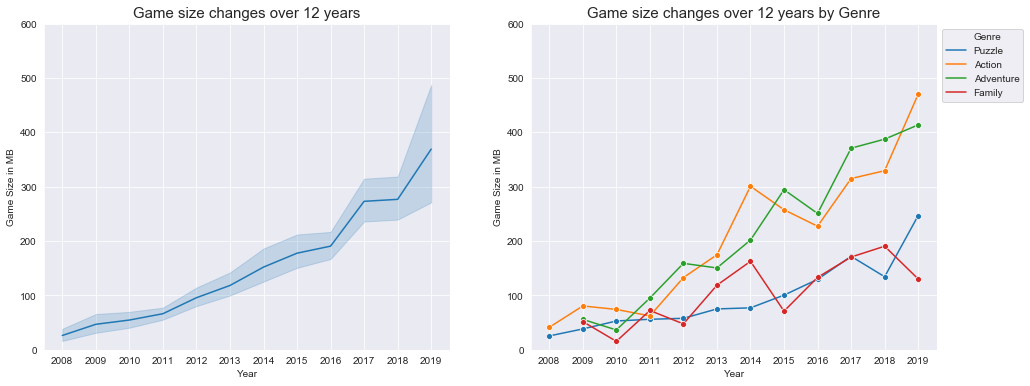

In [7]:
gamestatsfg['Year'] = gamestatsfg['Release_Date']
gamestatsfg['Year']=gamestatsfg['Year'].astype(str)
#extract year ony
for i in (list(gamestatsfg.index.values)):
    gamestatsfg['Year'][i]=gamestatsfg['Year'][i][:4]
    
g, axes = plt.subplots (1,2, figsize=(16,6))

vis1 = sns.lineplot(x=gamestatsfg.Year, y=gamestatsfg.Size2, data=gamestatsfg, ax=axes[0])
vis1.set(ylim=(0, 600))
vis2 = sns.lineplot(x=gamestatsfg.Year, y=gamestatsfg.Size2, hue=gamestatsfg.Genre, err_style=None, marker='o',ax=axes[1])
vis2.set(ylim=(0, 600))
plt.legend(bbox_to_anchor=(1, 1))

axes[0].set_title('Game size changes over 12 years',fontsize=15)
axes[1].set_title('Game size changes over 12 years by Genre',fontsize=15)

vis1.set(xlabel='Year',ylabel='Game Size in MB')
vis2.set(xlabel='Year',ylabel='Game Size in MB')

plt.ioff()

From the left graph we can see a almost Linear (rougly 30MB per year) increase of game size. We can also notice that the error margin has increased constantly over the years, this means the size of game has a bigger range. We can deduce that smaller size games are still relatable but at the same time developers challenged the market with bigger size games (as big as 3.7GB per game)

The right graph shows the growth of game size per game Genre. It is noted that the Game Size fluctuates from year to year, but shows an overall trend of increasing, especially Action Genre which shows a constant growth in the last 5 years

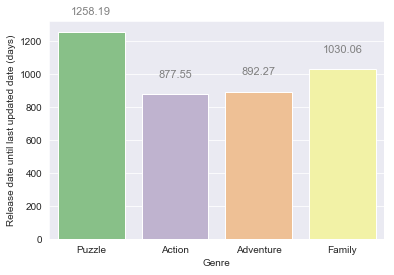

In [8]:
#Convert time delta to int values
for i in (list(gamestatsfg.index.values)):
    gamestatsfg.Update_Gap[i]=gamestatsf.Update_Gap[i].days

x=['Puzzle','Action','Adventure','Family']
y = [gamestatsfg.Update_Gap[(gamestatsfg['Genre']=='Puzzle')].mean(),\
     gamestatsfg.Update_Gap[(gamestatsfg['Genre']=='Action')].mean(),\
     gamestatsfg.Update_Gap[(gamestatsfg['Genre']=='Adventure')].mean(),\
     gamestatsfg.Update_Gap[(gamestatsfg['Genre']=='Family')].mean()]

vis1= sns.barplot(x,y,palette='Accent')
vis1.set(xlabel='Genre',ylabel='Release date until last updated date (days)')



for p in vis1.patches:
             vis1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')

This chart provides us the insight that on average, Action and Adventure games has more recent updates compared to Puzzle and Family games. We can deduce the need for new content are required for Action and Adventure games is more than Puzzle and Family genre.

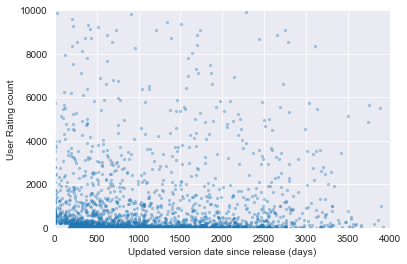

In [9]:
plt.scatter(gamestatsfg.Update_Gap, gamestatsfg.User_Rating_Count, alpha=0.3, s=5) 

plt.xlim(0, 4000)
plt.ylim(0, 10000)

plt.xlabel('Updated version date since release (days)')
plt.ylabel('User Rating count')
plt.show()

We do not have the data of total downloads or total users for each game, but we can assume more user rating count = more downloads. From the graph above, we are able to say there are more User Rating count (hence number of downloads) if the developer provides a more recent update.

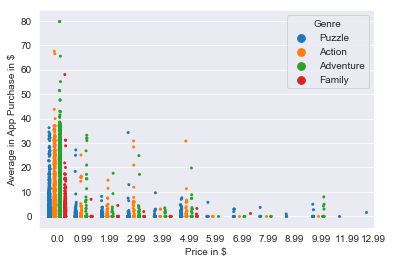

In [10]:
gamestatsfg2=gamestatsfg.copy()
import statistics
gamestatsfg2['In_App_Purchase'] = gamestatsfg2['In_App_Purchase'].str.replace(',', '') 
gamestatsfg2.In_App_Purchase=gamestatsfg2.In_App_Purchase.fillna(0)

for i in (list(gamestatsfg2.index.values)):
    if gamestatsfg2.In_App_Purchase[i] ==0:
        gamestatsfg2['In_App_Purchase'][i]=0.01
    elif gamestatsfg2.In_App_Purchase[i] !=0:
        A=str.split(gamestatsfg2.In_App_Purchase[i])
        A=[float(i) for i in A]
        gamestatsfg2['In_App_Purchase'][i]=statistics.mean(A)
vis1= sns.stripplot(y=gamestatsfg2.In_App_Purchase , x=gamestatsfg2.Price, data=gamestatsfg2, hue=gamestatsfg2.Genre, dodge=True, size=3)

vis1.set(xlabel='Price in $',ylabel='Average in App Purchase in $')
vis1.set(xlim=(-0.7, 12))
plt.ioff()

The pricier the game gets, the lower the In-App Purchase items are. This is expected as low price and free games needs to sustain with some form of income.

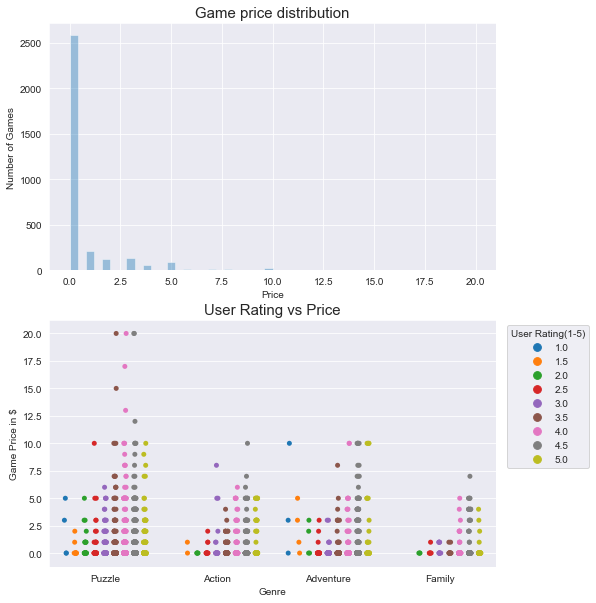

In [11]:
h, axes = plt.subplots (2,1, figsize=(8,10))

vis1 = sns.distplot(gamestatsfg.Price,kde=None,ax=axes[0])
vis2 = sns.stripplot(y=gamestatsfg.Price, x=gamestatsfg.Genre, data=gamestatsfg,ax=axes[1],hue=gamestatsfg.User_Rating, dodge=1)

vis1.set(xlabel='Price',ylabel='Number of Games')
vis2.set(xlabel='Genre',ylabel='Game Price in $')

axes[0].set_title('Game price distribution',fontsize=15)
axes[1].set_title('User Rating vs Price',fontsize=15)
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.22, 1))

plt.ioff()

The trend of user rating with respect to price becomes better as the game becomes pricier.


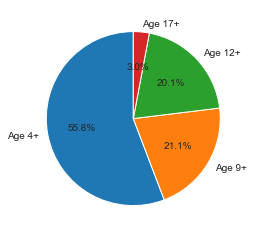

In [12]:
NAR = [gamestatsfg2.Age_Rating[(gamestatsfg2['Age_Rating']=='4+')].count(),gamestatsfg2.Age_Rating[(gamestatsfg2['Age_Rating']=='9+')].count(),\
     gamestatsfg2.Age_Rating[(gamestatsfg2['Age_Rating']=='12+')].count(),gamestatsfg2.Age_Rating[(gamestatsfg2['Age_Rating']=='17+')].count()]
AR = ['Age 4+','Age 9+','Age 12+','Age 17+']

plt.pie(NAR, labels=AR, startangle=90, autopct='%.1f%%')
plt.show()


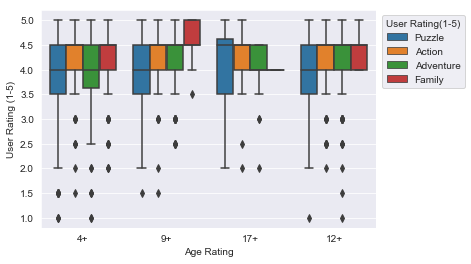

In [13]:
vis1 = sns.boxplot(x=gamestatsfg2.Age_Rating, y=gamestatsfg.User_Rating, data=gamestatsfg, hue=gamestatsfg.Genre, dodge=True)

vis1.set(xlabel='Age Rating',ylabel='User Rating (1-5)')
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.28, 1))
plt.ioff()

Inference made:

* For simpler games, focus on size between 100MB to 150MB of contents
* For more complex games, target a content of 500MB and above
* Games above 1GB have good tendancy to land above 3 score and above, provided sufficient resource available to the developer
* Puzzle games are less saturated above 400MB to achieve score 4.0 and above
* Action & Adventure Genre games are less saturated above 600MB to achieve score 4.0 and above
* Family/Educational games has less competition overall
* Almost 90% of the developers focuses on games below 1 Dollar and places In-App Purchase as their strategy for income
* On average, the trend shows that the average game size increase of 30MB per/year but small size games are still relatable in the store.
* Puzzle and Family games requires less game updates on average.
* Paid Games tend to have better reviews espeicially those above 9 Dollar scores 4.0 User Rating
* Consumers enjoy more matured content i.e games targetted for 17+ age and above

Future Work:
Prediction of effect of game size/genre/age rating to User Rating score.

An overall similar visualization is created via Tableau Public for verification purposes.
feel free to access below link for the Tableau Dashboard
https://public.tableau.com/profile/hoihk?fbclid=IwAR0F4YRrr_ziOd63GU7dfRYBrKJXRX0MfgSA2WlGVSzzTC1sLXUD9M6CMSg#!/vizhome/Mobile_Game_Analysis/Dashboard1